In [1]:
# Kernel restart, dann:
from src.data_loader import load_matches_info

matches = load_matches_info()
print(f"✓ Anzahl: {len(matches)}")
print(f"✓ Typ: {type(matches)}")
print(f"✓ Erste Match: {matches[0]}")
print(f"\n✓ Alle IDs:")
for m in matches:
    print(f"  - {m['id']}")

✓ Anzahl: 10
✓ Typ: <class 'list'>
✓ Erste Match: {'id': '2017461'}

✓ Alle IDs:
  - 2017461
  - 1996435
  - 1886347
  - 1899585
  - 1925299
  - 1953632
  - 2006229
  - 2011166
  - 2013725
  - 2015213


In [2]:
from pathlib import Path

match_id = matches[0]['id']
track_file = Path(f"data/{match_id}_tracking.jsonl")
track_file.unlink()
print("✓ Kaputte Datei gelöscht")

✓ Kaputte Datei gelöscht


In [3]:
# Kernel restart
from src.data_loader import load_matches_info, load_match_data

matches = load_matches_info()
match_id = matches[0]['id']

print(f"Lade Match: {match_id}\n")
data = load_match_data(match_id)

print(f"\n=== ZUSAMMENFASSUNG ===")
print(f"✓ Tracking: {len(data['tracking']):,} frames")
print(f"✓ Events: {len(data['events']):,} rows")
print(f"✓ Phases: {len(data['phases']):,} rows")
print(f"\n✓ Event Columns: {list(data['events'].columns)}")
print(f"✓ Phase Columns: {list(data['phases'].columns)}")

Lade Match: 2017461

✓ Metadata aus Cache
Lade Tracking Data für Match 2017461...
  Download: 89,543,442 bytes
✓ Tracking gespeichert
✓ 71,451 Tracking Frames geladen
Lade Events für Match 2017461...
✓ Events gespeichert
✓ 4,188 Events geladen
Lade Phases für Match 2017461...


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Phases gespeichert
✓ 437 Phases geladen

=== ZUSAMMENFASSUNG ===
✓ Tracking: 71,451 frames
✓ Events: 4,188 rows
✓ Phases: 437 rows

✓ Event Columns: ['event_id', 'index', 'match_id', 'frame_start', 'frame_end', 'frame_physical_start', 'time_start', 'time_end', 'minute_start', 'second_start', 'duration', 'period', 'attacking_side_id', 'attacking_side', 'event_type_id', 'event_type', 'event_subtype_id', 'event_subtype', 'player_id', 'player_name', 'player_position_id', 'player_position', 'player_in_possession_id', 'player_in_possession_name', 'player_in_possession_position_id', 'player_in_possession_position', 'team_id', 'team_shortname', 'x_start', 'y_start', 'channel_id_start', 'channel_start', 'third_id_start', 'third_start', 'penalty_area_start', 'x_end', 'y_end', 'channel_id_end', 'channel_end', 'third_id_end', 'third_end', 'penalty_area_end', 'associated_player_possession_event_id', 'associated_player_possession_frame_start', 'associated_player_possession_frame_end', 'associated_

In [1]:
# Kernel restart
from src.data_loader import load_matches_info, load_match_data, get_tracking_dataframe

matches = load_matches_info()
data = load_match_data(matches[0]['id'])

# Test 1: Beide Halbzeiten
df = get_tracking_dataframe(data['tracking'])
print(f"✓ Gesamt: {df.shape}")
print(f"✓ Spieler: {df['player_id'].nunique()}")
print(f"✓ Detection Rate: {df['is_detected'].mean():.1%}")

# Test 2: Nur Halbzeit 1
df_p1 = get_tracking_dataframe(data['tracking'], period=1)
print(f"\n✓ Halbzeit 1: {df_p1.shape}")

# Test 3: Daten anschauen
print(f"\n✓ Erste 5 Zeilen:")
print(df.head())

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Gesamt: (888888, 7)
✓ Spieler: 32
✓ Detection Rate: 51.2%

✓ Halbzeit 1: (457094, 7)

✓ Erste 5 Zeilen:
   frame    timestamp  period  player_id      x      y  is_detected
0   2510  00:00:00.00       1      51678 -38.16   1.51        False
1   2510  00:00:00.00       1      51013 -20.78   3.31         True
2   2510  00:00:00.00       1      51685 -20.93  14.81         True
3   2510  00:00:00.00       1     800322 -21.03  -8.49         True
4   2510  00:00:00.00       1     811820  -8.60  23.72         True


In [1]:
# Kernel restart
from src.data_loader import load_matches_info, load_match_data, get_ball_dataframe

matches = load_matches_info()
data = load_match_data(matches[0]['id'])

ball_df = get_ball_dataframe(data['tracking'])
print(f"✓ Ball Frames: {len(ball_df):,}")
print(f"✓ Coverage: {len(ball_df)/len(data['tracking']):.1%}")
print(f"\n✓ Ball Position Range:")
print(f"  X: {ball_df['x'].min():.1f} bis {ball_df['x'].max():.1f}")
print(f"  Y: {ball_df['y'].min():.1f} bis {ball_df['y'].max():.1f}")
print(f"\n✓ Erste 5 Zeilen:")
print(ball_df.head())

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Ball Frames: 58,452
✓ Coverage: 81.8%

✓ Ball Position Range:
  X: -57.4 bis 60.9
  Y: -39.0 bis 38.3

✓ Erste 5 Zeilen:
   frame    timestamp  period     x     y
0   2510  00:00:00.00       1 -0.46 -0.12
1   2511  00:00:00.10       1 -1.26  0.07
2   2512  00:00:00.20       1 -2.27  0.09
3   2513  00:00:00.30       1 -3.76  0.44
4   2514  00:00:00.40       1 -5.44  0.84


In [1]:
# Kernel restart
from src.data_loader import (
    load_matches_info,
    load_match_data,
    get_tracking_dataframe,
    get_ball_dataframe,
    get_possession_info
)

print("="*60)
print("FINAL TEST - ALL FUNCTIONS")
print("="*60)

# Load data
matches = load_matches_info()
print(f"\n✓ Matches: {len(matches)}")

data = load_match_data(matches[0]['id'])
print(f"✓ Match geladen")

# Test all conversion functions
df = get_tracking_dataframe(data['tracking'])
ball_df = get_ball_dataframe(data['tracking'])
poss_df = get_possession_info(data['tracking'])

print(f"\n=== RESULTS ===")
print(f"✓ Tracking: {df.shape}")
print(f"✓ Ball: {ball_df.shape}")
print(f"✓ Possession: {poss_df.shape}")
print(f"✓ Detection Rate: {df['is_detected'].mean():.1%}")

if len(poss_df) > 0:
    print(f"\n✓ Possession Distribution:")
    print(poss_df['group'].value_counts())

print("\n" + "="*60)
print("✓✓✓ DATA_LOADER.PY KOMPLETT! ✓✓✓")
print("="*60)

FINAL TEST - ALL FUNCTIONS

✓ Matches: 10
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen
✓ Match geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)



=== RESULTS ===
✓ Tracking: (888888, 7)
✓ Ball: (58452, 5)
✓ Possession: (58452, 5)
✓ Detection Rate: 51.2%

✓ Possession Distribution:
group
home team    17796
away team    11092
Name: count, dtype: int64

✓✓✓ DATA_LOADER.PY KOMPLETT! ✓✓✓


In [2]:
from src.utils import calculate_distance

# Test 1: Simple
dist = calculate_distance(0, 0, 3, 4)
print(f"✓ Distance (0,0) -> (3,4): {dist:.2f}m")  # Should be 5.0

# Test 2: Array
import numpy as np
x1 = np.array([0, 0, 0])
y1 = np.array([0, 0, 0])
x2 = np.array([3, 10, 1])
y2 = np.array([4, 0, 1])

dists = calculate_distance(x1, y1, x2, y2)
print(f"✓ Multiple: {dists}")  # Should be [5.0, 10.0, 1.414...]

✓ Distance (0,0) -> (3,4): 5.00m
✓ Multiple: [ 5.         10.          1.41421356]


In [1]:
from src.data_loader import load_matches_info, load_match_data, get_tracking_dataframe
from src.utils import calculate_velocity

# Load data
matches = load_matches_info()
data = load_match_data(matches[0]['id'])
df = get_tracking_dataframe(data['tracking'], period=1)

# Test: Calculate velocity for one player
player_id = df['player_id'].iloc[0]
print(f"Testing player: {player_id}")

df_vel = calculate_velocity(df, player_id=player_id)

print(f"\n✓ DataFrame shape: {df_vel.shape}")
print(f"✓ Velocity column added: {'velocity' in df_vel.columns}")
print(f"✓ Velocity stats:")
print(f"  Mean: {df_vel['velocity'].mean():.2f} m/s")
print(f"  Max: {df_vel['velocity'].max():.2f} m/s")
print(f"  Min: {df_vel['velocity'].min():.2f} m/s")

print(f"\n✓ First 10 rows:")
print(df_vel[['frame', 'x', 'y', 'velocity']].head(10))

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


Testing player: 51678

✓ DataFrame shape: (20777, 8)
✓ Velocity column added: True
✓ Velocity stats:
  Mean: 0.81 m/s
  Max: 4.81 m/s
  Min: 0.00 m/s

✓ First 10 rows:
   frame      x     y  velocity
0   2510 -38.16  1.51  0.000000
1   2511 -38.45  1.42  3.036445
2   2512 -38.71  1.34  2.720294
3   2513 -38.94  1.27  2.404163
4   2514 -39.14  1.21  2.088061
5   2515 -39.31  1.16  1.772005
6   2516 -39.46  1.12  1.552417
7   2517 -39.58  1.09  1.236932
8   2518 -39.63  1.09  0.500000
9   2519 -39.66  1.10  0.316228


In [1]:
from src.data_loader import load_matches_info, load_match_data, get_tracking_dataframe
from src.utils import calculate_distance, calculate_velocity, detect_runs

print("="*60)
print("TESTING ALL UTILS FUNCTIONS")
print("="*60)

# Load data
matches = load_matches_info()
data = load_match_data(matches[0]['id'])
df = get_tracking_dataframe(data['tracking'], period=1)

print(f"\n✓ Loaded {len(df):,} tracking frames")

# Test 1: Distance
print("\n=== TEST 1: Distance ===")
d = calculate_distance(0, 0, 30, 40)
print(f"✓ Distance (0,0) -> (30,40): {d:.1f}m")

# Test 2: Velocity for all players
print("\n=== TEST 2: Velocity ===")
df_vel = calculate_velocity(df)
print(f"✓ Velocity calculated: {df_vel.shape}")
print(f"✓ Mean velocity: {df_vel['velocity'].mean():.2f} m/s")
print(f"✓ Max velocity: {df_vel['velocity'].max():.2f} m/s")

# Test 3: Detect runs
print("\n=== TEST 3: Detect Runs ===")
runs = detect_runs(df_vel, velocity_threshold=6.0)
print(f"✓ Run frames: {len(runs):,} ({len(runs)/len(df_vel):.1%} of total)")

print(f"\n✓ Top 5 fastest moments:")
top_runs = runs.nlargest(5, 'velocity')[['frame', 'player_id', 'x', 'y', 'velocity']]
print(top_runs)

print("\n" + "="*60)
print("✓✓✓ UTILS.PY KOMPLETT! ✓✓✓")
print("="*60)

TESTING ALL UTILS FUNCTIONS
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)



✓ Loaded 457,094 tracking frames

=== TEST 1: Distance ===
✓ Distance (0,0) -> (30,40): 50.0m

=== TEST 2: Velocity ===
✓ Velocity calculated: (457094, 8)
✓ Mean velocity: 2.05 m/s
✓ Max velocity: 12.71 m/s

=== TEST 3: Detect Runs ===
✓ Detected 23,286 frames with velocity >= 5.0 m/s
✓ From 21 unique players
✓ Run frames: 23,286 (5.1% of total)

✓ Top 5 fastest moments:
        frame  player_id      x     y   velocity
135918  17170      33697  -9.68 -9.20  12.712199
135917  17169      33697  -8.44 -8.92  12.587692
135915  17167      33697  -6.02 -8.28  12.500000
135916  17168      33697  -7.22 -8.61  12.445481
135919  17171      33697 -10.89 -9.44  12.335720

✓✓✓ UTILS.PY KOMPLETT! ✓✓✓


In [1]:
from src.data_loader import load_matches_info, load_match_data, get_tracking_dataframe
from src.space_analysis import calculate_voronoi_areas
import numpy as np

# Load data
matches = load_matches_info()
data = load_match_data(matches[0]['id'])
df = get_tracking_dataframe(data['tracking'], period=1)

# Test multiple frames
frames = df['frame'].unique()[100:105]

print("Testing Voronoi calculation:\n")

for frame in frames:
    areas = calculate_voronoi_areas(df, frame)
    
    if areas:
        total_area = sum(areas.values())
        avg_area = np.mean(list(areas.values()))
        
        print(f"Frame {frame}:")
        print(f"  ✓ Players: {len(areas)}")
        print(f"  ✓ Total area: {total_area:.0f} m²")
        print(f"  ✓ Avg per player: {avg_area:.1f} m²")
        print(f"  ✓ Min/Max: {min(areas.values()):.1f} / {max(areas.values()):.1f} m²")
        print()

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


Testing Voronoi calculation:

Frame 2610:
  ✓ Players: 22
  ✓ Total area: 4770 m²
  ✓ Avg per player: 216.8 m²
  ✓ Min/Max: 28.7 / 723.1 m²

Frame 2611:
  ✓ Players: 22
  ✓ Total area: 11584 m²
  ✓ Avg per player: 526.5 m²
  ✓ Min/Max: 26.7 / 7140.0 m²

Frame 2612:
  ✓ Players: 22
  ✓ Total area: 11605 m²
  ✓ Avg per player: 527.5 m²
  ✓ Min/Max: 24.7 / 7140.0 m²

Frame 2613:
  ✓ Players: 22
  ✓ Total area: 11640 m²
  ✓ Avg per player: 529.1 m²
  ✓ Min/Max: 22.7 / 7140.0 m²

Frame 2614:
  ✓ Players: 22
  ✓ Total area: 11688 m²
  ✓ Avg per player: 531.3 m²
  ✓ Min/Max: 20.7 / 7140.0 m²



In [1]:
from src.data_loader import load_matches_info, load_match_data, get_tracking_dataframe
from src.utils import calculate_velocity, detect_runs
from src.space_analysis import measure_space_creation
import numpy as np

# Load data
matches = load_matches_info()
data = load_match_data(matches[0]['id'])
df = get_tracking_dataframe(data['tracking'], period=1)

# Calculate velocity
df_vel = calculate_velocity(df)

# Find one run
runs = detect_runs(df_vel, velocity_threshold=6.0)

if len(runs) > 0:
    # Take first run
    run = runs.iloc[0]
    player_id = run['player_id']
    frame = run['frame']
    
    print(f"Analyzing run by player {player_id} at frame {frame}\n")
    
    # Get teammates (players in same frame, different ID)
    frame_players = df[df['frame'] == frame]['player_id'].unique()
    teammates = [p for p in frame_players if p != player_id]
    
    # Measure space creation (3 seconds = 30 frames at 10fps)
    start = frame
    end = frame + 30
    
    space_created = measure_space_creation(df, player_id, start, end, teammates)
    
    if space_created:
        print(f"✓ Space created for {len(space_created)} teammates:")
        for tm_id, gain in sorted(space_created.items(), key=lambda x: x[1], reverse=True)[:5]:
            print(f"  Player {tm_id}: +{gain:.1f} m²")
        
        total_created = sum(space_created.values())
        print(f"\n✓ Total space created: {total_created:.1f} m²")
    else:
        print("✗ No space created (or frames missing)")

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Detected 9,131 frames with velocity >= 6.0 m/s
✓ From 20 unique players
Analyzing run by player 4322 at frame 2639

✓ Space created for 9 teammates:
  Player 800322: +5159.9 m²
  Player 51013: +1197.5 m²
  Player 51685: +1055.8 m²
  Player 29075: +290.8 m²
  Player 38673: +101.7 m²

✓ Total space created: 7977.5 m²


In [1]:
from src.data_loader import load_matches_info, load_match_data, get_tracking_dataframe, get_possession_info
from src.utils import calculate_velocity
from src.space_analysis import analyze_offball_runs

print("="*60)
print("COMPLETE SPACE ANALYSIS PIPELINE")
print("="*60)

# Load data
matches = load_matches_info()
data = load_match_data(matches[0]['id'])

df = get_tracking_dataframe(data['tracking'], period=1)
poss_df = get_possession_info(data['tracking'])

print(f"\n✓ Loaded {len(df):,} tracking frames")

# Calculate velocity
print("\nCalculating velocity...")
df_vel = calculate_velocity(df)
print(f"✓ Velocity calculated")

# Analyze off-ball runs
print("\nAnalyzing off-ball runs...")
runs_analysis = analyze_offball_runs(df_vel, poss_df, velocity_threshold=6.0)

if len(runs_analysis) > 0:
    print(f"\n=== RESULTS ===")
    print(f"✓ Total runs analyzed: {len(runs_analysis)}")
    print(f"✓ Avg space created: {runs_analysis['space_created'].mean():.1f} m²")
    print(f"✓ Max space created: {runs_analysis['space_created'].max():.1f} m²")
    print(f"✓ Detection rate: {runs_analysis['is_detected'].mean():.1%}")
    
    print(f"\n✓ Top 5 Space Creators:")
    top = runs_analysis.nlargest(5, 'space_created')[['player_id', 'velocity', 'space_created', 'teammates_benefited']]
    print(top)
    
    print(f"\n✓ Space Creation by Player:")
    by_player = runs_analysis.groupby('player_id')['space_created'].agg(['count', 'mean', 'sum']).round(1)
    print(by_player.nlargest(5, 'sum'))

print("\n" + "="*60)
print("✓✓✓ SPACE_ANALYSIS.PY KOMPLETT! ✓✓✓")
print("="*60)
print("\n→ Bereit für submission.ipynb!")

COMPLETE SPACE ANALYSIS PIPELINE
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)



✓ Loaded 457,094 tracking frames

Calculating velocity...
✓ Velocity calculated

Analyzing off-ball runs...
✓ Detected 23,286 frames with velocity >= 5.0 m/s
✓ From 21 unique players

Analyzing 23,286 run frames...
✓ Analyzed 221 off-ball runs

=== RESULTS ===
✓ Total runs analyzed: 221
✓ Avg space created: 2711.3 m²
✓ Max space created: 14910.0 m²
✓ Detection rate: 86.9%

✓ Top 5 Space Creators:
     player_id  velocity  space_created  teammates_benefited
95       51013  5.069517   14910.037878                    7
75       38673  7.138627   14038.966250                   11
158     159688  6.618912   12569.325156                    9
149     157294  6.859300   11720.116376                   12
190     624628  7.134424   11486.564355                   11

✓ Space Creation by Player:
           count    mean      sum
player_id                        
624628        16  3308.7  52938.4
50955         12  3966.4  47596.8
157294        11  4025.8  44284.0
159688        15  2821.7  42325.2


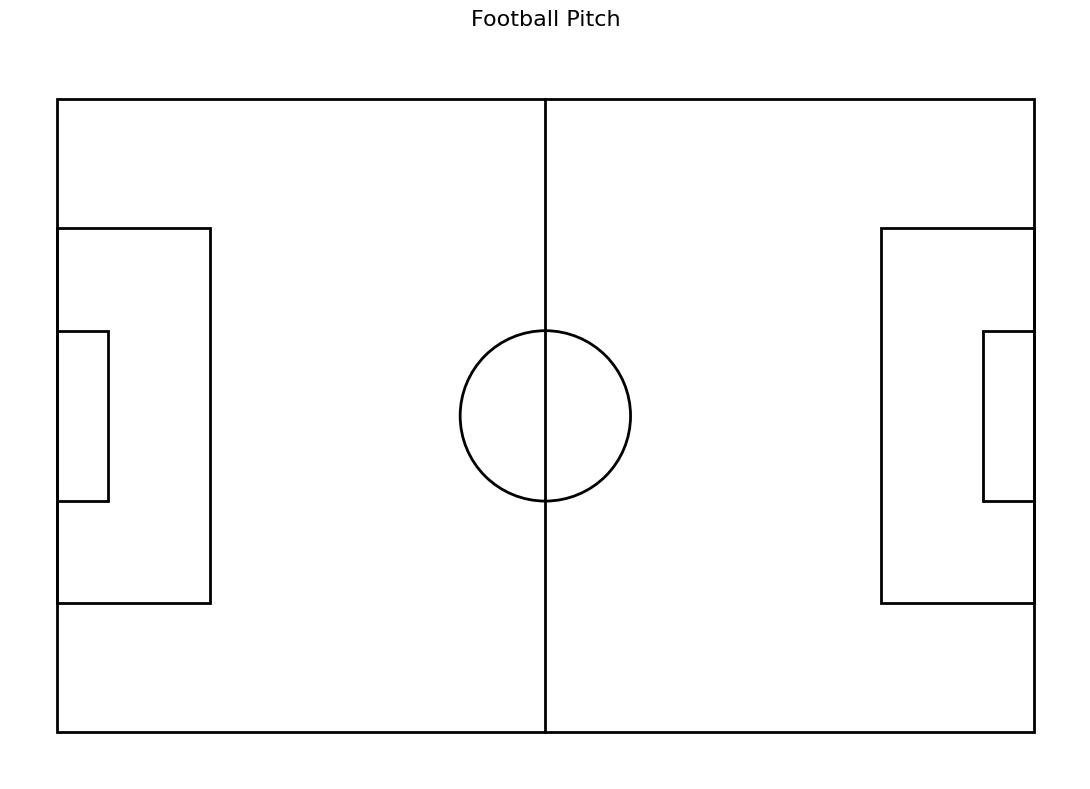

✓ Pitch drawn successfully!


In [3]:
import matplotlib.pyplot as plt
from src.visualization import draw_pitch

# Test
fig, ax = plt.subplots(figsize=(12, 8))
draw_pitch(ax)
plt.title('Football Pitch', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("✓ Pitch drawn successfully!")

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


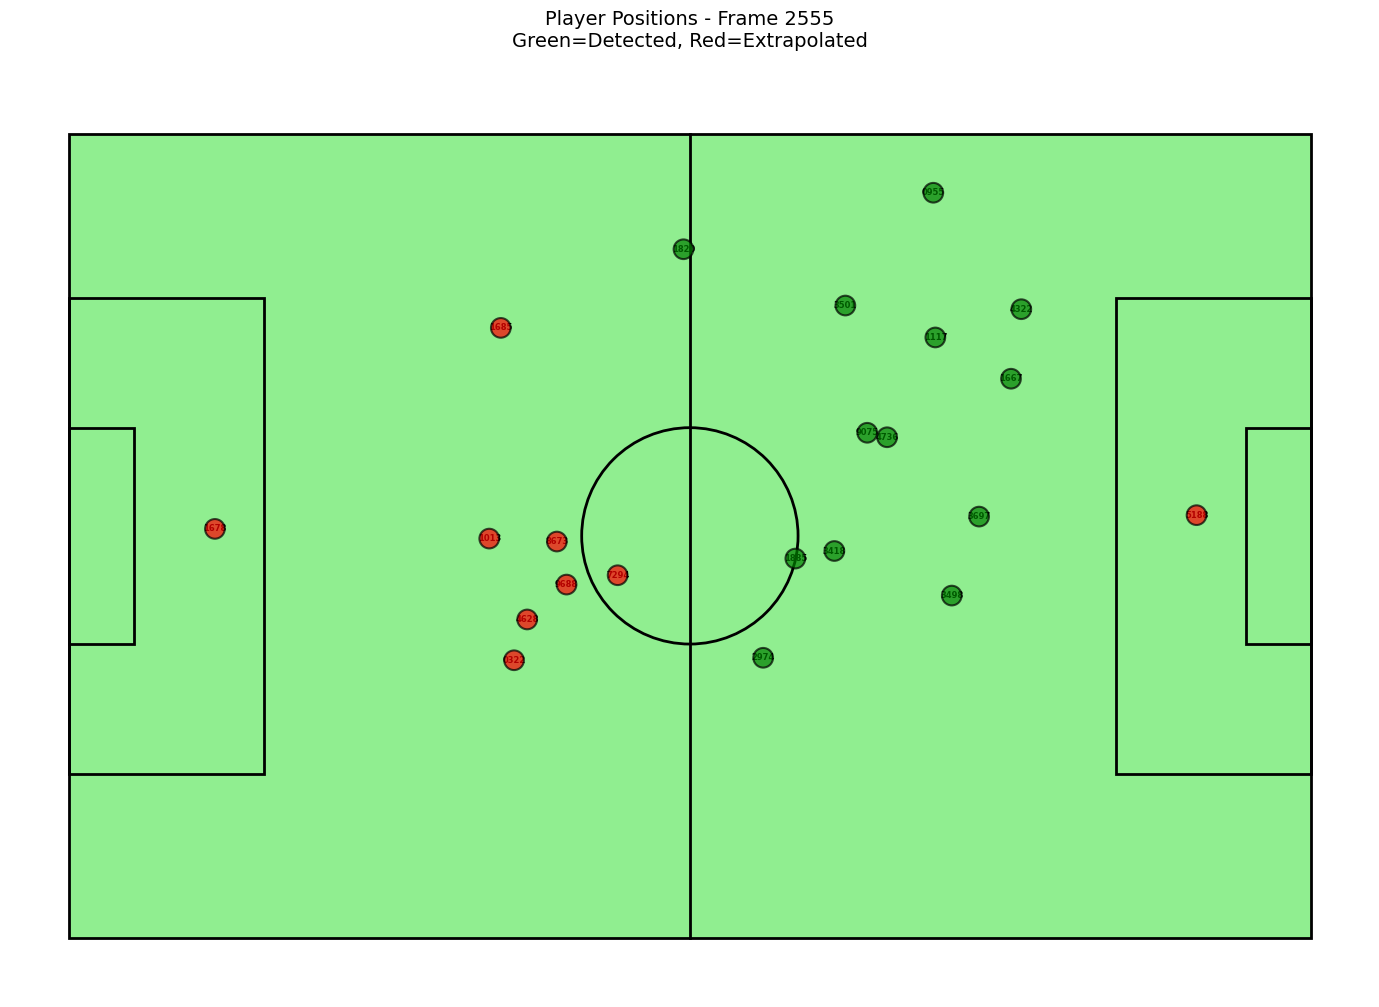

✓ Plotted 22 players


In [1]:
import matplotlib.pyplot as plt
from src.data_loader import load_matches_info, load_match_data, get_tracking_dataframe
from src.visualization import draw_pitch, plot_players

# Load data
matches = load_matches_info()
data = load_match_data(matches[0]['id'])
df = get_tracking_dataframe(data['tracking'], period=1)

# Plot one frame
frame = df['frame'].iloc[1000]

fig, ax = plt.subplots(figsize=(14, 10))
draw_pitch(ax, color='lightgreen')
plot_players(ax, df, frame, color_by='is_detected', show_ids=True)

plt.title(f'Player Positions - Frame {frame}\nGreen=Detected, Red=Extrapolated', 
          fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print(f"✓ Plotted {len(df[df['frame']==frame])} players")

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


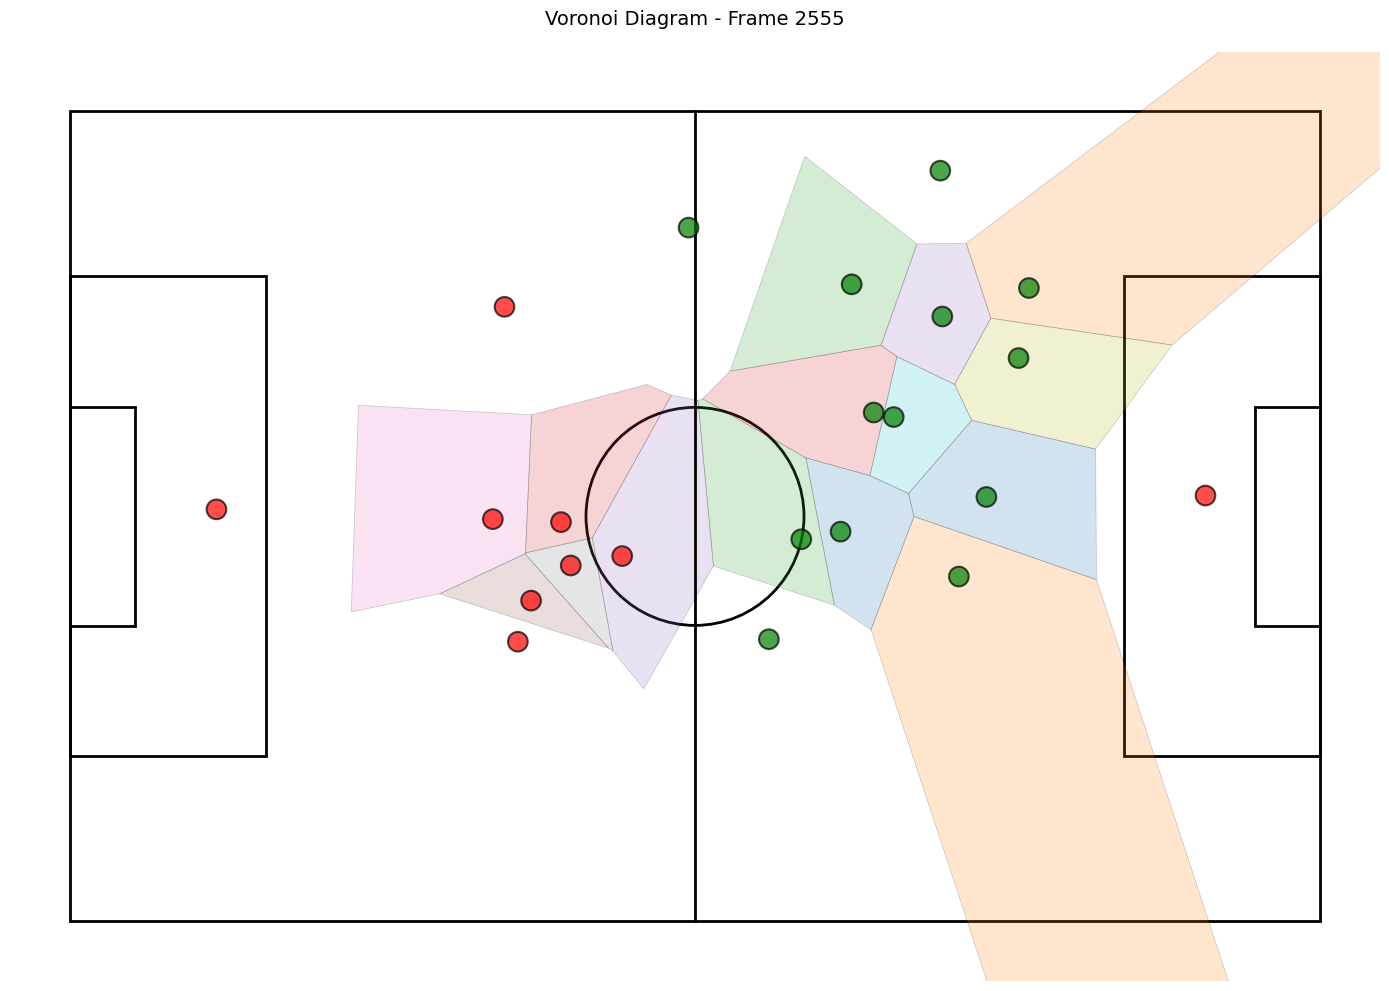

✓ Voronoi plotted!


In [1]:
import matplotlib.pyplot as plt
from src.data_loader import load_matches_info, load_match_data, get_tracking_dataframe
from src.visualization import draw_pitch, plot_players, plot_voronoi

# Load data
matches = load_matches_info()
data = load_match_data(matches[0]['id'])
df = get_tracking_dataframe(data['tracking'], period=1)

# Plot
frame = df['frame'].iloc[1000]

fig, ax = plt.subplots(figsize=(14, 10))
draw_pitch(ax, color='white')
plot_voronoi(ax, df, frame, alpha=0.2)
plot_players(ax, df, frame, color_by='is_detected')

plt.title(f'Voronoi Diagram - Frame {frame}', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print("✓ Voronoi plotted!")

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Detected 655 frames with velocity >= 8.0 m/s
✓ From 19 unique players

Analyzing 655 run frames...


Analyzing runs: 100%|██████████| 655/655 [00:02<00:00, 263.65it/s]


✓ Analyzed 626 off-ball runs


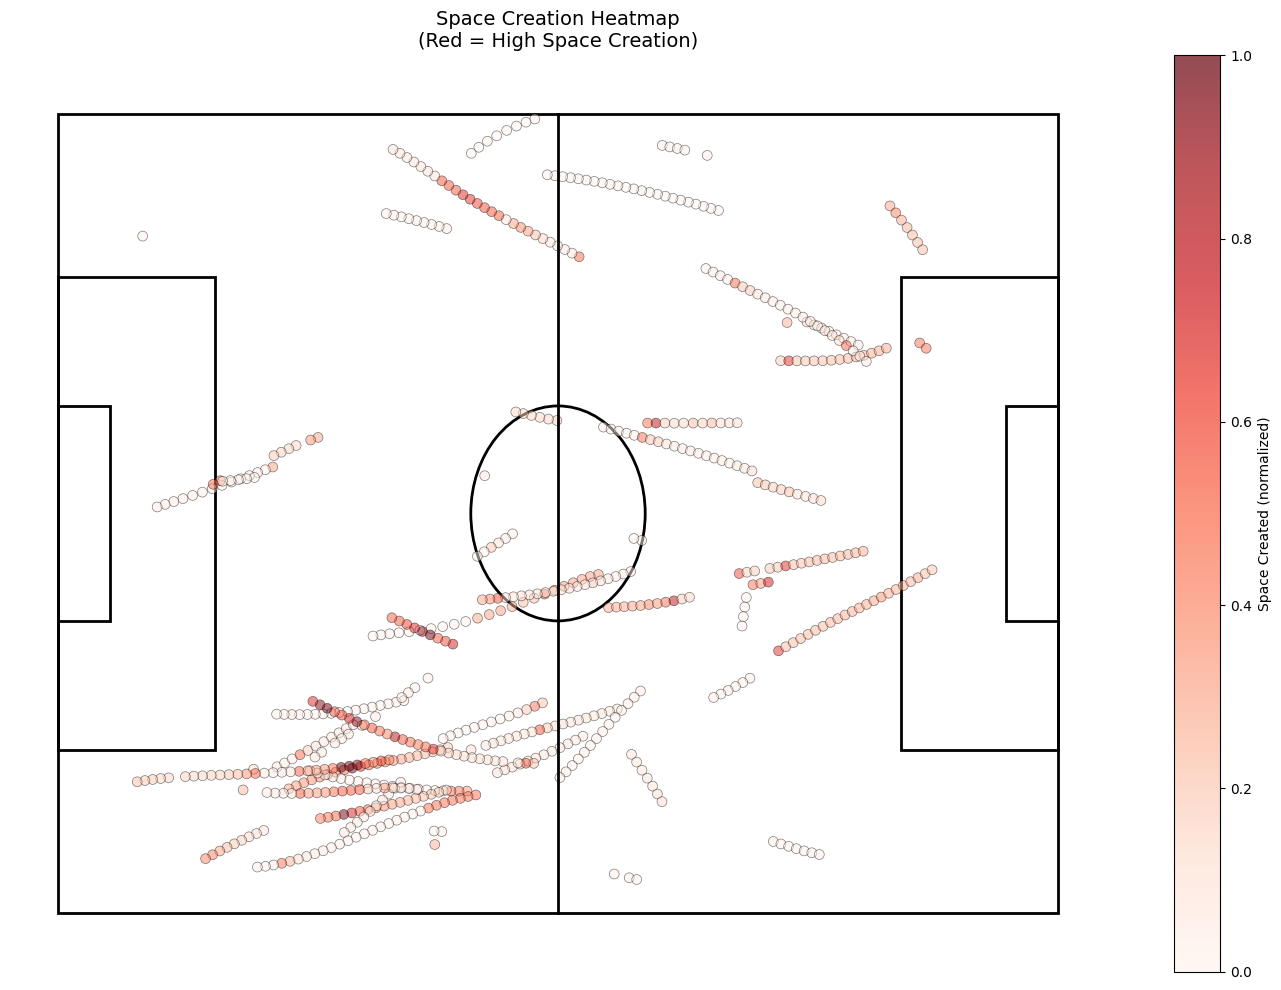

✓ Plotted 626 run locations


In [1]:
import matplotlib.pyplot as plt
from src.data_loader import load_matches_info, load_match_data, get_tracking_dataframe, get_possession_info
from src.utils import calculate_velocity
from src.space_analysis import analyze_offball_runs
from src.visualization import draw_pitch, plot_space_creation_heatmap

# Load
matches = load_matches_info()
data = load_match_data(matches[0]['id'])
df = get_tracking_dataframe(data['tracking'], period=1)
poss_df = get_possession_info(data['tracking'])

# Analyze
df_vel = calculate_velocity(df)
runs = analyze_offball_runs(df_vel, poss_df, velocity_threshold=6.0)

# Add x, y
runs = runs.merge(df_vel[['frame', 'player_id', 'x', 'y']], on=['frame', 'player_id'], how='left')

# Plot
fig, ax = plt.subplots(figsize=(14, 10))
draw_pitch(ax, color='white')
ax, im = plot_space_creation_heatmap(ax, runs, bins=15)

if im is not None:
    plt.colorbar(im, ax=ax, label='Space Created (normalized)')
    
plt.title('Space Creation Heatmap\n(Red = High Space Creation)', fontsize=14)
plt.tight_layout()
plt.show()

print(f"✓ Plotted {len(runs)} run locations")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from src.data_loader import load_matches_info, load_match_data, get_tracking_dataframe, get_possession_info
from src.utils import calculate_velocity
from src.space_analysis import analyze_offball_runs
from src.visualization import draw_pitch

# Load & analyze
matches = load_matches_info()
data = load_match_data(matches[0]['id'])
df = get_tracking_dataframe(data['tracking'], period=1)
poss_df = get_possession_info(data['tracking'])

df_vel = calculate_velocity(df)
runs = analyze_offball_runs(df_vel, poss_df, velocity_threshold=6.0)

# Merge x, y
runs = runs.merge(df_vel[['frame', 'player_id', 'x', 'y']], 
                  on=['frame', 'player_id'], how='left')

# Filter: Top 10%
threshold_90 = runs['space_created'].quantile(0.90)
top_10_runs = runs[runs['space_created'] >= threshold_90]

print(f"Total runs: {len(runs)}")
print(f"Top 10% runs: {len(top_10_runs)}")
print(f"Space threshold: ≥{threshold_90:.0f} m²")

# Plot
fig, axes = plt.subplots(2, 1, figsize=(14, 20))

# Panel 1: All runs colored by SPACE CREATED
draw_pitch(axes[0], color='white')

if len(runs) > 0:
    # Histogram for heatmap
    heatmap, xedges, yedges = np.histogram2d(
        runs['x'], runs['y'], bins=15, weights=runs['space_created']
    )
    heatmap = heatmap / heatmap.max() if heatmap.max() > 0 else heatmap
    
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im1 = axes[0].imshow(heatmap.T, extent=extent, origin='lower', 
                         cmap='Reds', alpha=0.7, aspect='auto', vmin=0, vmax=1)
    
    axes[0].scatter(runs['x'], runs['y'], c=runs['space_created'], 
                    s=50, cmap='Reds', alpha=0.5, edgecolors='black', linewidths=0.5)

axes[0].set_title(f'All Off-Ball Runs\n({len(runs)} runs, colored by Space Created)', 
                  fontsize=16, pad=20)
plt.colorbar(im1, ax=axes[0], label='Space Created (normalized)', fraction=0.046)


# Panel 2: Top 10% colored by VELOCITY
draw_pitch(axes[1], color='white')

if len(top_10_runs) > 0:
    # Normalize velocity for colormap
    vel_norm = (top_10_runs['velocity'] - top_10_runs['velocity'].min()) / \
               (top_10_runs['velocity'].max() - top_10_runs['velocity'].min())
    
    # Histogram weighted by velocity
    heatmap, xedges, yedges = np.histogram2d(
        top_10_runs['x'], top_10_runs['y'], bins=15, weights=vel_norm
    )
    heatmap = heatmap / heatmap.max() if heatmap.max() > 0 else heatmap
    
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im2 = axes[1].imshow(heatmap.T, extent=extent, origin='lower', 
                         cmap='Blues', alpha=0.7, aspect='auto', vmin=0, vmax=1)
    
    # Scatter points colored by velocity
    scatter = axes[1].scatter(top_10_runs['x'], top_10_runs['y'], 
                             c=top_10_runs['velocity'], s=50, cmap='Blues', 
                             alpha=0.6, edgecolors='black', linewidths=0.5,
                             vmin=top_10_runs['velocity'].min(),
                             vmax=top_10_runs['velocity'].max())

axes[1].set_title(f'Elite High-Impact Runs\n(Top 10%, {len(top_10_runs)} runs, colored by Velocity)', 
                  fontsize=16, pad=20)
cbar = plt.colorbar(scatter, ax=axes[1], label='Velocity (m/s)', fraction=0.046)

plt.tight_layout()
plt.show()

print(f"\nVelocity range in top 10%:")
print(f"  Min: {top_10_runs['velocity'].min():.2f} m/s")
print(f"  Max: {top_10_runs['velocity'].max():.2f} m/s")
print(f"  Mean: {top_10_runs['velocity'].mean():.2f} m/s")

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:100: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


TypeError: analyze_offball_runs() missing 2 required positional arguments: 'home_player_ids' and 'away_player_ids'

TESTING ALL VISUALIZATIONS
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)



Analyzing runs...
✓ Detected 23,286 frames with velocity >= 5.0 m/s
✓ From 21 unique players

Analyzing 23,286 run frames...


Analyzing runs: 100%|██████████| 23286/23286 [01:30<00:00, 258.06it/s]


✓ Analyzed 22212 off-ball runs


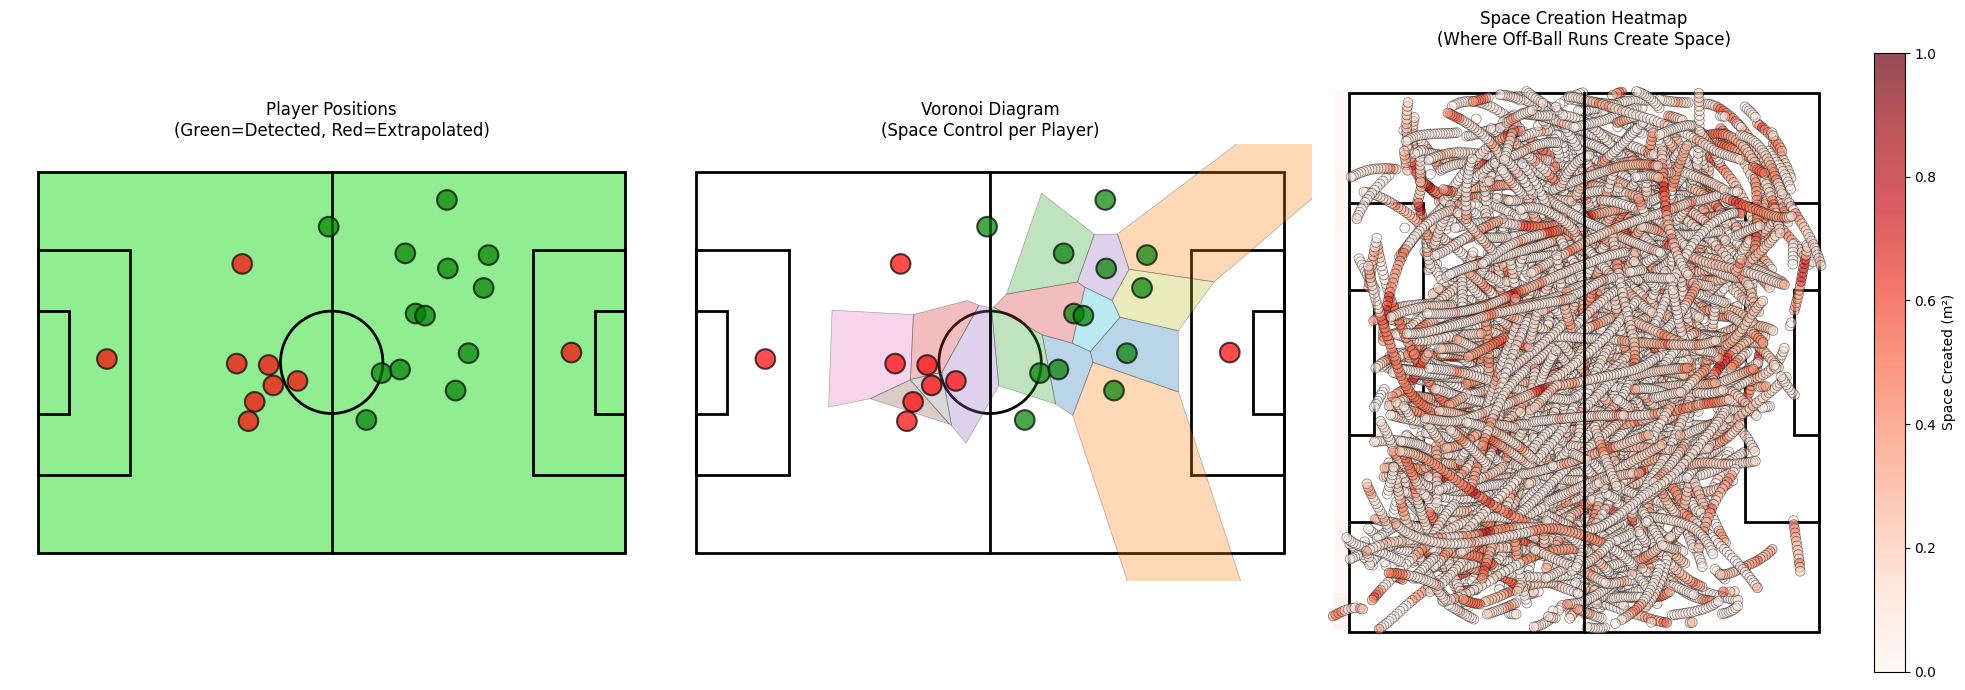


✓✓✓ VISUALIZATION.PY KOMPLETT! ✓✓✓

→ Alle 4 Module fertig!
→ Bereit für submission.ipynb!


In [1]:
import matplotlib.pyplot as plt
from src.data_loader import load_matches_info, load_match_data, get_tracking_dataframe, get_possession_info
from src.utils import calculate_velocity
from src.space_analysis import analyze_offball_runs
from src.visualization import draw_pitch, plot_players, plot_voronoi, plot_space_creation_heatmap

print("="*60)
print("TESTING ALL VISUALIZATIONS")
print("="*60)

# Load data
matches = load_matches_info()
data = load_match_data(matches[0]['id'])
df = get_tracking_dataframe(data['tracking'], period=1)
poss_df = get_possession_info(data['tracking'])

# Calculate velocity
df_vel = calculate_velocity(df)

# Analyze runs (need x, y in results)
print("\nAnalyzing runs...")
runs = analyze_offball_runs(df_vel, poss_df, velocity_threshold=6.0)

# Add x, y to runs
if len(runs) > 0:
    runs = runs.merge(
        df_vel[['frame', 'player_id', 'x', 'y']], 
        on=['frame', 'player_id'], 
        how='left'
    )

# Create 3-panel figure
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Panel 1: Just pitch + players
frame = df['frame'].iloc[1000]
draw_pitch(axes[0], color='lightgreen')
plot_players(axes[0], df, frame, color_by='is_detected')
axes[0].set_title('Player Positions\n(Green=Detected, Red=Extrapolated)', fontsize=12)

# Panel 2: Voronoi
draw_pitch(axes[1], color='white')
plot_voronoi(axes[1], df, frame, alpha=0.3)
plot_players(axes[1], df, frame, color_by='is_detected')
axes[1].set_title('Voronoi Diagram\n(Space Control per Player)', fontsize=12)

# Panel 3: Space Creation Heatmap
if len(runs) > 0 and 'x' in runs.columns:
    draw_pitch(axes[2], color='white')
    ax, im = plot_space_creation_heatmap(axes[2], runs, bins=15)
    plt.colorbar(im, ax=axes[2], label='Space Created (m²)')
    axes[2].set_title('Space Creation Heatmap\n(Where Off-Ball Runs Create Space)', fontsize=12)
else:
    axes[2].text(0.5, 0.5, 'No run data', ha='center', va='center', transform=axes[2].transAxes)
    axes[2].set_title('Space Creation Heatmap', fontsize=12)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("✓✓✓ VISUALIZATION.PY KOMPLETT! ✓✓✓")
print("="*60)
print("\n→ Alle 4 Module fertig!")
print("→ Bereit für submission.ipynb!")

In [1]:
from src.data_loader import load_matches_info, load_match_data, get_tracking_dataframe, get_possession_info
from src.utils import calculate_velocity
from src.space_analysis import analyze_offball_runs

matches = load_matches_info()
data = load_match_data(matches[0]['id'])
df = get_tracking_dataframe(data['tracking'], period=1)
poss_df = get_possession_info(data['tracking'])

df_vel = calculate_velocity(df)
runs = analyze_offball_runs(df_vel, poss_df, velocity_threshold=6.0)

print(f"✓ Analysiert: {len(runs)} Runs")

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Detected 23,286 frames with velocity >= 5.0 m/s
✓ From 21 unique players

Analyzing 23,286 run frames...
✓ Analyzed 22212 off-ball runs
✓ Analysiert: 22212 Runs


In [1]:
import pandas as pd
from src.data_loader import load_matches_info, load_match_data, get_tracking_dataframe, get_possession_info
from src.utils import calculate_velocity
from src.space_analysis import analyze_offball_runs

# Load
matches = load_matches_info()
data = load_match_data(matches[0]['id'])
df = get_tracking_dataframe(data['tracking'], period=1)
poss_df = get_possession_info(data['tracking'])

# Team IDs from possession
home_player_ids = list(poss_df[poss_df['group'] == 'home team']['player_id'].dropna().astype(int).unique())
away_player_ids = list(poss_df[poss_df['group'] == 'away team']['player_id'].dropna().astype(int).unique())

# Analyze
df_vel = calculate_velocity(df)
runs = analyze_offball_runs(df_vel, poss_df, home_player_ids, away_player_ids, velocity_threshold=6.0)

print(f"\n=== RESULTS ===")
print(f"Total runs: {len(runs)}")
if len(runs) > 0:
    print(runs['team'].value_counts())
    print(f"\nAvg space: {runs['space_created'].mean():.0f} m²")

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Detected 9,131 frames with velocity >= 6.0 m/s
✓ From 20 unique players

Analyzing 9,131 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 9131/9131 [00:04<00:00, 1926.39it/s]

✓ Analyzed 948 off-ball runs (own team possession only)

=== RESULTS ===
Total runs: 948
team
away    736
home    212
Name: count, dtype: int64

Avg space: 1923 m²


✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Detected 23,286 frames with velocity >= 5.0 m/s
✓ From 21 unique players

Analyzing 23,286 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 23286/23286 [00:12<00:00, 1939.28it/s]


✓ Analyzed 2312 off-ball runs (own team possession only)

=== RESULTS (5.0 m/s threshold) ===
Total runs: 2312
team
away    1568
home     744
Name: count, dtype: int64
Avg space: 1707 m²


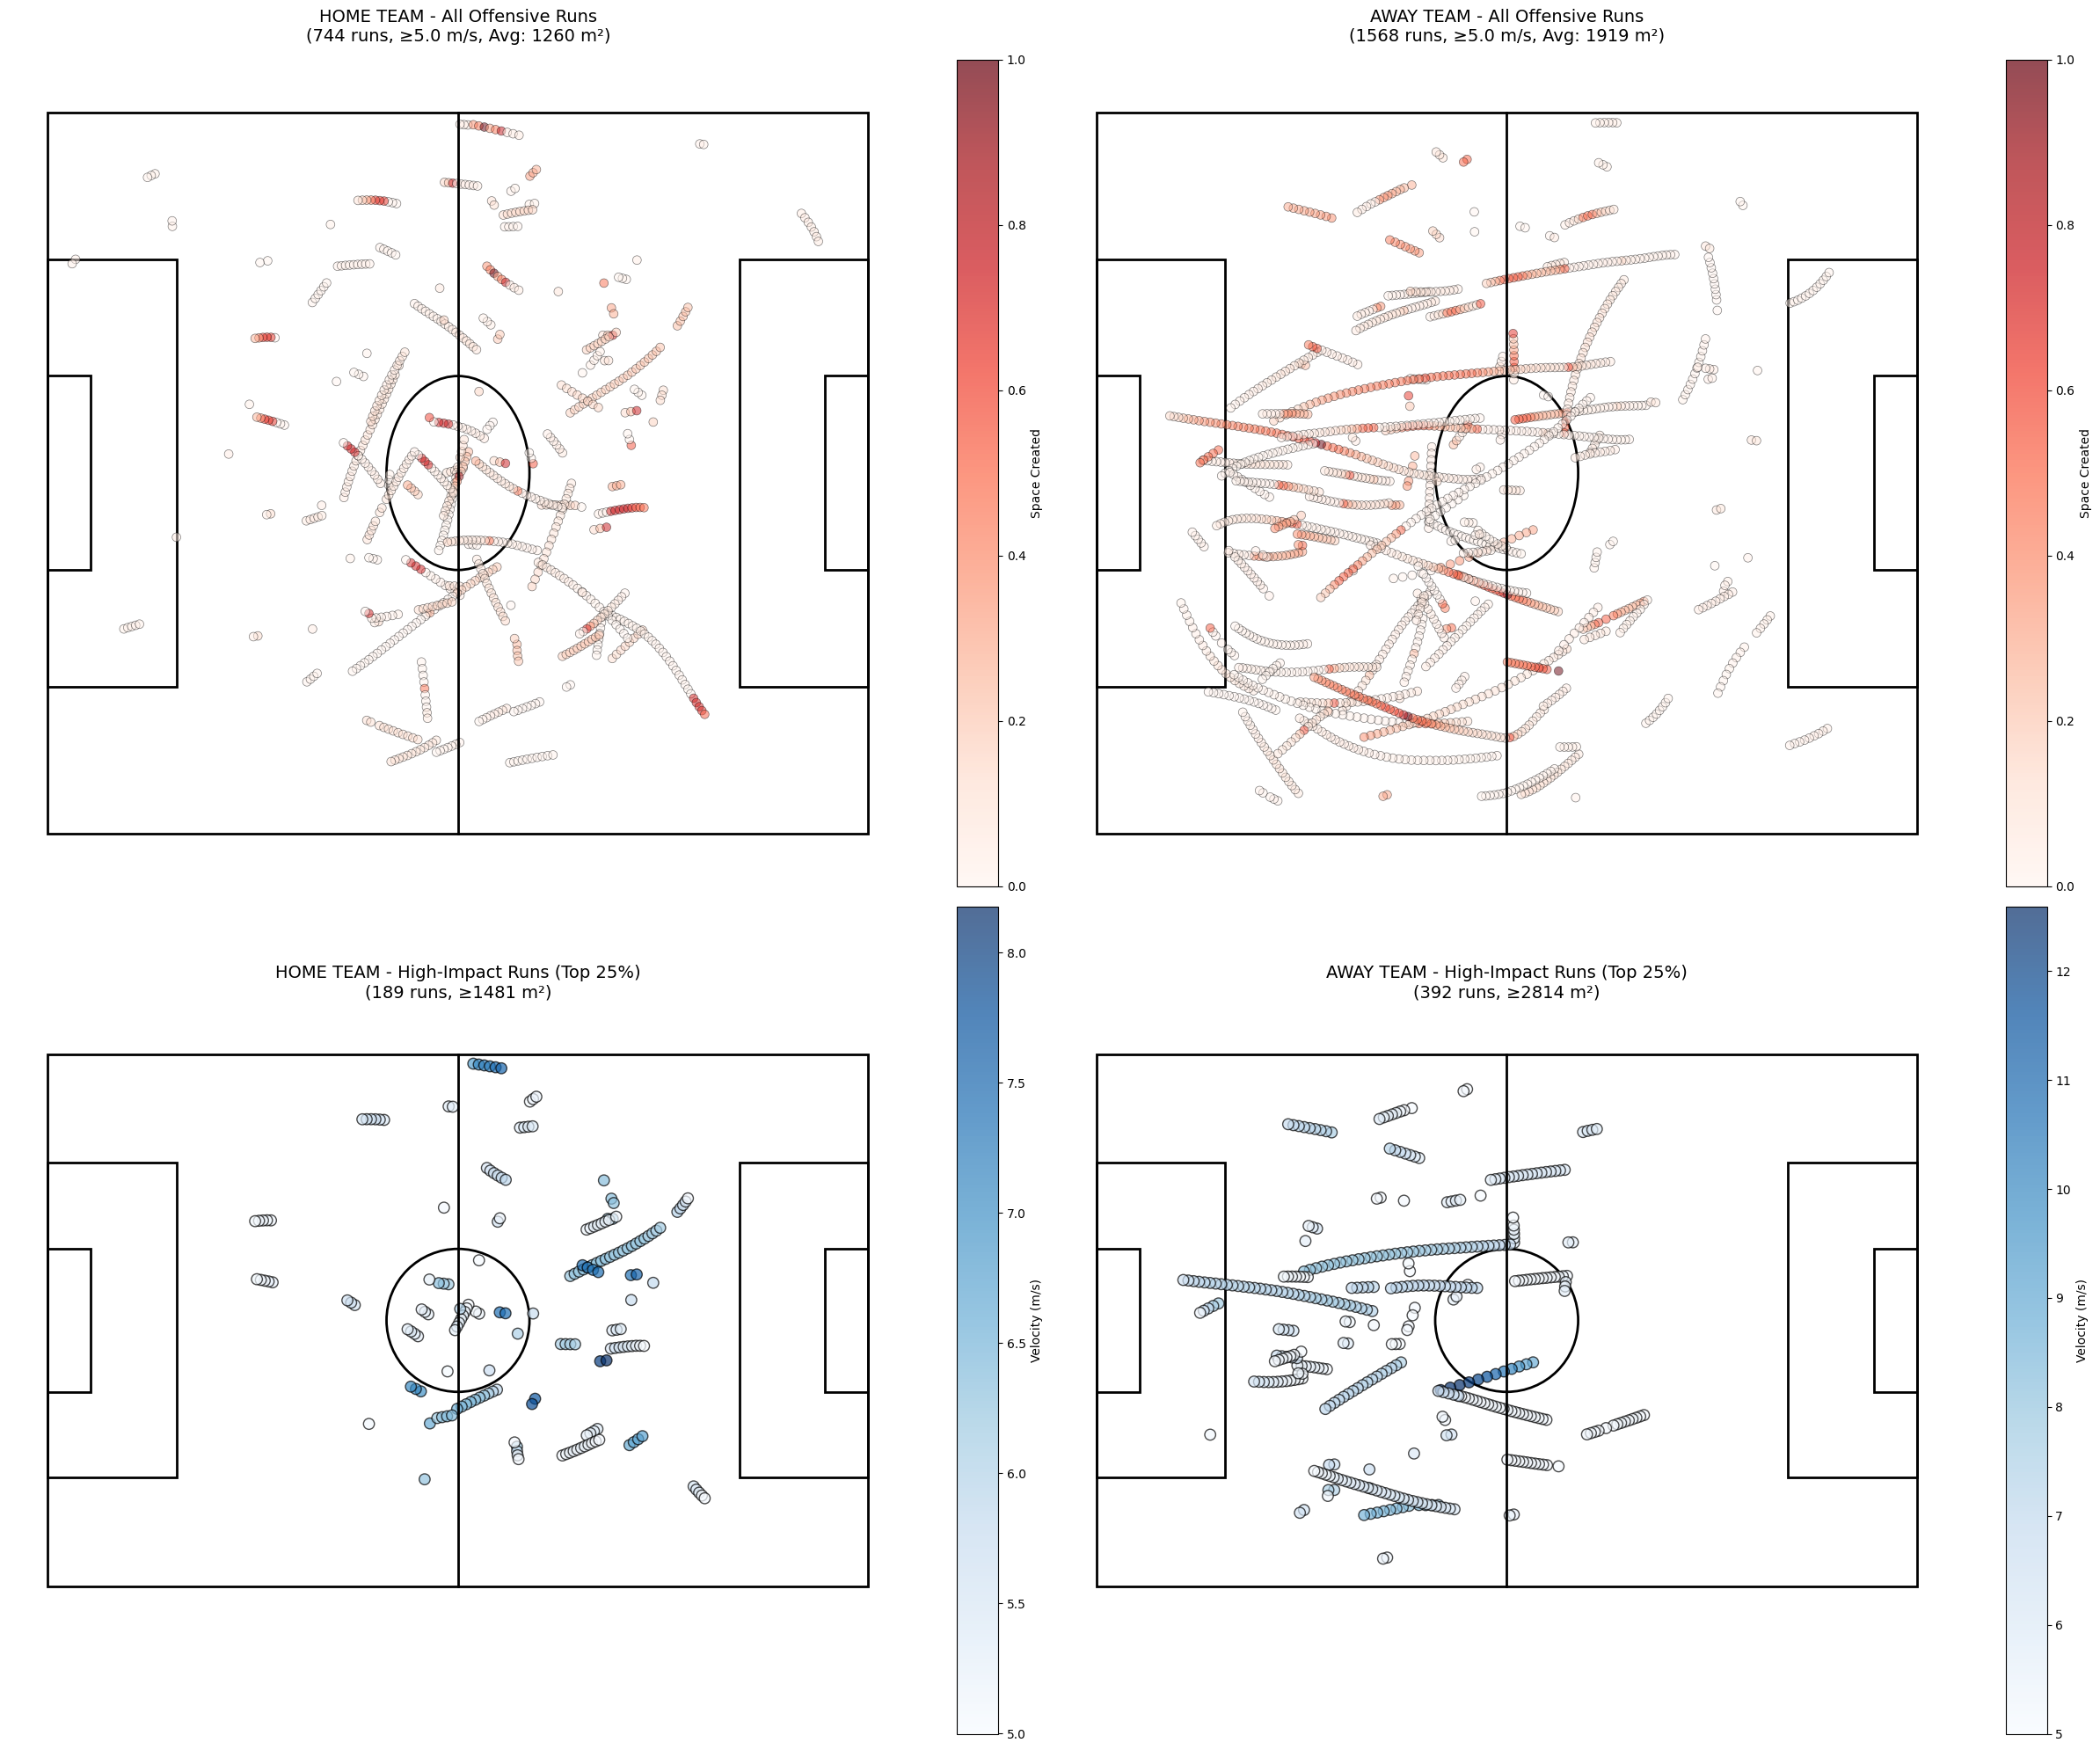


=== TEAM COMPARISON ===
Home Team: 744 runs, Avg: 1260 m²
Away Team: 1568 runs, Avg: 1919 m²


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.data_loader import load_matches_info, load_match_data, get_tracking_dataframe, get_possession_info
from src.utils import calculate_velocity
from src.space_analysis import analyze_offball_runs
from src.visualization import draw_pitch

# Load
matches = load_matches_info()
data = load_match_data(matches[0]['id'])
df = get_tracking_dataframe(data['tracking'], period=1)
poss_df = get_possession_info(data['tracking'])

# Team IDs from possession
home_player_ids = list(poss_df[poss_df['group'] == 'home team']['player_id'].dropna().astype(int).unique())
away_player_ids = list(poss_df[poss_df['group'] == 'away team']['player_id'].dropna().astype(int).unique())

# Analyze with 5.0 m/s threshold
df_vel = calculate_velocity(df)
runs = analyze_offball_runs(df_vel, poss_df, home_player_ids, away_player_ids, velocity_threshold=5.0)

# Merge x, y
runs = runs.merge(df_vel[['frame', 'player_id', 'x', 'y']], 
                  on=['frame', 'player_id'], how='left')

print(f"\n=== RESULTS (5.0 m/s threshold) ===")
print(f"Total runs: {len(runs)}")
print(runs['team'].value_counts())
print(f"Avg space: {runs['space_created'].mean():.0f} m²")

# Split by team
home_runs = runs[runs['team'] == 'home']
away_runs = runs[runs['team'] == 'away']

# Plot: 2 rows x 2 columns
fig, axes = plt.subplots(2, 2, figsize=(24, 20))

# === ROW 1: ALL RUNS ===

# Panel 1: Home Team - All runs
draw_pitch(axes[0, 0], color='white')
if len(home_runs) > 0:
    heatmap, xedges, yedges = np.histogram2d(
        home_runs['x'], home_runs['y'], bins=15, weights=home_runs['space_created']
    )
    heatmap = heatmap / heatmap.max() if heatmap.max() > 0 else heatmap
    
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im1 = axes[0, 0].imshow(heatmap.T, extent=extent, origin='lower', 
                            cmap='Reds', alpha=0.7, aspect='auto', vmin=0, vmax=1)
    
    axes[0, 0].scatter(home_runs['x'], home_runs['y'], c=home_runs['space_created'], 
                       s=50, cmap='Reds', alpha=0.5, edgecolors='black', linewidths=0.5)
    
    plt.colorbar(im1, ax=axes[0, 0], label='Space Created', fraction=0.046)

axes[0, 0].set_title(f'HOME TEAM - All Offensive Runs\n({len(home_runs)} runs, ≥5.0 m/s, Avg: {home_runs["space_created"].mean():.0f} m²)', 
                     fontsize=14, pad=15)


# Panel 2: Away Team - All runs
draw_pitch(axes[0, 1], color='white')
if len(away_runs) > 0:
    heatmap, xedges, yedges = np.histogram2d(
        away_runs['x'], away_runs['y'], bins=15, weights=away_runs['space_created']
    )
    heatmap = heatmap / heatmap.max() if heatmap.max() > 0 else heatmap
    
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im2 = axes[0, 1].imshow(heatmap.T, extent=extent, origin='lower', 
                            cmap='Reds', alpha=0.7, aspect='auto', vmin=0, vmax=1)
    
    axes[0, 1].scatter(away_runs['x'], away_runs['y'], c=away_runs['space_created'], 
                       s=50, cmap='Reds', alpha=0.5, edgecolors='black', linewidths=0.5)
    
    plt.colorbar(im2, ax=axes[0, 1], label='Space Created', fraction=0.046)

axes[0, 1].set_title(f'AWAY TEAM - All Offensive Runs\n({len(away_runs)} runs, ≥5.0 m/s, Avg: {away_runs["space_created"].mean():.0f} m²)', 
                     fontsize=14, pad=15)


# === ROW 2: TOP 25% ===

# Top 25% for each team
home_top25 = home_runs[home_runs['space_created'] >= home_runs['space_created'].quantile(0.75)]
away_top25 = away_runs[away_runs['space_created'] >= away_runs['space_created'].quantile(0.75)]

# Panel 3: Home Team - Top 25%
draw_pitch(axes[1, 0], color='white')
if len(home_top25) > 0:
    scatter = axes[1, 0].scatter(
        home_top25['x'], home_top25['y'], 
        c=home_top25['velocity'], s=80, cmap='Blues', 
        alpha=0.7, edgecolors='black', linewidths=1,
        vmin=5.0, vmax=home_top25['velocity'].max()
    )
    plt.colorbar(scatter, ax=axes[1, 0], label='Velocity (m/s)', fraction=0.046)

axes[1, 0].set_title(f'HOME TEAM - High-Impact Runs (Top 25%)\n({len(home_top25)} runs, ≥{home_runs["space_created"].quantile(0.75):.0f} m²)', 
                     fontsize=14, pad=15)


# Panel 4: Away Team - Top 25%
draw_pitch(axes[1, 1], color='white')
if len(away_top25) > 0:
    scatter = axes[1, 1].scatter(
        away_top25['x'], away_top25['y'], 
        c=away_top25['velocity'], s=80, cmap='Blues', 
        alpha=0.7, edgecolors='black', linewidths=1,
        vmin=5.0, vmax=away_top25['velocity'].max()
    )
    plt.colorbar(scatter, ax=axes[1, 1], label='Velocity (m/s)', fraction=0.046)

axes[1, 1].set_title(f'AWAY TEAM - High-Impact Runs (Top 25%)\n({len(away_top25)} runs, ≥{away_runs["space_created"].quantile(0.75):.0f} m²)', 
                     fontsize=14, pad=15)

plt.tight_layout()
plt.show()

print("\n=== TEAM COMPARISON ===")
print(f"Home Team: {len(home_runs)} runs, Avg: {home_runs['space_created'].mean():.0f} m²")
print(f"Away Team: {len(away_runs)} runs, Avg: {away_runs['space_created'].mean():.0f} m²")

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Detected 23,286 frames with velocity >= 5.0 m/s
✓ From 21 unique players

Analyzing 23,286 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 23286/23286 [00:11<00:00, 1950.30it/s]


✓ Analyzed 2312 off-ball runs (own team possession only)

=== TRAJECTORIES ===
Total distinct runs: 170
Avg duration: 13.1 frames (1.3s)
team
away    94
home    76
Name: count, dtype: int64


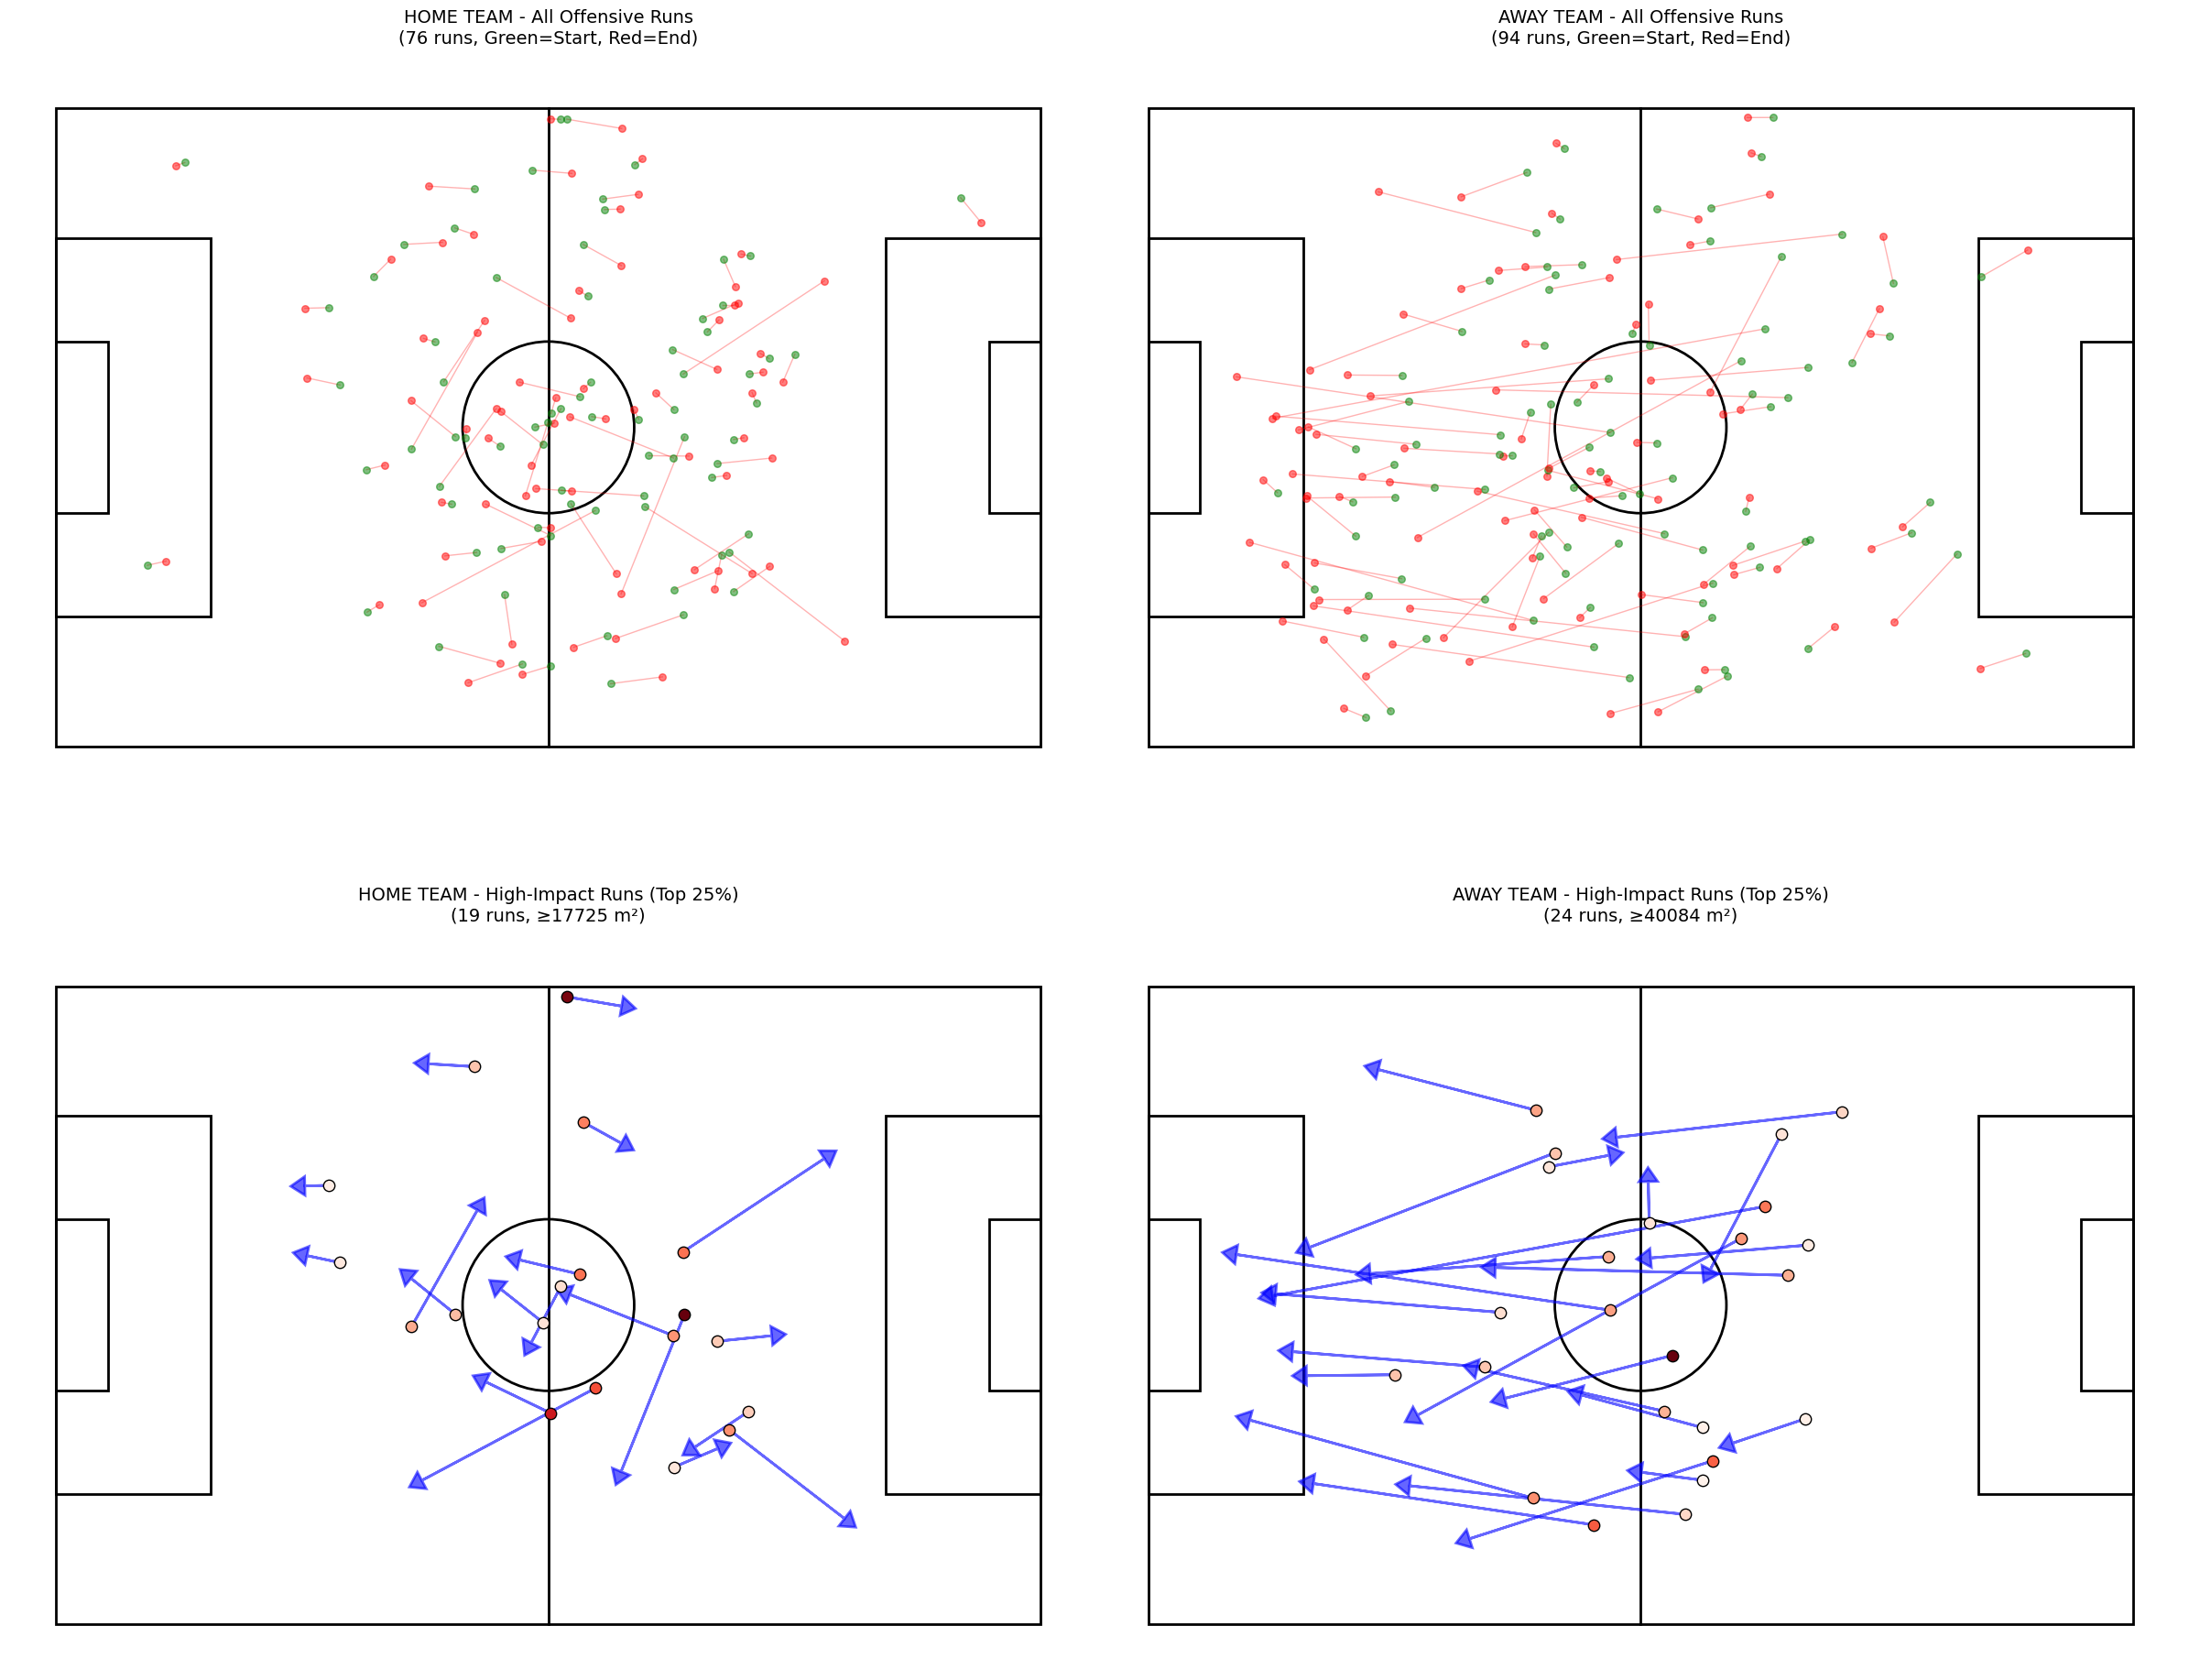


✓ Visualization complete!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.data_loader import load_matches_info, load_match_data, get_tracking_dataframe, get_possession_info
from src.utils import calculate_velocity
from src.space_analysis import analyze_offball_runs, group_runs_to_trajectories
from src.visualization import draw_pitch

# Load & analyze (wie vorher)
matches = load_matches_info()
data = load_match_data(matches[0]['id'])
df = get_tracking_dataframe(data['tracking'], period=1)
poss_df = get_possession_info(data['tracking'])

home_player_ids = list(poss_df[poss_df['group'] == 'home team']['player_id'].dropna().astype(int).unique())
away_player_ids = list(poss_df[poss_df['group'] == 'away team']['player_id'].dropna().astype(int).unique())

df_vel = calculate_velocity(df)
runs = analyze_offball_runs(df_vel, poss_df, home_player_ids, away_player_ids, velocity_threshold=5.0)
runs = runs.merge(df_vel[['frame', 'player_id', 'x', 'y']], on=['frame', 'player_id'], how='left')

# NEW: Group into trajectories
trajectories = group_runs_to_trajectories(runs)

print(f"\n=== TRAJECTORIES ===")
print(f"Total distinct runs: {len(trajectories)}")
print(f"Avg duration: {trajectories['duration_frames'].mean():.1f} frames ({trajectories['duration_frames'].mean()/10:.1f}s)")
print(trajectories['team'].value_counts())

# Split by team
home_traj = trajectories[trajectories['team'] == 'home']
away_traj = trajectories[trajectories['team'] == 'away']

# Filter Top 25% by space created
home_top25 = home_traj[home_traj['total_space_created'] >= home_traj['total_space_created'].quantile(0.75)]
away_top25 = away_traj[away_traj['total_space_created'] >= away_traj['total_space_created'].quantile(0.75)]

# Plot: 2x2
fig, axes = plt.subplots(2, 2, figsize=(24, 20))

# === ROW 1: ALL RUNS ===

# Panel 1: Home - All runs
draw_pitch(axes[0, 0], color='white')
for _, traj in home_traj.iterrows():
    axes[0, 0].plot([traj['start_x'], traj['end_x']], 
                    [traj['start_y'], traj['end_y']], 
                    color='red', alpha=0.3, linewidth=1)
    axes[0, 0].scatter(traj['start_x'], traj['start_y'], c='green', s=30, alpha=0.5, zorder=10)
    axes[0, 0].scatter(traj['end_x'], traj['end_y'], c='red', s=30, alpha=0.5, zorder=10)

axes[0, 0].set_title(f'HOME TEAM - All Offensive Runs\n({len(home_traj)} runs, Green=Start, Red=End)', 
                     fontsize=14, pad=15)

# Panel 2: Away - All runs
draw_pitch(axes[0, 1], color='white')
for _, traj in away_traj.iterrows():
    axes[0, 1].plot([traj['start_x'], traj['end_x']], 
                    [traj['start_y'], traj['end_y']], 
                    color='red', alpha=0.3, linewidth=1)
    axes[0, 1].scatter(traj['start_x'], traj['start_y'], c='green', s=30, alpha=0.5, zorder=10)
    axes[0, 1].scatter(traj['end_x'], traj['end_y'], c='red', s=30, alpha=0.5, zorder=10)

axes[0, 1].set_title(f'AWAY TEAM - All Offensive Runs\n({len(away_traj)} runs, Green=Start, Red=End)', 
                     fontsize=14, pad=15)


# === ROW 2: TOP 25% with arrows ===

# Panel 3: Home - Top 25%
draw_pitch(axes[1, 0], color='white')
for _, traj in home_top25.iterrows():
    # Arrow
    dx = traj['end_x'] - traj['start_x']
    dy = traj['end_y'] - traj['start_y']
    
    axes[1, 0].arrow(traj['start_x'], traj['start_y'], dx, dy,
                     head_width=2, head_length=1.5, fc='blue', ec='blue', 
                     alpha=0.6, linewidth=2, zorder=5)
    
    # Start point
    axes[1, 0].scatter(traj['start_x'], traj['start_y'], 
                      c=traj['max_velocity'], cmap='Reds', 
                      s=80, edgecolors='black', linewidths=1, 
                      vmin=5.0, vmax=home_top25['max_velocity'].max(), zorder=10)

axes[1, 0].set_title(f'HOME TEAM - High-Impact Runs (Top 25%)\n({len(home_top25)} runs, ≥{home_traj["total_space_created"].quantile(0.75):.0f} m²)', 
                     fontsize=14, pad=15)

# Panel 4: Away - Top 25%
draw_pitch(axes[1, 1], color='white')
for _, traj in away_top25.iterrows():
    # Arrow
    dx = traj['end_x'] - traj['start_x']
    dy = traj['end_y'] - traj['start_y']
    
    axes[1, 1].arrow(traj['start_x'], traj['start_y'], dx, dy,
                     head_width=2, head_length=1.5, fc='blue', ec='blue', 
                     alpha=0.6, linewidth=2, zorder=5)
    
    # Start point
    axes[1, 1].scatter(traj['start_x'], traj['start_y'], 
                      c=traj['max_velocity'], cmap='Reds', 
                      s=80, edgecolors='black', linewidths=1, 
                      vmin=5.0, vmax=away_top25['max_velocity'].max(), zorder=10)

axes[1, 1].set_title(f'AWAY TEAM - High-Impact Runs (Top 25%)\n({len(away_top25)} runs, ≥{away_traj["total_space_created"].quantile(0.75):.0f} m²)', 
                     fontsize=14, pad=15)

plt.tight_layout()
plt.show()

print("\n✓ Visualization complete!")

Analyzing 10 matches...

=== ANALYZING ALL MATCHES (threshold: 8.0 m/s) ===



Processing matches:   0%|          | 0/10 [00:00<?, ?it/s]

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Detected 655 frames with velocity >= 8.0 m/s
✓ From 19 unique players

Analyzing 655 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 655/655 [00:00<00:00, 1671.51it/s]


✓ Analyzed 76 off-ball runs (own team possession only)
✓ Detected 606 frames with velocity >= 8.0 m/s
✓ From 22 unique players

Analyzing 606 run frames (team possession filter)...


Processing matches:  10%|█         | 1/10 [00:05<00:53,  5.98s/it]

✓ Analyzed 56 off-ball runs (own team possession only)
Lade Metadata für Match 1996435...
✓ Metadata gespeichert
Lade Tracking Data für Match 1996435...
  Download: 88,634,016 bytes
✓ Tracking gespeichert
✓ 57,621 Tracking Frames geladen
Lade Events für Match 1996435...
✓ Events gespeichert
✓ 5,292 Events geladen
Lade Phases für Match 1996435...
✓ Phases gespeichert
✓ 448 Phases geladen
✓ Detected 554 frames with velocity >= 8.0 m/s
✓ From 16 unique players

Analyzing 554 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 554/554 [00:00<00:00, 1593.90it/s]


✓ Analyzed 72 off-ball runs (own team possession only)
✓ Detected 474 frames with velocity >= 8.0 m/s
✓ From 20 unique players

Analyzing 474 run frames (team possession filter)...


Processing matches:  20%|██        | 2/10 [00:25<01:51, 13.96s/it]

✓ Analyzed 52 off-ball runs (own team possession only)
Lade Metadata für Match 1886347...
✓ Metadata gespeichert
Lade Tracking Data für Match 1886347...
  Download: 89,280,839 bytes
✓ Tracking gespeichert
✓ 59,061 Tracking Frames geladen
Lade Events für Match 1886347...
✓ Events gespeichert
✓ 5,079 Events geladen
Lade Phases für Match 1886347...
✓ Phases gespeichert
✓ 454 Phases geladen
✓ Detected 487 frames with velocity >= 8.0 m/s
✓ From 17 unique players

Analyzing 487 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 487/487 [00:00<00:00, 1055.91it/s]


✓ Analyzed 114 off-ball runs (own team possession only)
✓ Detected 386 frames with velocity >= 8.0 m/s
✓ From 22 unique players

Analyzing 386 run frames (team possession filter)...


Processing matches:  30%|███       | 3/10 [00:42<01:46, 15.28s/it]

✓ Analyzed 2 off-ball runs (own team possession only)
Lade Metadata für Match 1899585...
✓ Metadata gespeichert
Lade Tracking Data für Match 1899585...
  Download: 85,550,410 bytes
✓ Tracking gespeichert
✓ 60,530 Tracking Frames geladen
Lade Events für Match 1899585...
✓ Events gespeichert
✓ 4,713 Events geladen
Lade Phases für Match 1899585...


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (276) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Phases gespeichert
✓ 460 Phases geladen
✓ Detected 293 frames with velocity >= 8.0 m/s
✓ From 12 unique players

Analyzing 293 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 293/293 [00:00<00:00, 2334.12it/s]

✓ Analyzed 19 off-ball runs (own team possession only)


✓ Detected 674 frames with velocity >= 8.0 m/s
✓ From 22 unique players

Analyzing 674 run frames (team possession filter)...


Processing matches:  40%|████      | 4/10 [01:10<02:01, 20.17s/it]

✓ Analyzed 48 off-ball runs (own team possession only)
Lade Metadata für Match 1925299...
✓ Metadata gespeichert
Lade Tracking Data für Match 1925299...
  Download: 97,091,519 bytes
✓ Tracking gespeichert
✓ 61,301 Tracking Frames geladen
Lade Events für Match 1925299...
✓ Events gespeichert
✓ 5,220 Events geladen
Lade Phases für Match 1925299...
✓ Phases gespeichert
✓ 492 Phases geladen
✓ Detected 218 frames with velocity >= 8.0 m/s
✓ From 11 unique players

Analyzing 218 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 218/218 [00:00<00:00, 1703.51it/s]

✓ Analyzed 25 off-ball runs (own team possession only)


✓ Detected 95 frames with velocity >= 8.0 m/s
✓ From 9 unique players

Analyzing 95 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 95/95 [00:00<00:00, 703.36it/s]

✓ Analyzed 32 off-ball runs (own team possession only)



Processing matches:  50%|█████     | 5/10 [01:29<01:38, 19.73s/it]

Lade Metadata für Match 1953632...
✓ Metadata gespeichert
Lade Tracking Data für Match 1953632...
  Download: 90,027,965 bytes
✓ Tracking gespeichert
✓ 59,250 Tracking Frames geladen
Lade Events für Match 1953632...
✓ Events gespeichert
✓ 4,823 Events geladen
Lade Phases für Match 1953632...
✓ Phases gespeichert
✓ 431 Phases geladen
✓ Detected 231 frames with velocity >= 8.0 m/s
✓ From 11 unique players

Analyzing 231 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 231/231 [00:00<00:00, 5273.01it/s]

✓ Analyzed 0 off-ball runs (own team possession only)


✓ Detected 330 frames with velocity >= 8.0 m/s
✓ From 15 unique players

Analyzing 330 run frames (team possession filter)...


Processing matches:  60%|██████    | 6/10 [01:53<01:24, 21.24s/it]

✓ Analyzed 42 off-ball runs (own team possession only)
Lade Metadata für Match 2006229...
✓ Metadata gespeichert
Lade Tracking Data für Match 2006229...
  Download: 90,078,007 bytes
✓ Tracking gespeichert
✓ 59,270 Tracking Frames geladen
Lade Events für Match 2006229...
✓ Events gespeichert
✓ 4,991 Events geladen
Lade Phases für Match 2006229...
✓ Phases gespeichert
✓ 438 Phases geladen
✓ Detected 369 frames with velocity >= 8.0 m/s
✓ From 16 unique players

Analyzing 369 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 369/369 [00:00<00:00, 2536.06it/s]

✓ Analyzed 22 off-ball runs (own team possession only)


✓ Detected 314 frames with velocity >= 8.0 m/s
✓ From 17 unique players

Analyzing 314 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 314/314 [00:00<00:00, 1694.18it/s]

✓ Analyzed 37 off-ball runs (own team possession only)



Processing matches:  70%|███████   | 7/10 [02:12<01:01, 20.54s/it]

Lade Metadata für Match 2011166...
✓ Metadata gespeichert
Lade Tracking Data für Match 2011166...
  Download: 87,441,570 bytes
✓ Tracking gespeichert
✓ 71,851 Tracking Frames geladen
Lade Events für Match 2011166...
✓ Events gespeichert
✓ 3,966 Events geladen
Lade Phases für Match 2011166...
✓ Phases gespeichert
✓ 429 Phases geladen
✓ Detected 758 frames with velocity >= 8.0 m/s
✓ From 19 unique players

Analyzing 758 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 758/758 [00:00<00:00, 1426.36it/s]


✓ Analyzed 118 off-ball runs (own team possession only)
✓ Detected 1,150 frames with velocity >= 8.0 m/s
✓ From 26 unique players

Analyzing 1,150 run frames (team possession filter)...


Processing matches:  80%|████████  | 8/10 [02:31<00:40, 20.28s/it]

✓ Analyzed 86 off-ball runs (own team possession only)
Lade Metadata für Match 2013725...
✓ Metadata gespeichert
Lade Tracking Data für Match 2013725...
  Download: 96,059,074 bytes
✓ Tracking gespeichert
✓ 70,251 Tracking Frames geladen
Lade Events für Match 2013725...
✓ Events gespeichert
✓ 4,999 Events geladen
Lade Phases für Match 2013725...
✓ Phases gespeichert
✓ 486 Phases geladen
✓ Detected 484 frames with velocity >= 8.0 m/s
✓ From 17 unique players

Analyzing 484 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 484/484 [00:00<00:00, 2818.96it/s]

✓ Analyzed 22 off-ball runs (own team possession only)


✓ Detected 1,006 frames with velocity >= 8.0 m/s
✓ From 25 unique players

Analyzing 1,006 run frames (team possession filter)...


Processing matches:  90%|█████████ | 9/10 [02:52<00:20, 20.38s/it]

✓ Analyzed 63 off-ball runs (own team possession only)
Lade Metadata für Match 2015213...
✓ Metadata gespeichert
Lade Tracking Data für Match 2015213...
  Download: 102,030,769 bytes
✓ Tracking gespeichert
✓ 72,101 Tracking Frames geladen
Lade Events für Match 2015213...
✓ Events gespeichert
✓ 4,582 Events geladen
Lade Phases für Match 2015213...
✓ Phases gespeichert
✓ 506 Phases geladen
✓ Detected 887 frames with velocity >= 8.0 m/s
✓ From 18 unique players

Analyzing 887 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 887/887 [00:00<00:00, 2578.58it/s]


✓ Analyzed 35 off-ball runs (own team possession only)
✓ Detected 960 frames with velocity >= 8.0 m/s
✓ From 24 unique players

Analyzing 960 run frames (team possession filter)...


Processing matches: 100%|██████████| 10/10 [03:13<00:00, 19.34s/it]


✓ Analyzed 114 off-ball runs (own team possession only)

✓ Total runs across all matches: 100
✓ Avg velocity: 9.21 m/s
✓ Avg space created: 16211 m²

=== SUMMARY ===
All runs (≥8.0 m/s): 100
Top 25% (≥20414 m²): 25


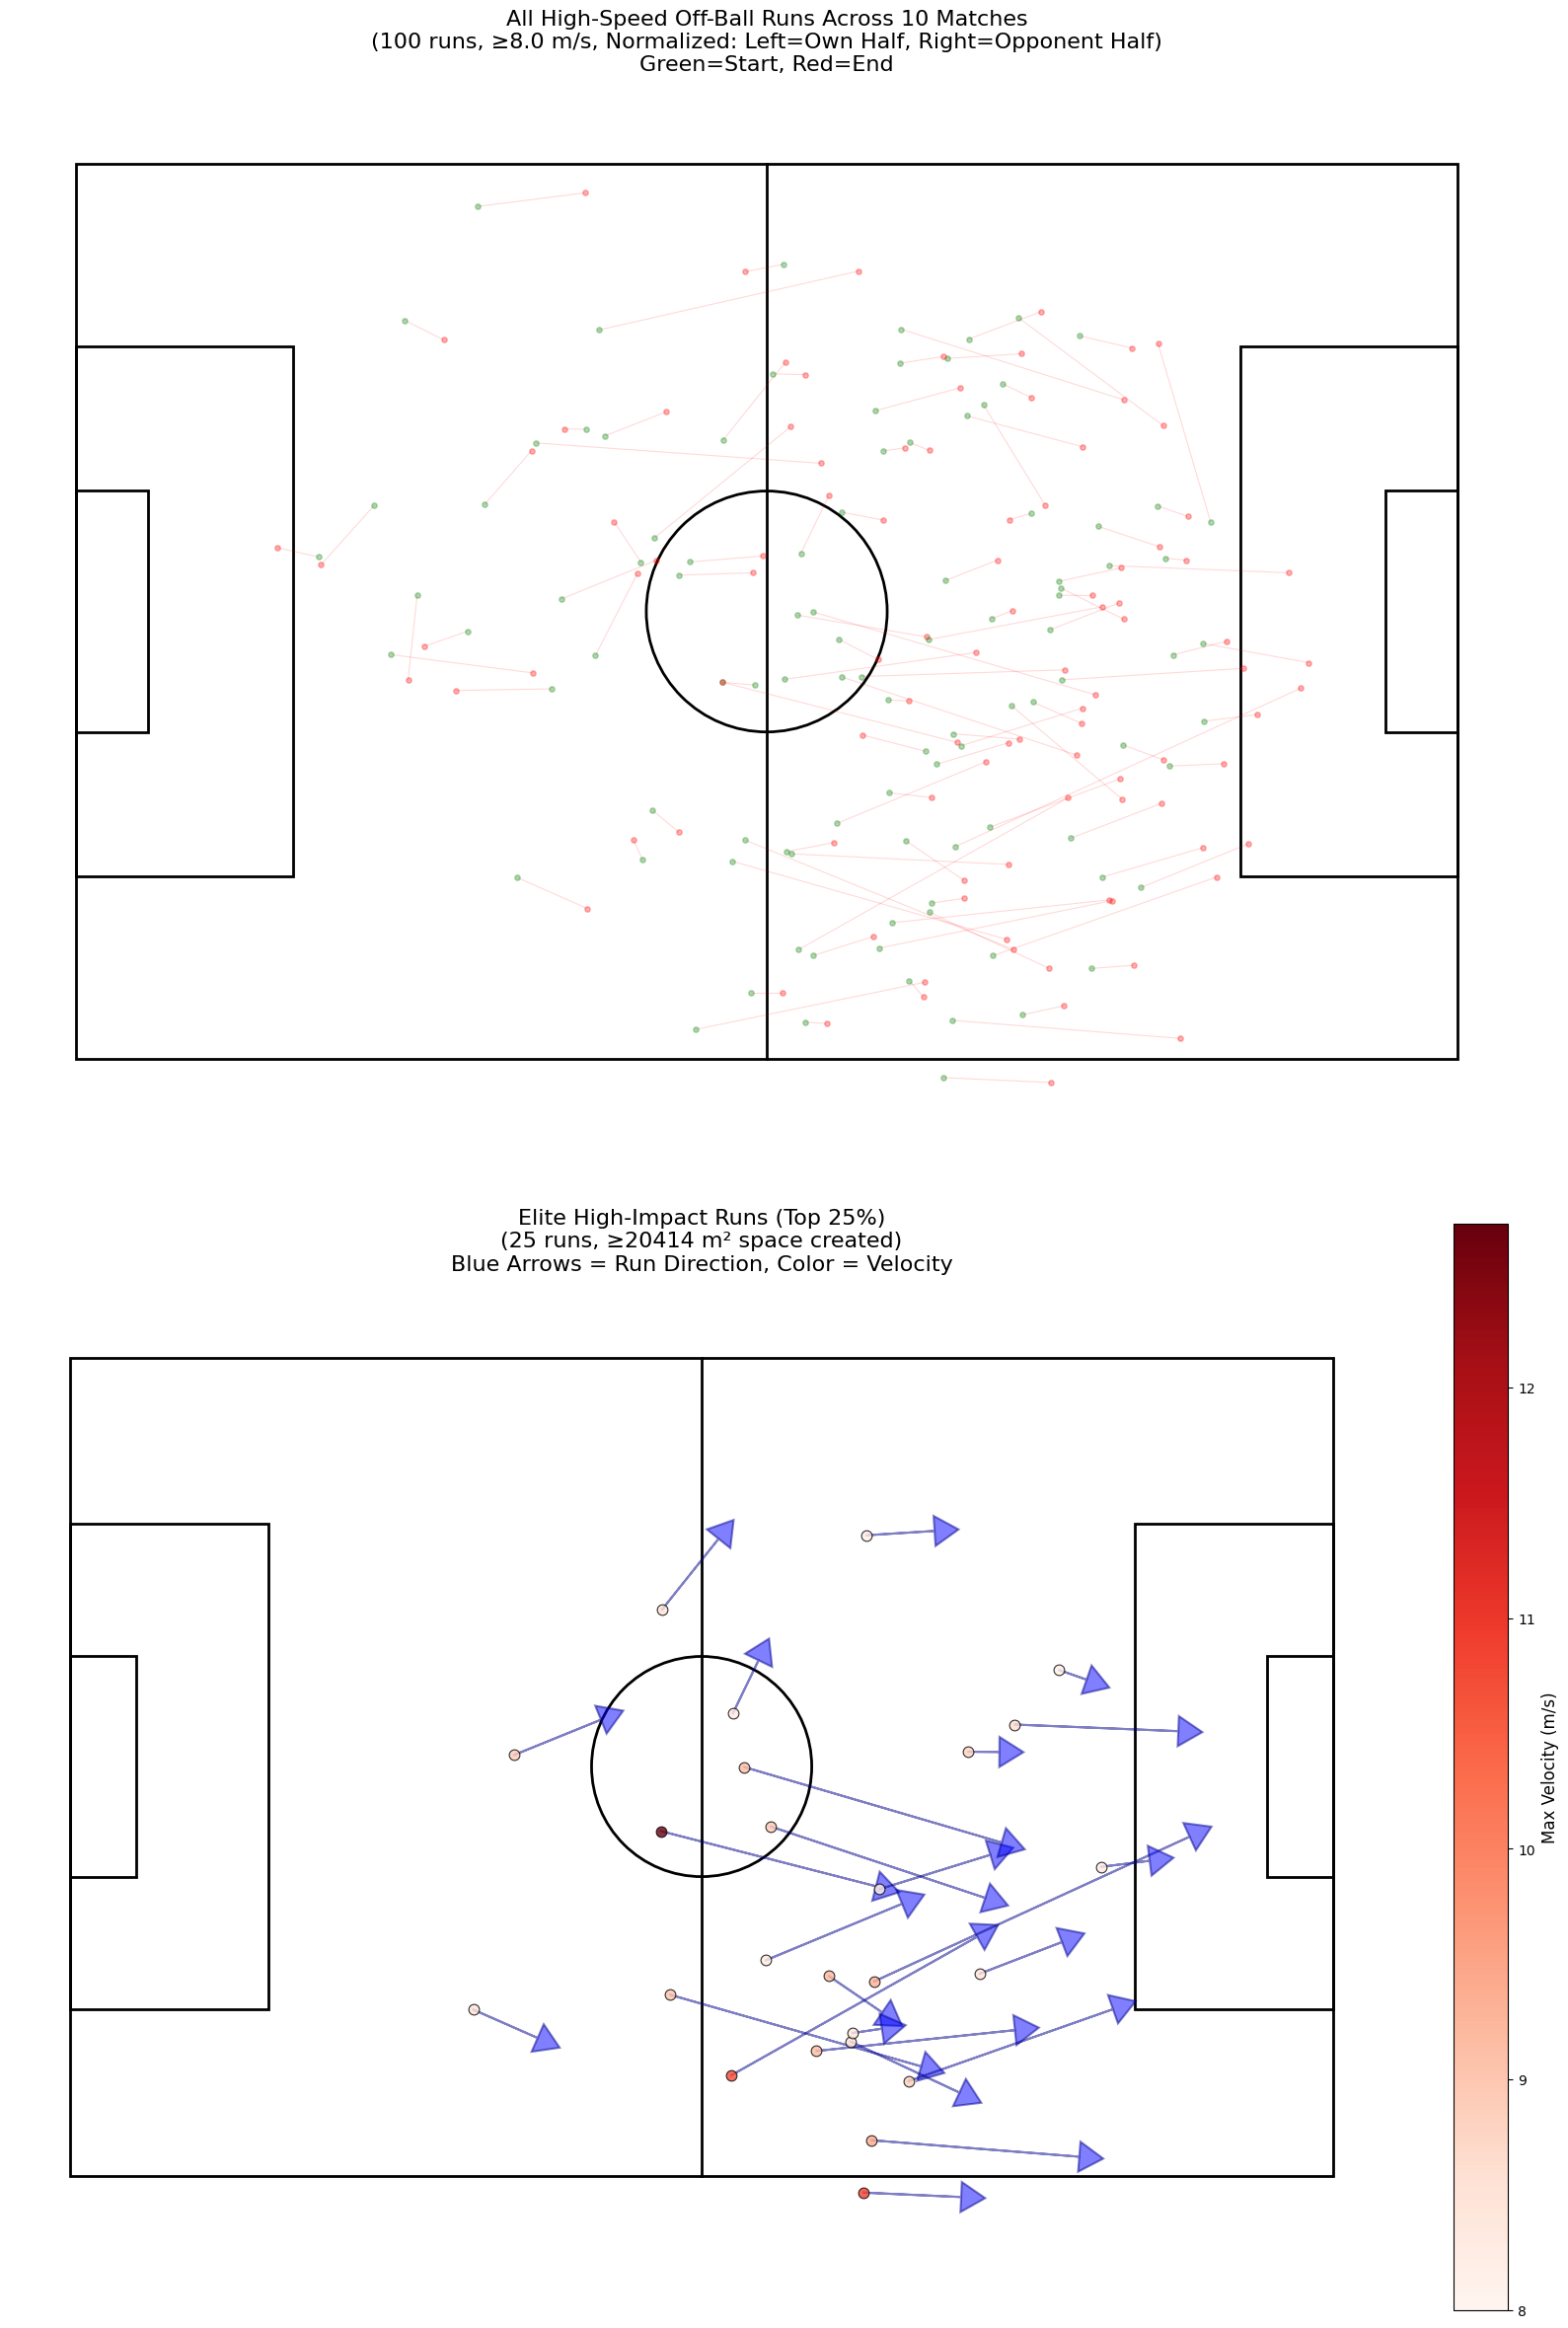


✓✓✓ VISUALIZATION COMPLETE!

Key Stats:
  - Fastest run: 24.58 m/s
  - Most space created: 117398 m²
  - Avg run duration: 1.0 seconds


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.data_loader import load_matches_info, load_match_data
from src.space_analysis import analyze_all_matches_normalized
from src.visualization import draw_pitch

# Load all matches
matches = load_matches_info()

print(f"Analyzing {len(matches)} matches...")

# Analyze all with 8.0 m/s threshold
all_traj = analyze_all_matches_normalized(matches, load_match_data, velocity_threshold=8.0)

if len(all_traj) == 0:
    print("No runs found at 8.0 m/s!")
else:
    # Get Top 25%
    threshold_75 = all_traj['total_space_created'].quantile(0.75)
    top_25 = all_traj[all_traj['total_space_created'] >= threshold_75]
    
    print(f"\n=== SUMMARY ===")
    print(f"All runs (≥8.0 m/s): {len(all_traj)}")
    print(f"Top 25% (≥{threshold_75:.0f} m²): {len(top_25)}")
    
    # Plot: 2 panels
    fig, axes = plt.subplots(2, 1, figsize=(16, 24))
    
    # === PANEL 1: ALL RUNS ===
    draw_pitch(axes[0], color='white')
    
    for _, traj in all_traj.iterrows():
        axes[0].plot([traj['start_x'], traj['end_x']], 
                     [traj['start_y'], traj['end_y']], 
                     color='red', alpha=0.15, linewidth=0.8)
        axes[0].scatter(traj['start_x'], traj['start_y'], 
                       c='green', s=15, alpha=0.3, zorder=5)
        axes[0].scatter(traj['end_x'], traj['end_y'], 
                       c='red', s=15, alpha=0.3, zorder=5)
    
    axes[0].set_title(
        f'All High-Speed Off-Ball Runs Across 10 Matches\n'
        f'({len(all_traj)} runs, ≥8.0 m/s, Normalized: Left=Own Half, Right=Opponent Half)\n'
        f'Green=Start, Red=End',
        fontsize=16, pad=20
    )
    
    # === PANEL 2: TOP 25% WITH ARROWS ===
    draw_pitch(axes[1], color='white')
    
    for _, traj in top_25.iterrows():
        # Arrow
        dx = traj['end_x'] - traj['start_x']
        dy = traj['end_y'] - traj['start_y']
        
        axes[1].arrow(traj['start_x'], traj['start_y'], dx, dy,
                     head_width=2.5, head_length=2, fc='blue', ec='darkblue', 
                     alpha=0.5, linewidth=1.5, zorder=5)
        
        # Start point colored by velocity
        axes[1].scatter(traj['start_x'], traj['start_y'], 
                       c=traj['max_velocity'], cmap='Reds', 
                       s=60, edgecolors='black', linewidths=0.8, 
                       vmin=8.0, vmax=top_25['max_velocity'].max(), 
                       zorder=10, alpha=0.8)
    
    # Colorbar
    sm = plt.cm.ScalarMappable(
        cmap='Reds', 
        norm=plt.Normalize(vmin=8.0, vmax=top_25['max_velocity'].max())
    )
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=axes[1], fraction=0.046, pad=0.04)
    cbar.set_label('Max Velocity (m/s)', fontsize=12)
    
    axes[1].set_title(
        f'Elite High-Impact Runs (Top 25%)\n'
        f'({len(top_25)} runs, ≥{threshold_75:.0f} m² space created)\n'
        f'Blue Arrows = Run Direction, Color = Velocity',
        fontsize=16, pad=20
    )
    
    plt.tight_layout()
    plt.show()
    
    print("\n✓✓✓ VISUALIZATION COMPLETE!")
    print(f"\nKey Stats:")
    print(f"  - Fastest run: {all_traj['max_velocity'].max():.2f} m/s")
    print(f"  - Most space created: {all_traj['total_space_created'].max():.0f} m²")
    print(f"  - Avg run duration: {all_traj['duration_frames'].mean()/10:.1f} seconds")

Analyzing 10 matches...

=== ANALYZING ALL MATCHES (threshold: 6.0 m/s) ===



Processing matches:   0%|          | 0/10 [00:00<?, ?it/s]

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Detected 9,131 frames with velocity >= 6.0 m/s
✓ From 20 unique players

Analyzing 9,131 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 9131/9131 [00:05<00:00, 1757.89it/s]


✓ Analyzed 948 off-ball runs (own team possession only)
✓ Detected 8,580 frames with velocity >= 6.0 m/s
✓ From 32 unique players

Analyzing 8,580 run frames (team possession filter)...


Processing matches:  10%|█         | 1/10 [00:15<02:16, 15.19s/it]

✓ Analyzed 888 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 57,621 Tracking Frames geladen
✓ Events aus Cache
✓ 5,292 Events geladen
✓ Phases aus Cache
✓ 448 Phases geladen
✓ Detected 7,998 frames with velocity >= 6.0 m/s
✓ From 21 unique players

Analyzing 7,998 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 7998/7998 [00:04<00:00, 1727.85it/s]


✓ Analyzed 896 off-ball runs (own team possession only)
✓ Detected 7,969 frames with velocity >= 6.0 m/s
✓ From 30 unique players

Analyzing 7,969 run frames (team possession filter)...


Processing matches:  20%|██        | 2/10 [00:29<01:56, 14.54s/it]

✓ Analyzed 641 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 59,061 Tracking Frames geladen
✓ Events aus Cache
✓ 5,079 Events geladen
✓ Phases aus Cache
✓ 454 Phases geladen
✓ Detected 8,316 frames with velocity >= 6.0 m/s
✓ From 21 unique players

Analyzing 8,316 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 8316/8316 [00:05<00:00, 1602.21it/s]


✓ Analyzed 1047 off-ball runs (own team possession only)
✓ Detected 8,168 frames with velocity >= 6.0 m/s
✓ From 28 unique players

Analyzing 8,168 run frames (team possession filter)...


Processing matches:  30%|███       | 3/10 [00:43<01:42, 14.62s/it]

✓ Analyzed 667 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 60,530 Tracking Frames geladen
✓ Events aus Cache
✓ 4,713 Events geladen
✓ Phases aus Cache
✓ 460 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (276) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Detected 7,240 frames with velocity >= 6.0 m/s
✓ From 22 unique players

Analyzing 7,240 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 7240/7240 [00:03<00:00, 2388.66it/s]


✓ Analyzed 496 off-ball runs (own team possession only)
✓ Detected 8,567 frames with velocity >= 6.0 m/s
✓ From 27 unique players

Analyzing 8,567 run frames (team possession filter)...


Processing matches:  40%|████      | 4/10 [00:56<01:23, 13.91s/it]

✓ Analyzed 767 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 61,301 Tracking Frames geladen
✓ Events aus Cache
✓ 5,220 Events geladen
✓ Phases aus Cache
✓ 492 Phases geladen
✓ Detected 6,187 frames with velocity >= 6.0 m/s
✓ From 23 unique players

Analyzing 6,187 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 6187/6187 [00:03<00:00, 1915.19it/s]


✓ Analyzed 571 off-ball runs (own team possession only)
✓ Detected 4,486 frames with velocity >= 6.0 m/s
✓ From 30 unique players

Analyzing 4,486 run frames (team possession filter)...


Processing matches:  50%|█████     | 5/10 [01:09<01:06, 13.30s/it]

✓ Analyzed 477 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 59,250 Tracking Frames geladen
✓ Events aus Cache
✓ 4,823 Events geladen
✓ Phases aus Cache
✓ 431 Phases geladen
✓ Detected 5,473 frames with velocity >= 6.0 m/s
✓ From 23 unique players

Analyzing 5,473 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 5473/5473 [00:02<00:00, 2288.83it/s]


✓ Analyzed 393 off-ball runs (own team possession only)
✓ Detected 6,432 frames with velocity >= 6.0 m/s
✓ From 28 unique players

Analyzing 6,432 run frames (team possession filter)...


Processing matches:  60%|██████    | 6/10 [01:19<00:49, 12.43s/it]

✓ Analyzed 400 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 59,270 Tracking Frames geladen
✓ Events aus Cache
✓ 4,991 Events geladen
✓ Phases aus Cache
✓ 438 Phases geladen
✓ Detected 5,980 frames with velocity >= 6.0 m/s
✓ From 21 unique players

Analyzing 5,980 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 5980/5980 [00:03<00:00, 1865.74it/s]


✓ Analyzed 616 off-ball runs (own team possession only)
✓ Detected 6,319 frames with velocity >= 6.0 m/s
✓ From 29 unique players

Analyzing 6,319 run frames (team possession filter)...


Processing matches:  70%|███████   | 7/10 [01:31<00:36, 12.24s/it]

✓ Analyzed 444 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,851 Tracking Frames geladen
✓ Events aus Cache
✓ 3,966 Events geladen
✓ Phases aus Cache
✓ 429 Phases geladen
✓ Detected 9,910 frames with velocity >= 6.0 m/s
✓ From 20 unique players

Analyzing 9,910 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 9910/9910 [00:05<00:00, 1810.75it/s]


✓ Analyzed 1070 off-ball runs (own team possession only)
✓ Detected 10,207 frames with velocity >= 6.0 m/s
✓ From 32 unique players

Analyzing 10,207 run frames (team possession filter)...


Processing matches:  80%|████████  | 8/10 [01:48<00:27, 13.65s/it]

✓ Analyzed 1016 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 70,251 Tracking Frames geladen
✓ Events aus Cache
✓ 4,999 Events geladen
✓ Phases aus Cache
✓ 486 Phases geladen
✓ Detected 9,030 frames with velocity >= 6.0 m/s
✓ From 21 unique players

Analyzing 9,030 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 9030/9030 [00:04<00:00, 2150.99it/s]


✓ Analyzed 775 off-ball runs (own team possession only)
✓ Detected 10,919 frames with velocity >= 6.0 m/s
✓ From 30 unique players

Analyzing 10,919 run frames (team possession filter)...


Processing matches:  90%|█████████ | 9/10 [02:03<00:14, 14.03s/it]

✓ Analyzed 872 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 72,101 Tracking Frames geladen
✓ Events aus Cache
✓ 4,582 Events geladen
✓ Phases aus Cache
✓ 506 Phases geladen
✓ Detected 10,257 frames with velocity >= 6.0 m/s
✓ From 22 unique players

Analyzing 10,257 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 10257/10257 [00:03<00:00, 2663.18it/s]


✓ Analyzed 586 off-ball runs (own team possession only)
✓ Detected 10,847 frames with velocity >= 6.0 m/s
✓ From 28 unique players

Analyzing 10,847 run frames (team possession filter)...


Processing matches: 100%|██████████| 10/10 [02:18<00:00, 13.87s/it]


✓ Analyzed 925 off-ball runs (own team possession only)

✓ Total runs across all matches: 1215
✓ Avg velocity: 6.99 m/s
✓ Avg space created: 18810 m²

=== CREATING TEAM-SPECIFIC PLOTS ===
Processing 10 matches...

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


Match 2017461: Melbourne Victory Football Club 0 - 1 Auckland FC
  Home: 59 runs
  Away: 70 runs


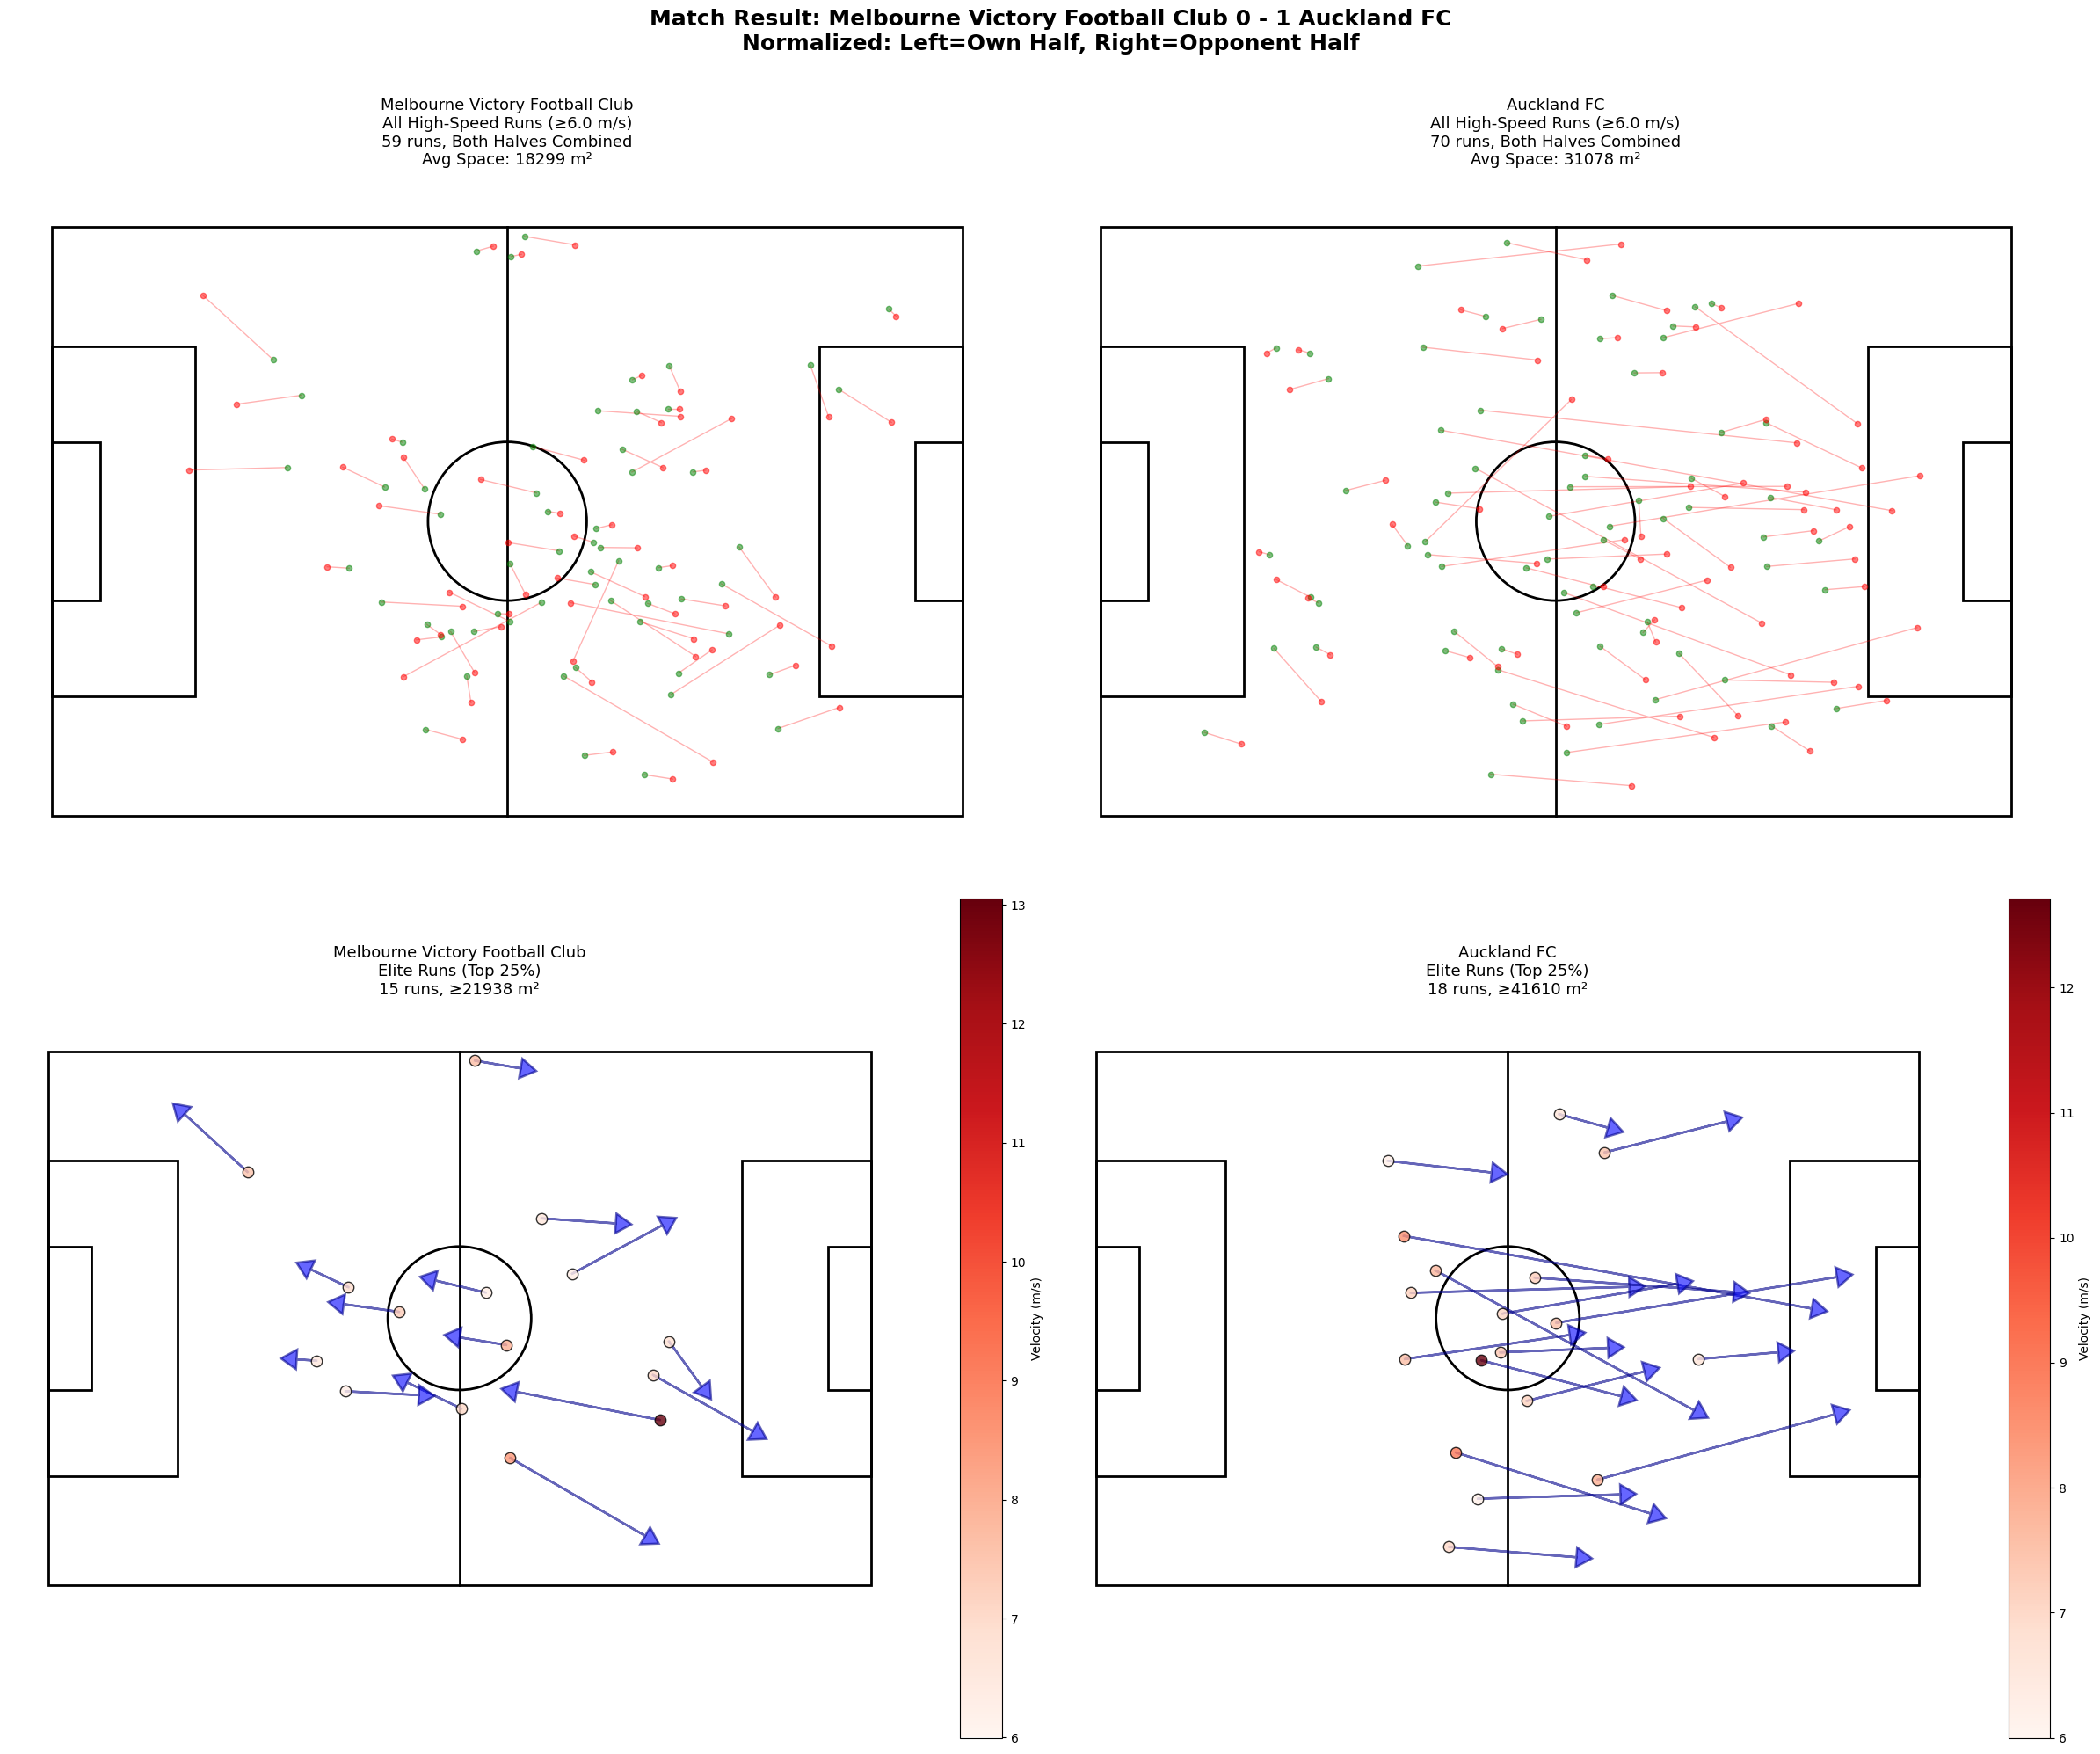

  ✓ Plotted

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 57,621 Tracking Frames geladen
✓ Events aus Cache
✓ 5,292 Events geladen
✓ Phases aus Cache
✓ 448 Phases geladen
Match 1996435: Sydney Football Club 4 - 1 Adelaide United Football Club
  Home: 63 runs
  Away: 65 runs


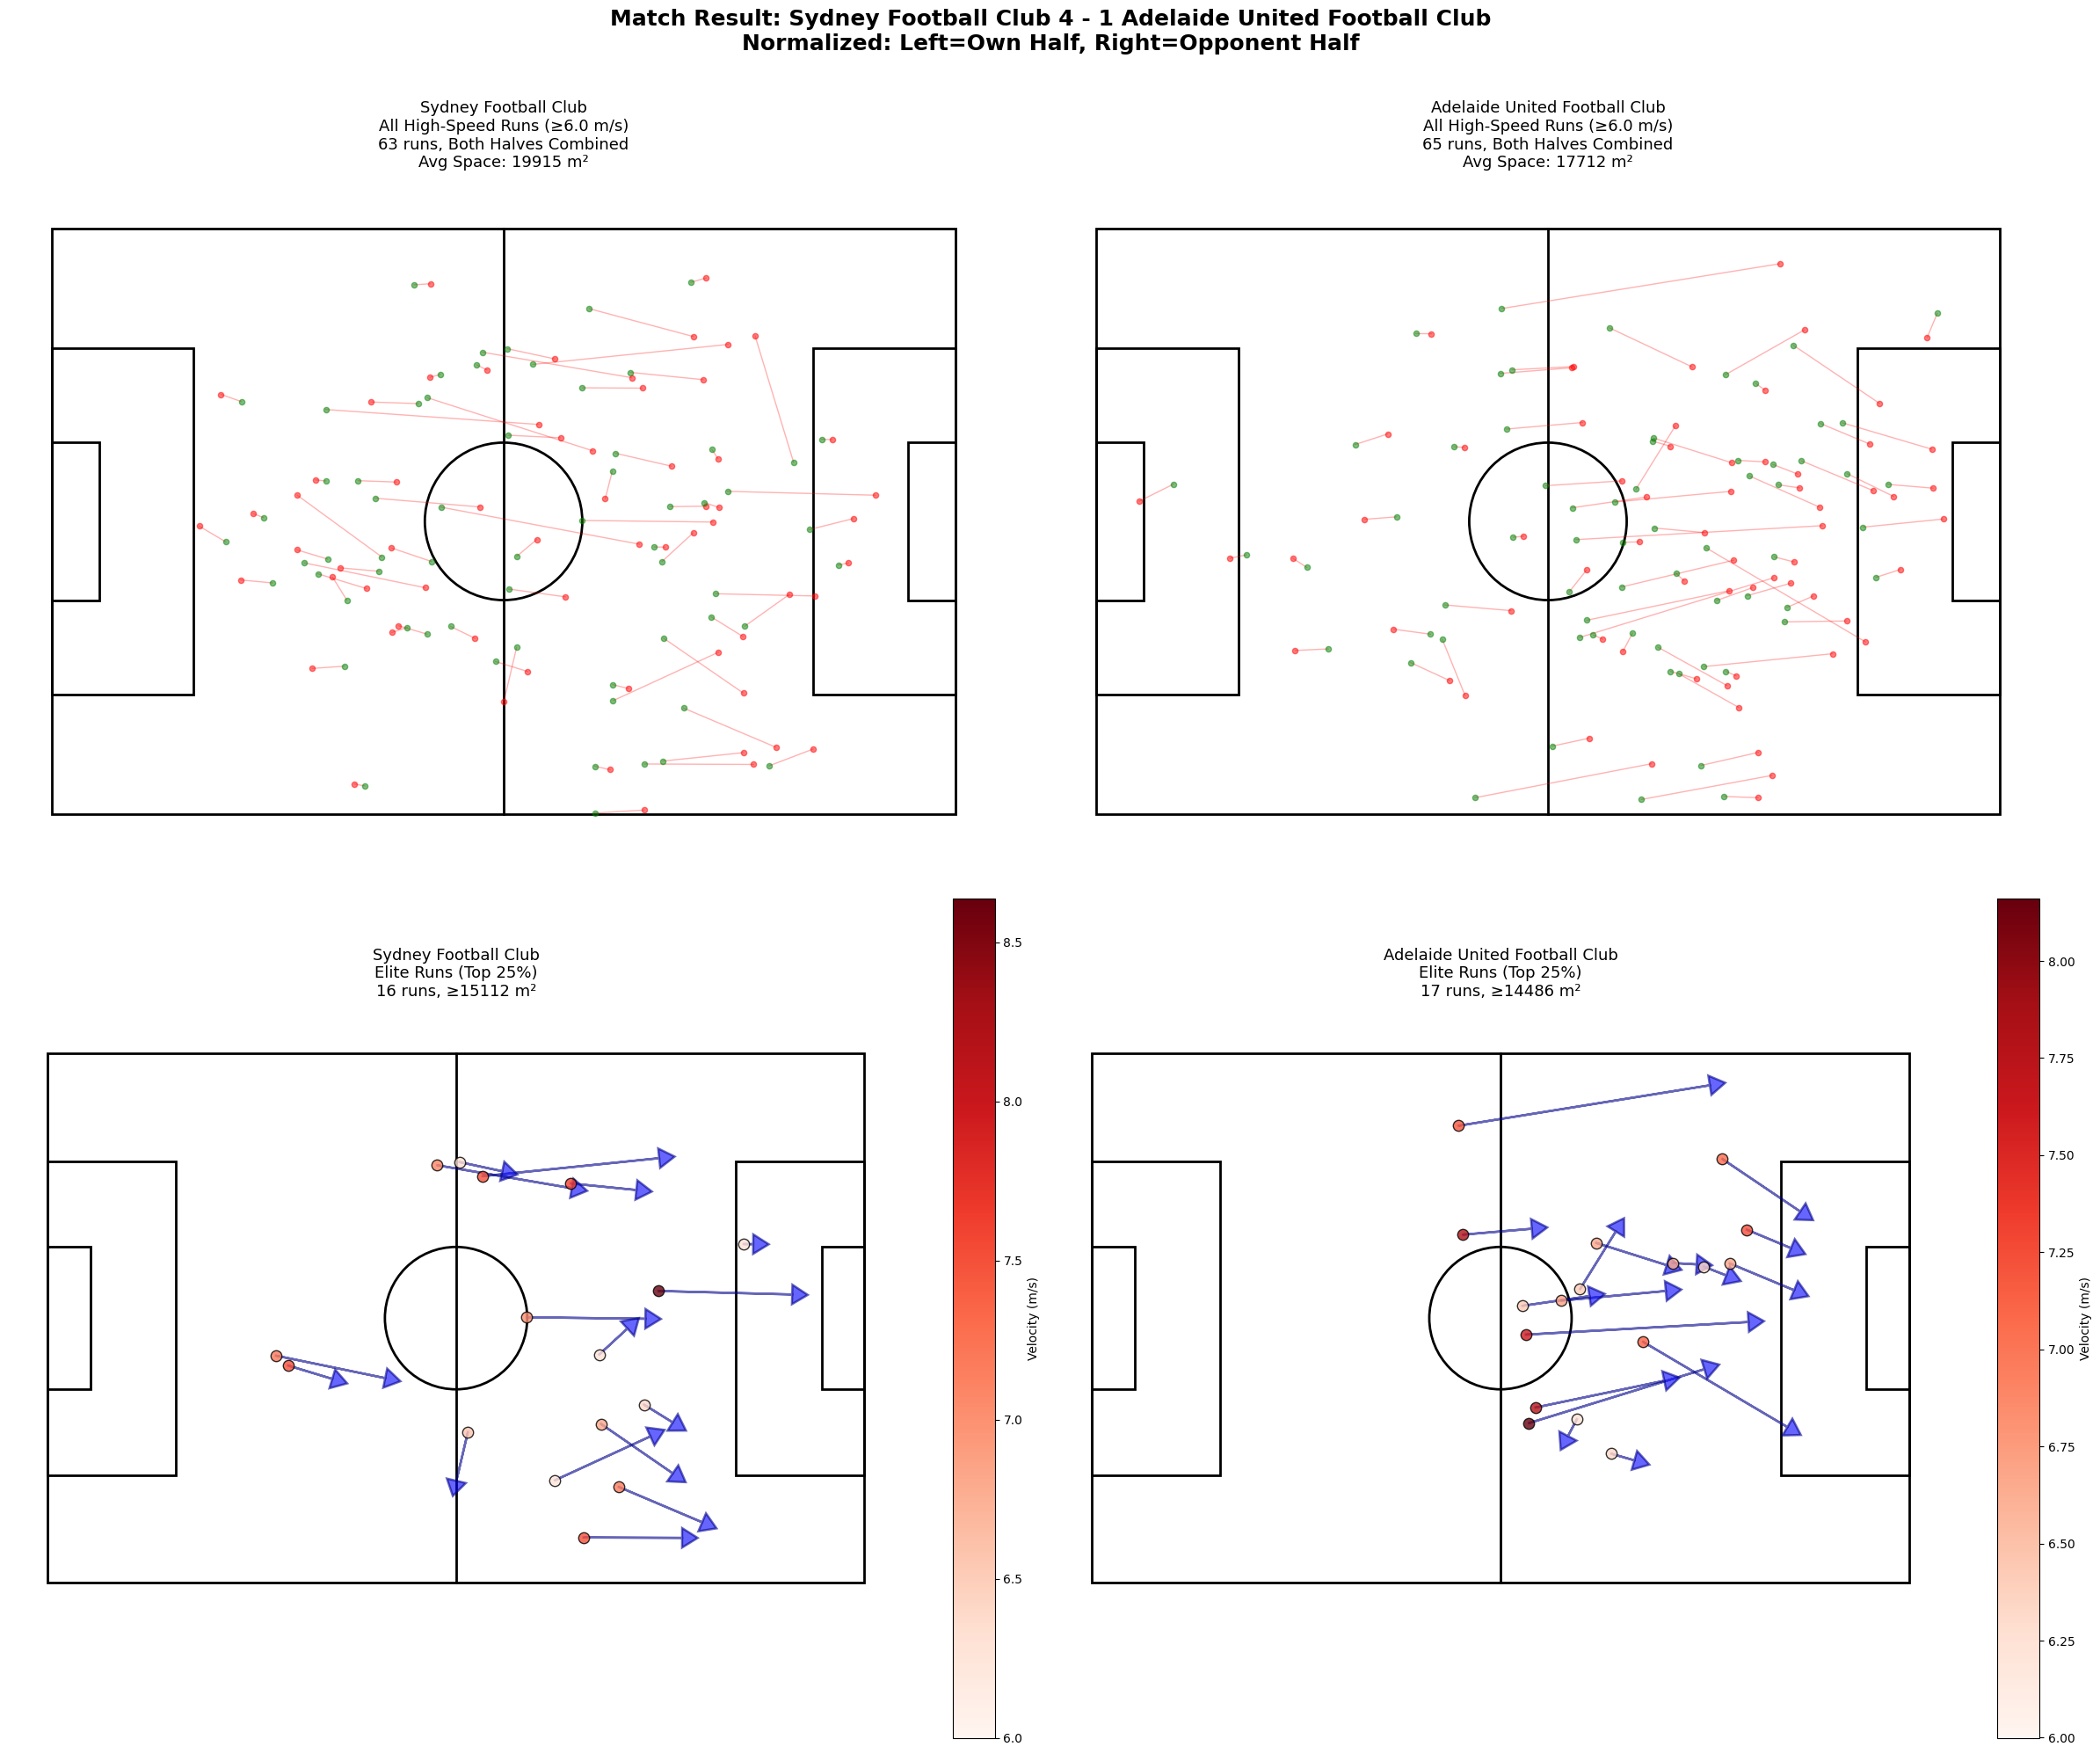

  ✓ Plotted

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 59,061 Tracking Frames geladen
✓ Events aus Cache
✓ 5,079 Events geladen
✓ Phases aus Cache
✓ 454 Phases geladen
Match 1886347: Auckland FC 2 - 0 Newcastle United Jets FC
  Home: 81 runs
  Away: 62 runs


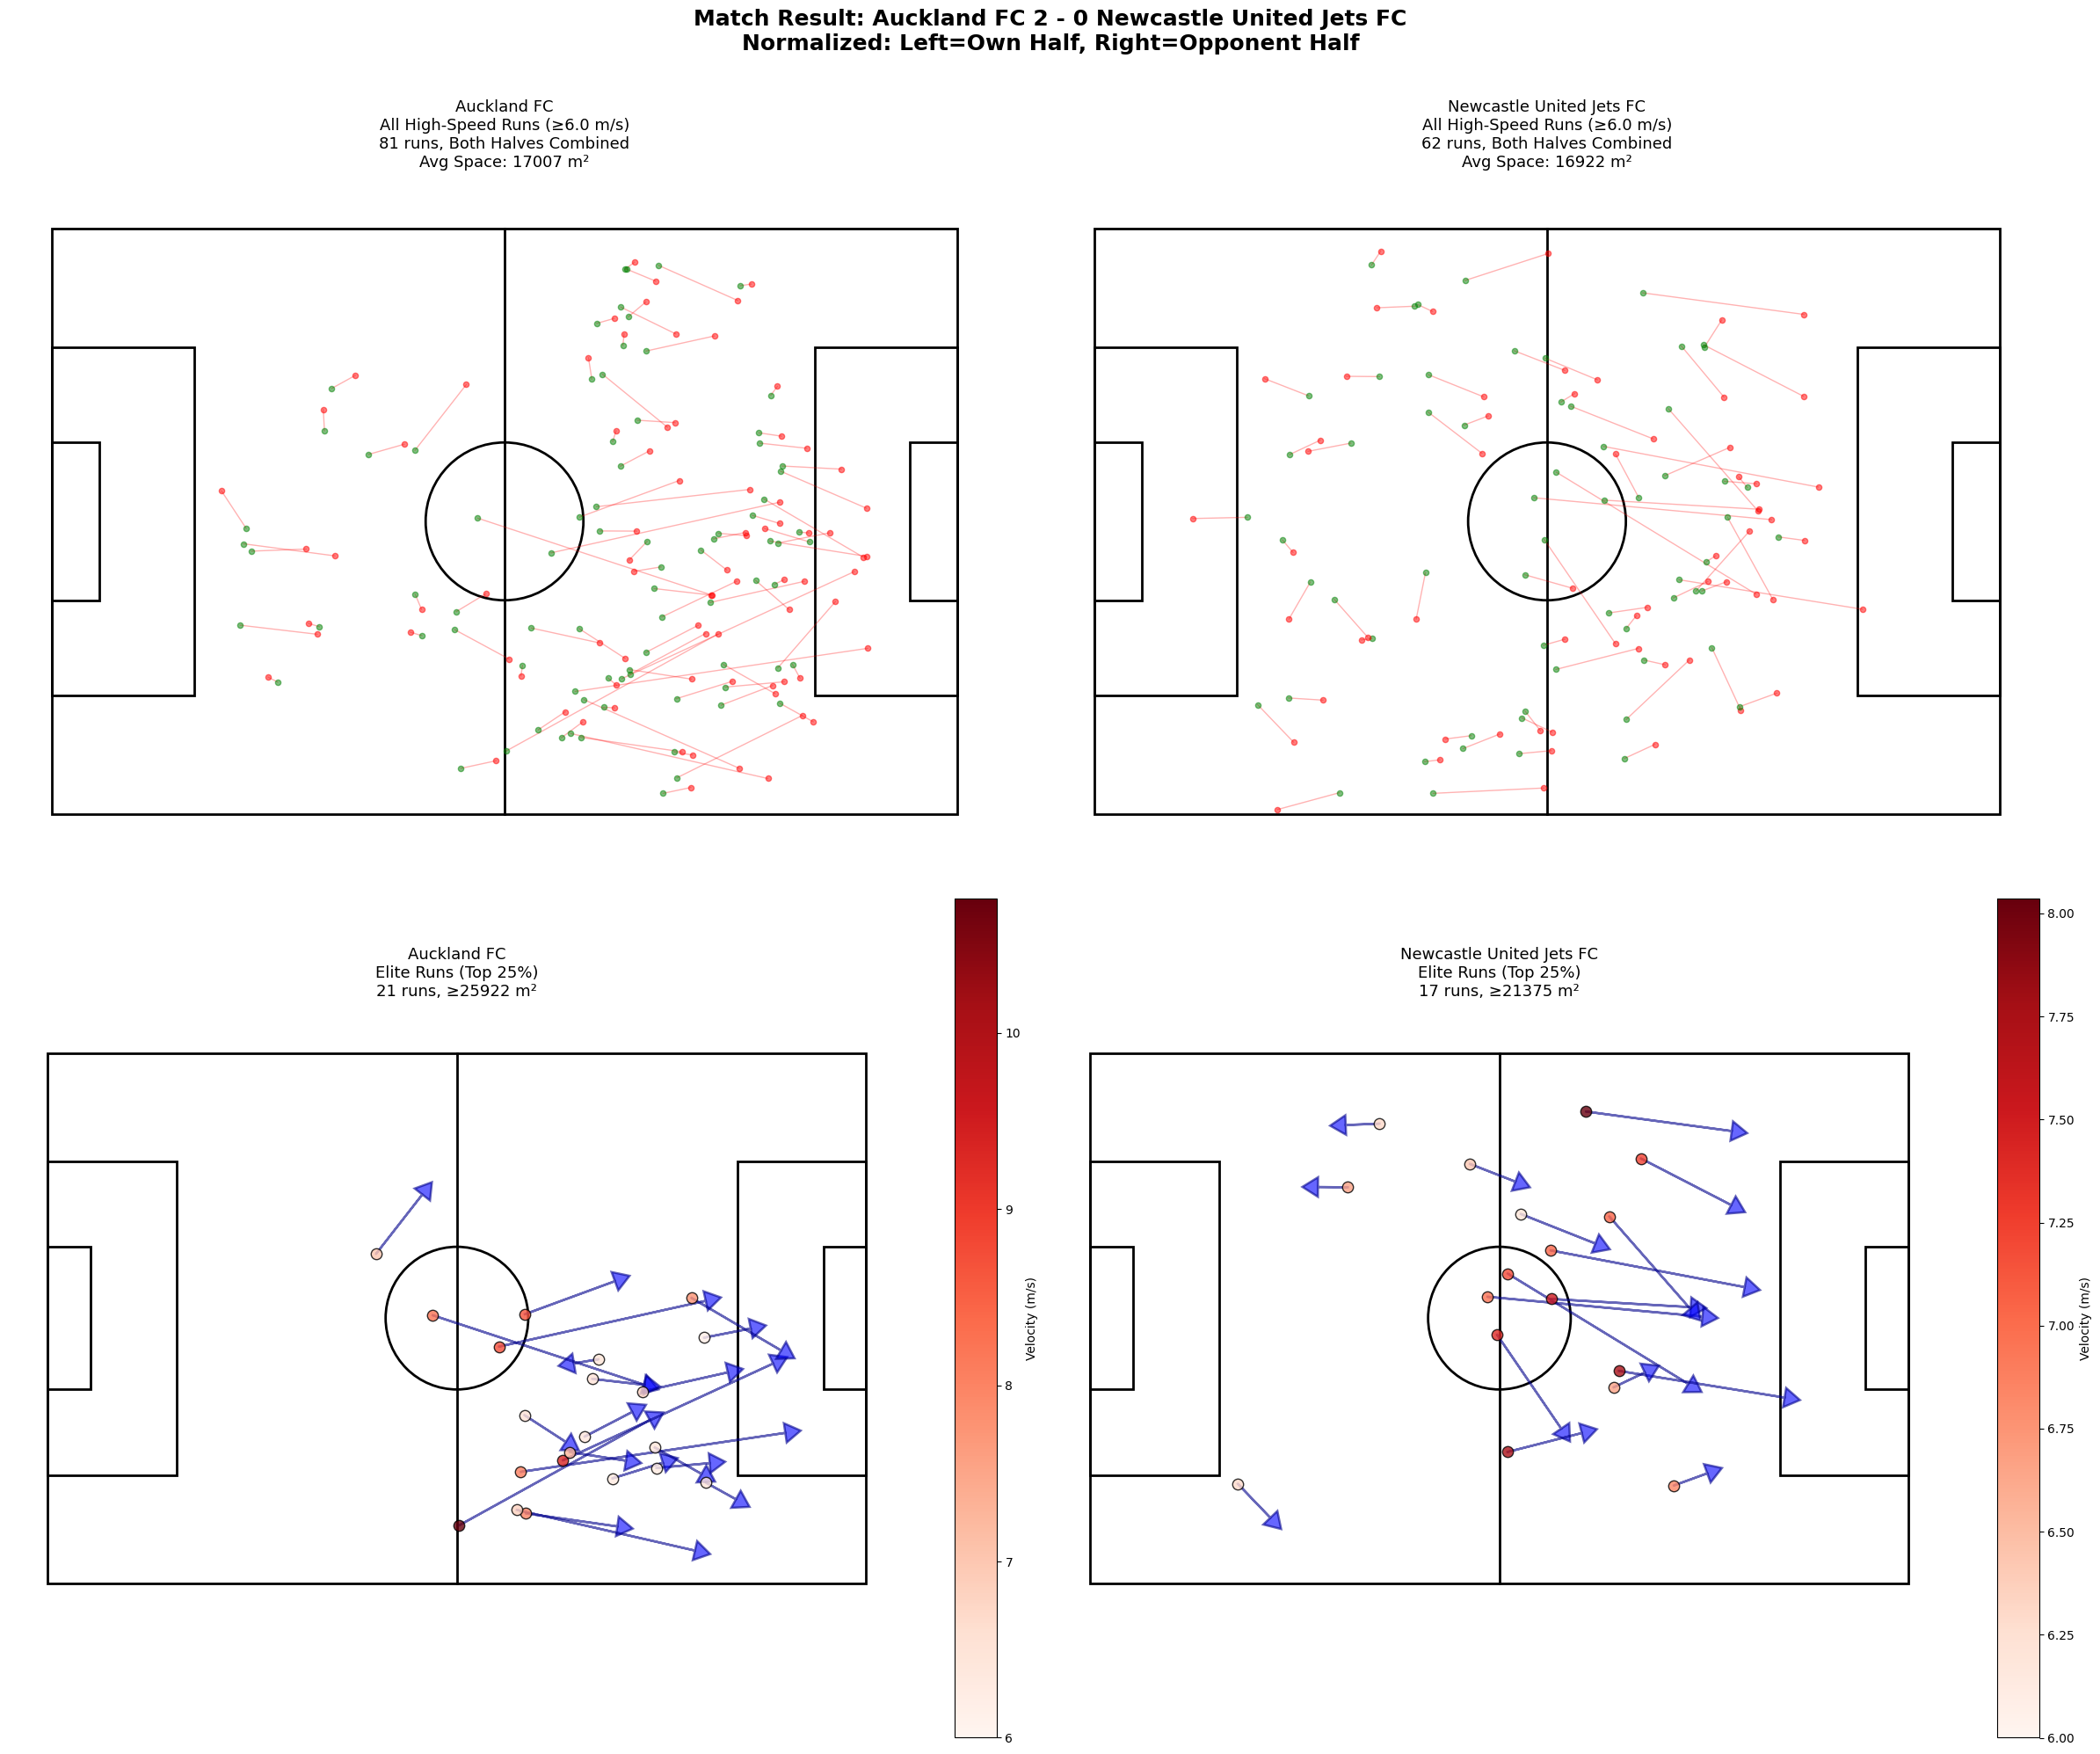

  ✓ Plotted

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 60,530 Tracking Frames geladen
✓ Events aus Cache
✓ 4,713 Events geladen
✓ Phases aus Cache
✓ 460 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:103: DtypeWarning: Columns (276) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


Match 1899585: Auckland FC 2 - 1 Wellington Phoenix FC
  Home: 49 runs
  Away: 66 runs


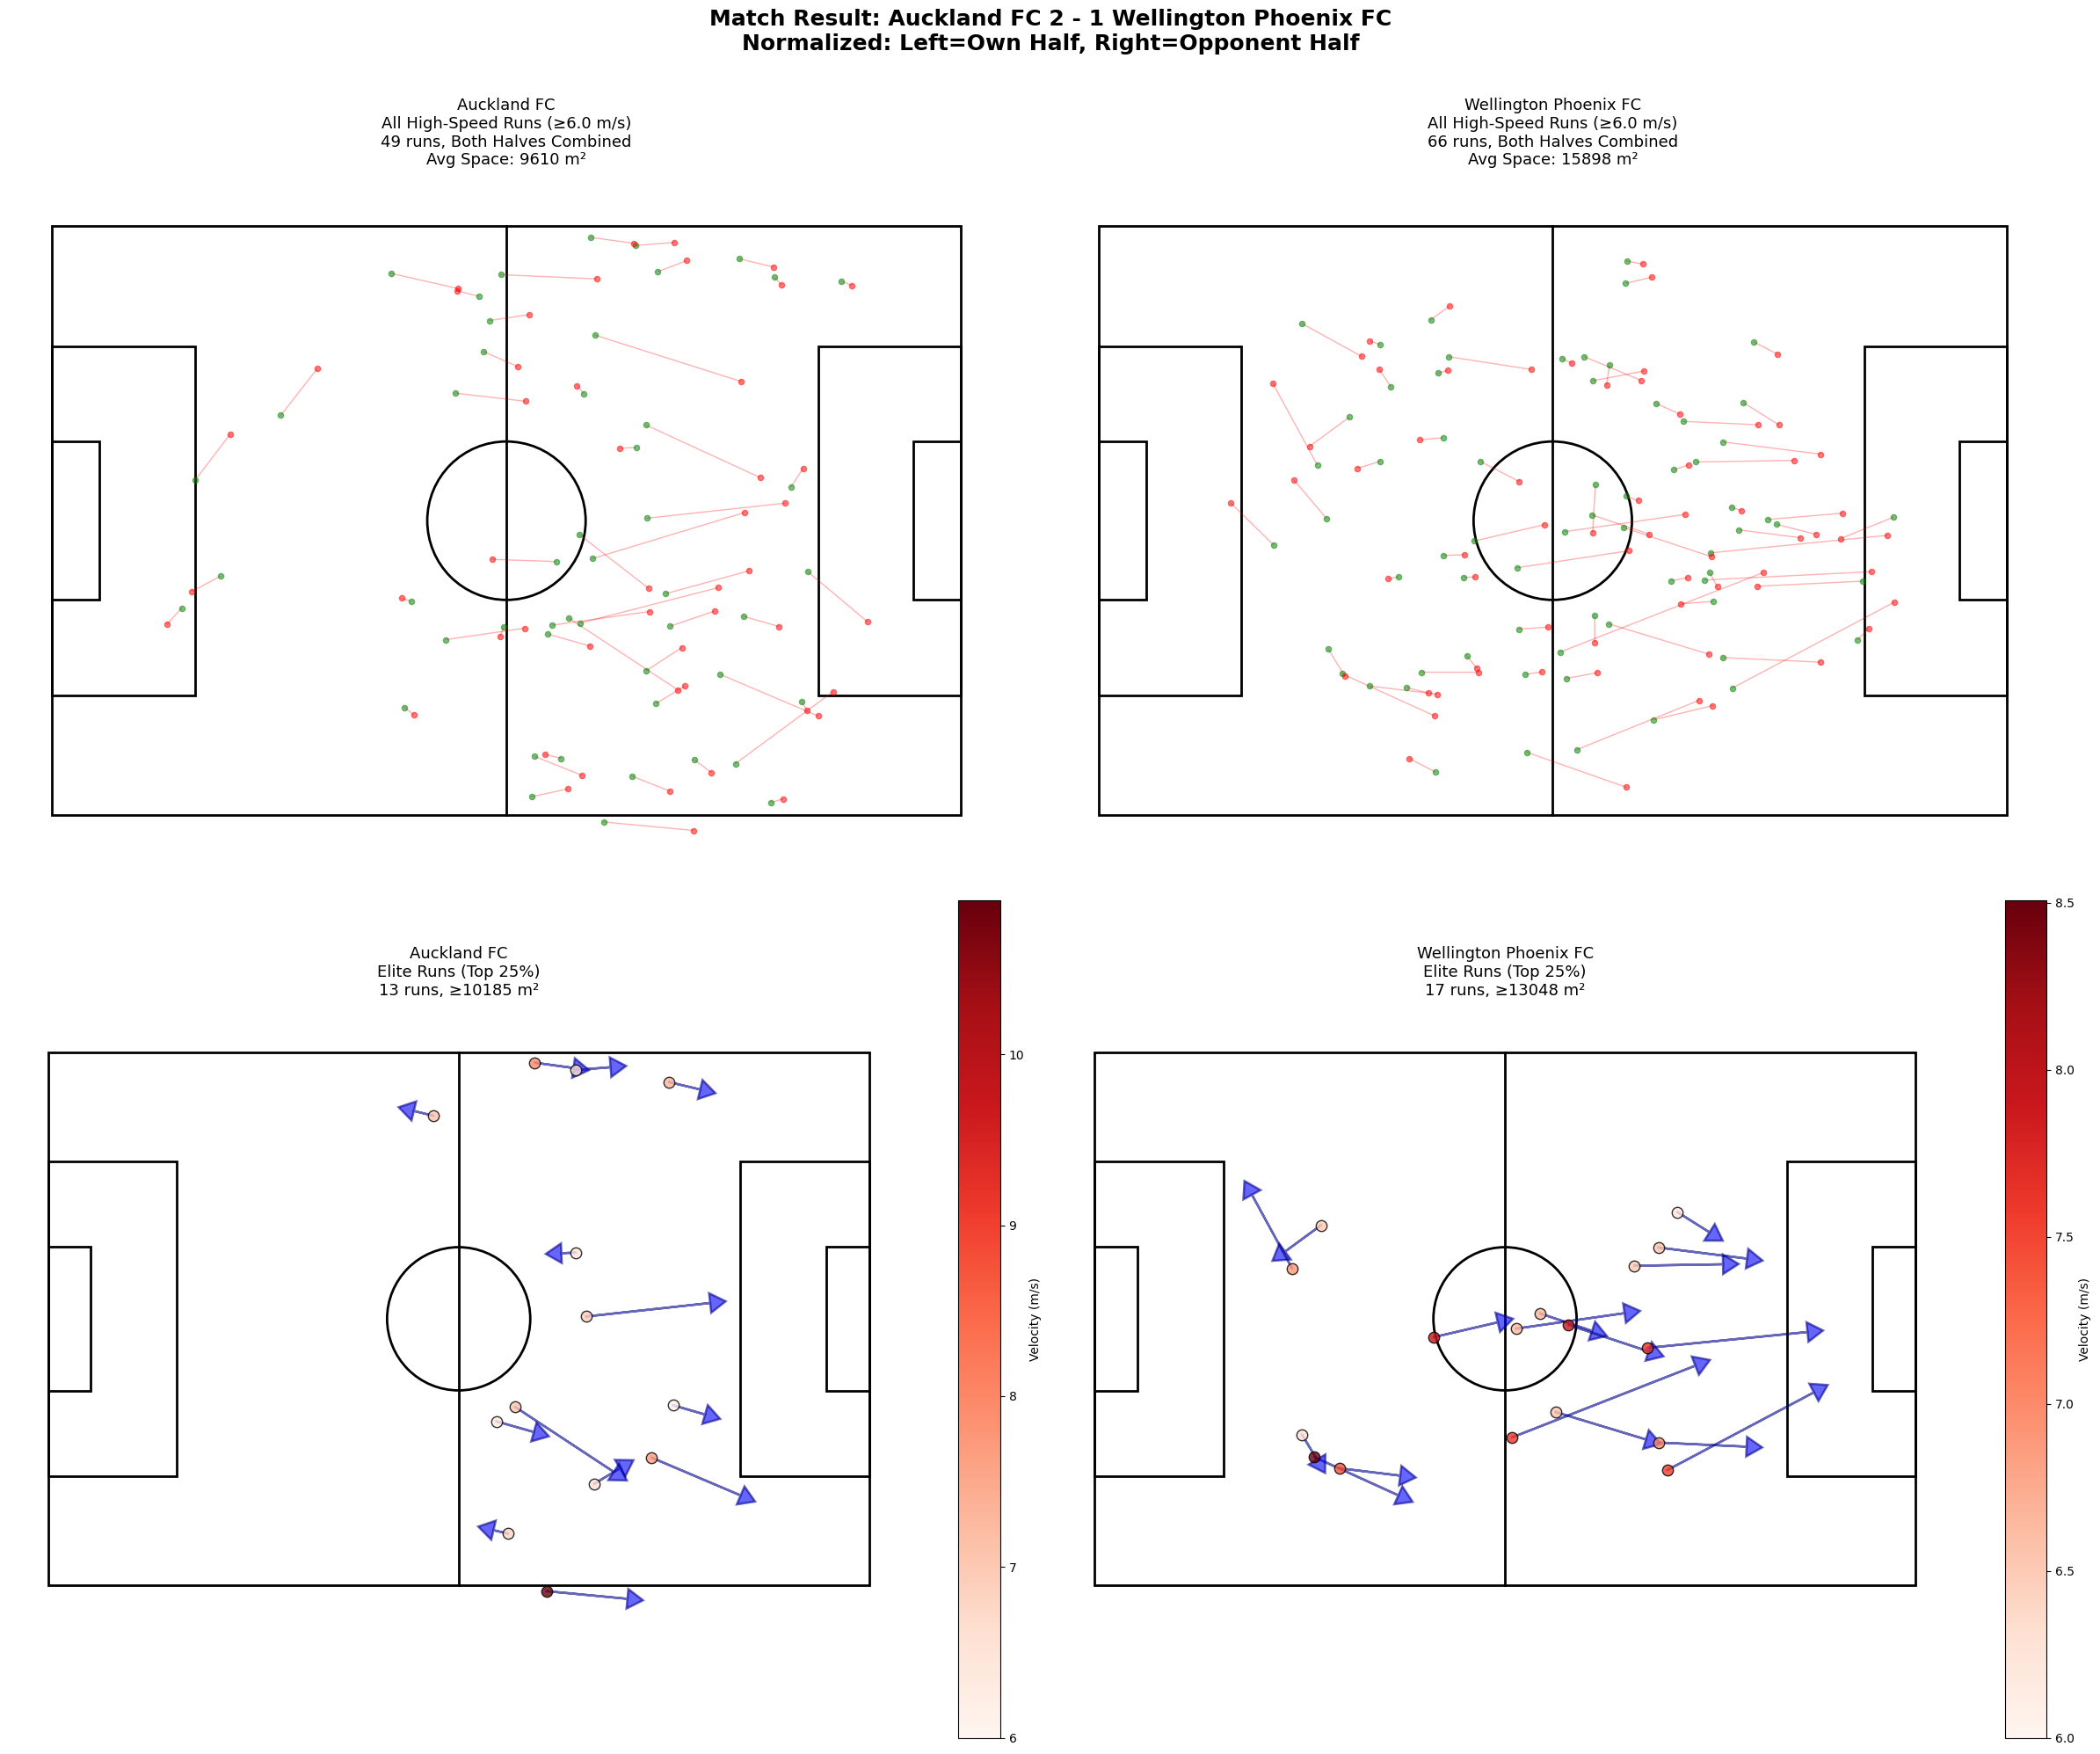

  ✓ Plotted

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 61,301 Tracking Frames geladen
✓ Events aus Cache
✓ 5,220 Events geladen
✓ Phases aus Cache
✓ 492 Phases geladen
Match 1925299: Brisbane Roar FC 0 - 1 Perth Glory Football Club
  Home: 51 runs
  Away: 42 runs


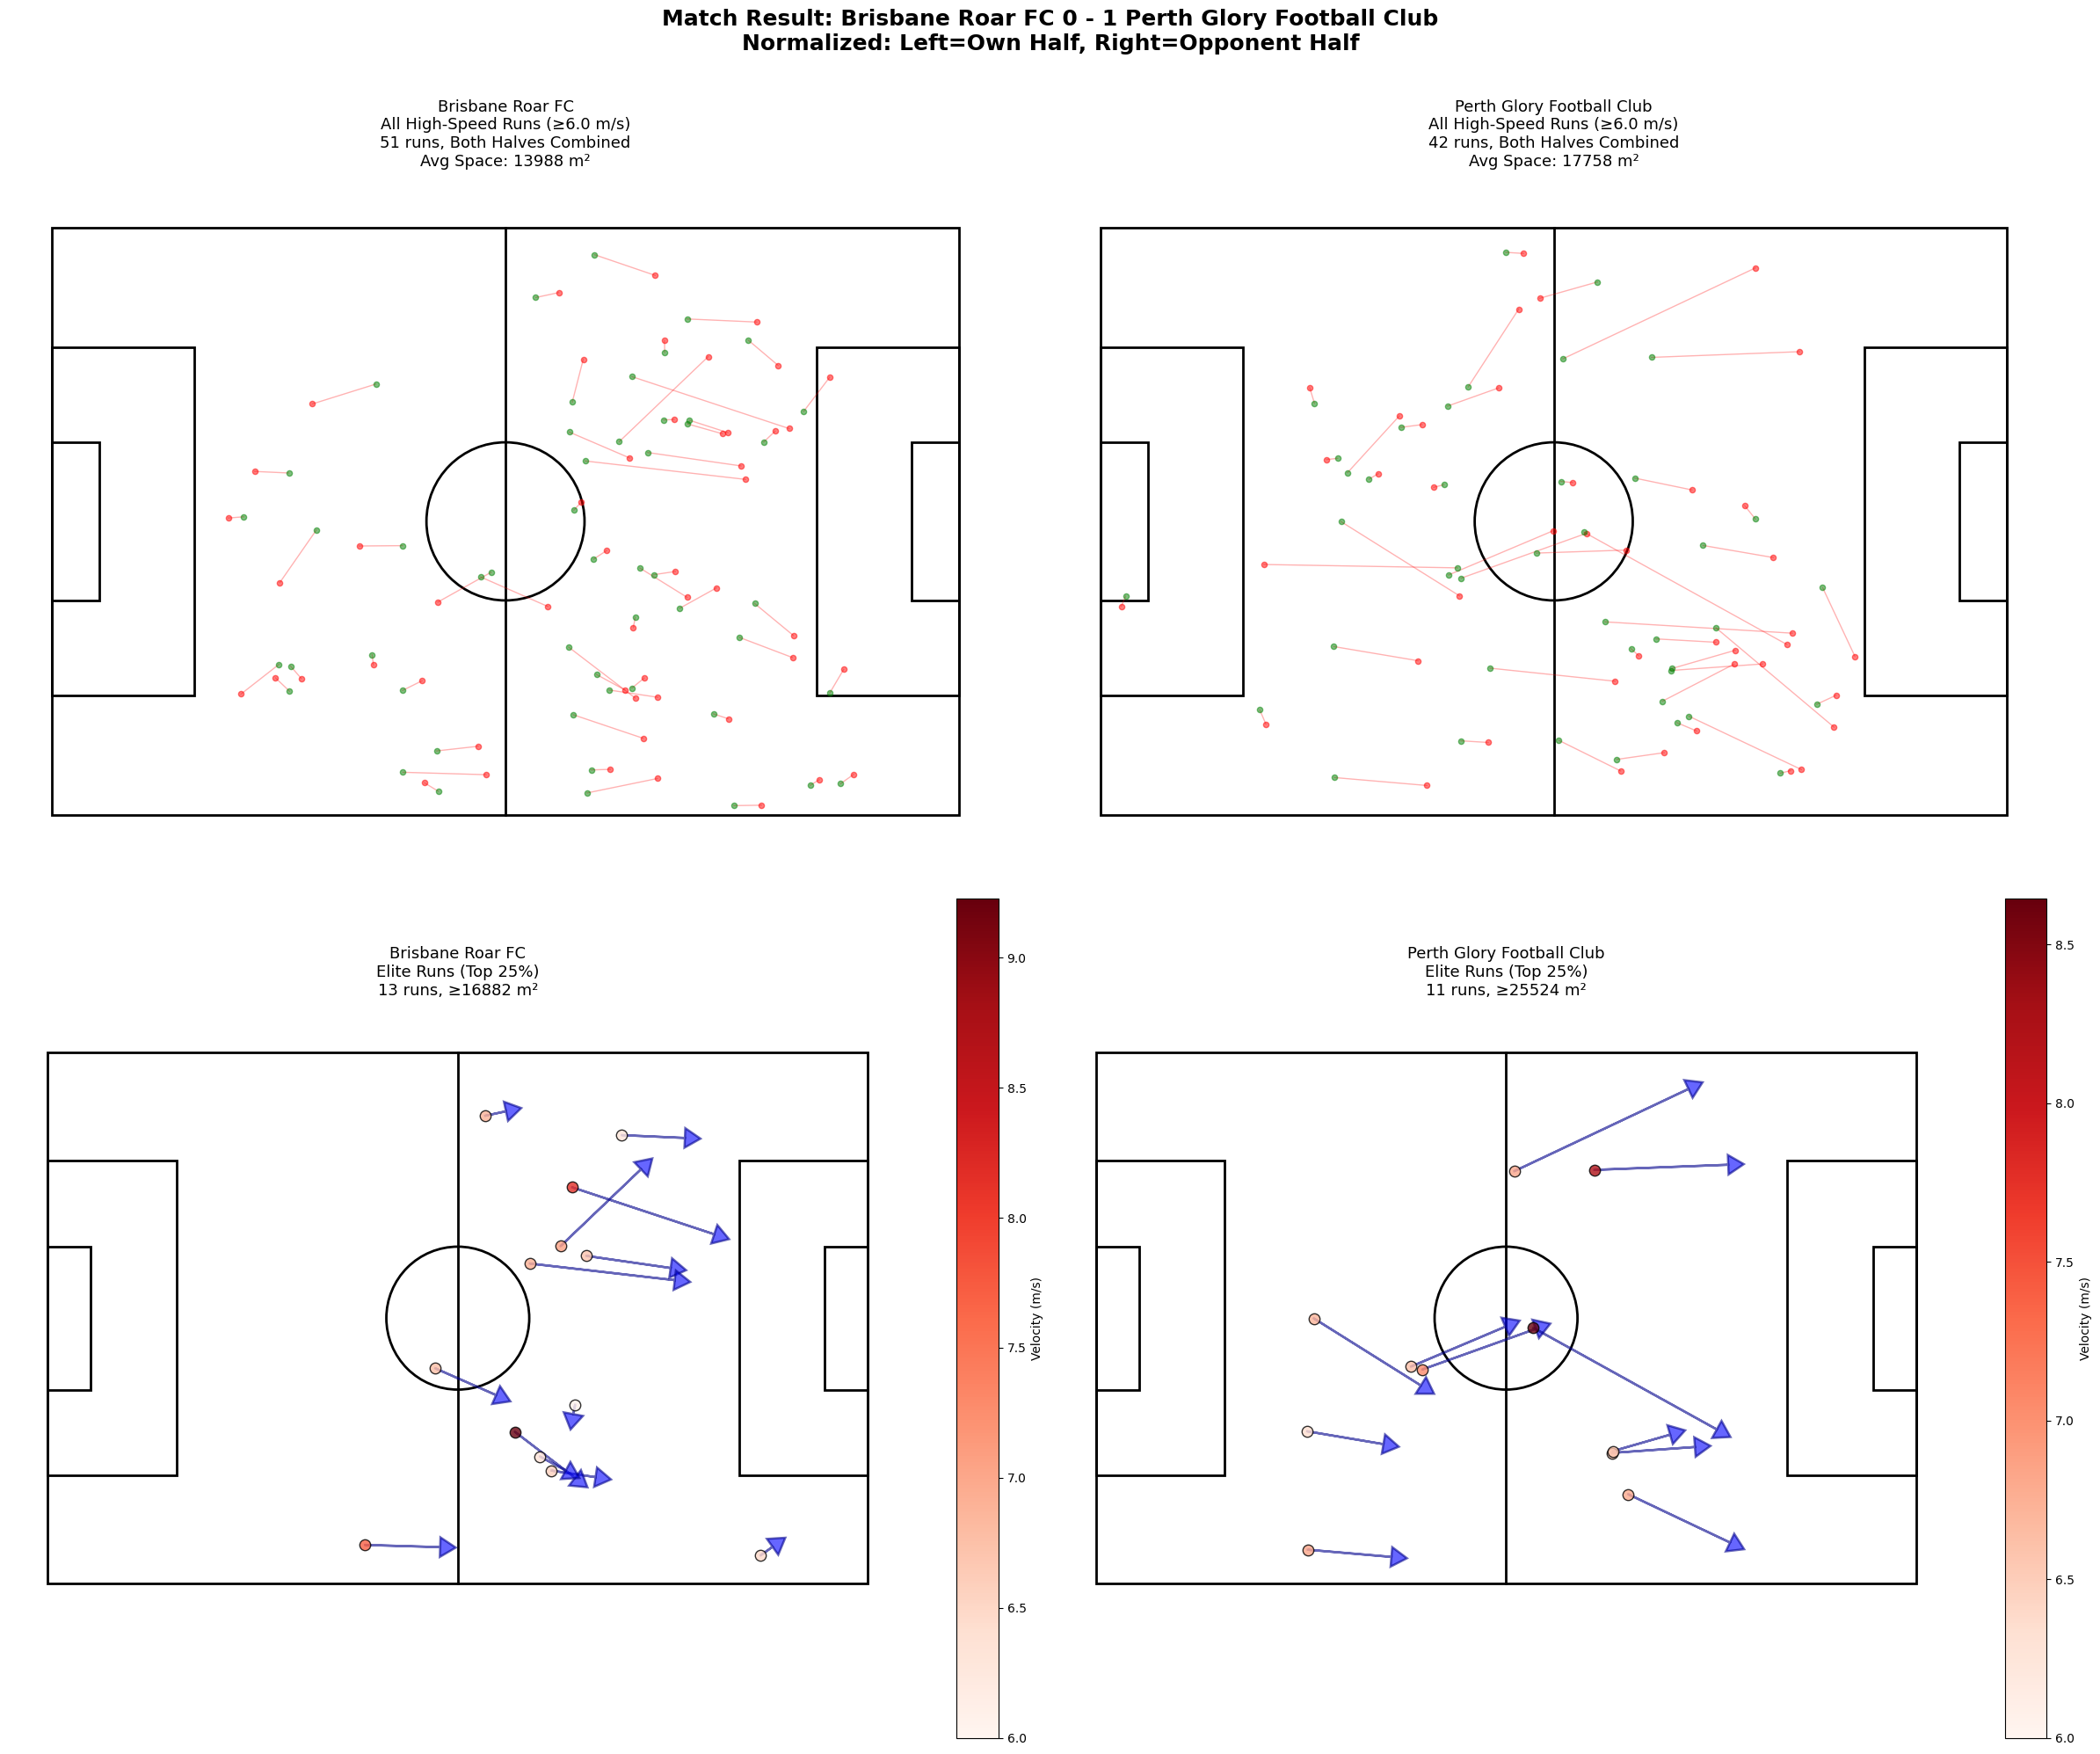

  ✓ Plotted

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 59,250 Tracking Frames geladen
✓ Events aus Cache
✓ 4,823 Events geladen
✓ Phases aus Cache
✓ 431 Phases geladen
Match 1953632: Central Coast Mariners Football Club 1 - 1 Melbourne City FC
  Home: 36 runs
  Away: 53 runs


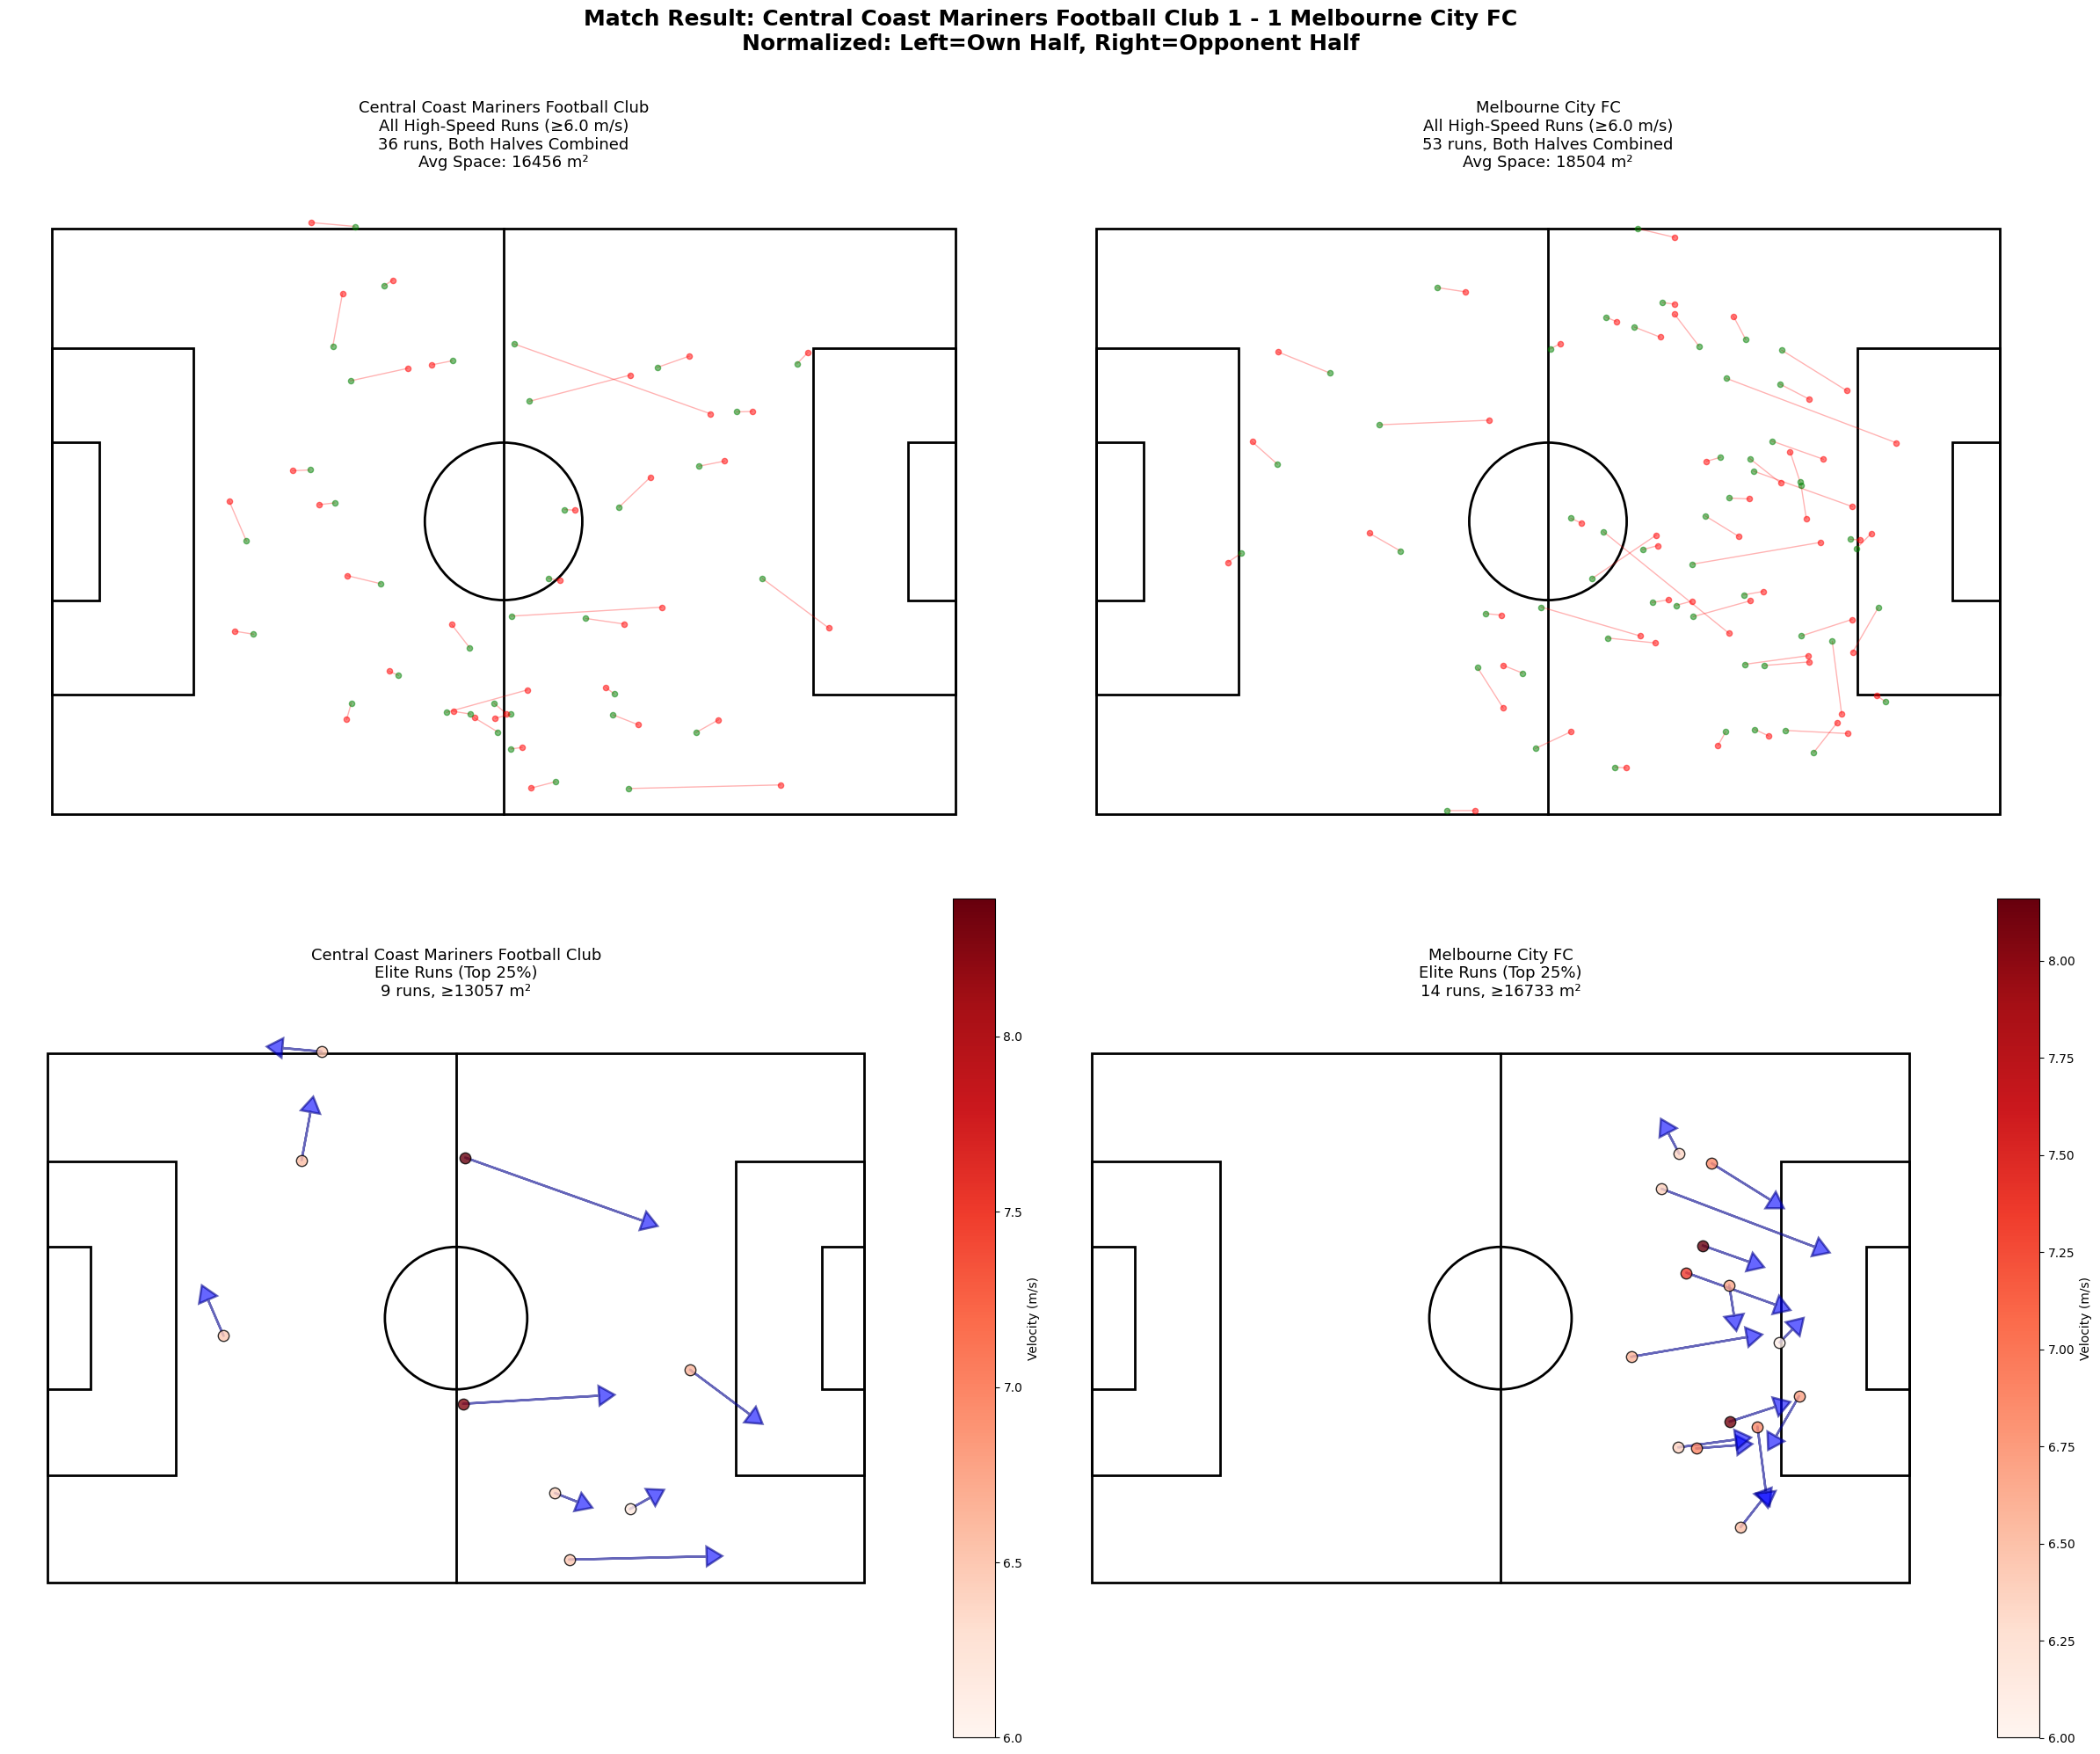

  ✓ Plotted

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 59,270 Tracking Frames geladen
✓ Events aus Cache
✓ 4,991 Events geladen
✓ Phases aus Cache
✓ 438 Phases geladen
Match 2006229: Melbourne City FC 2 - 0 Macarthur FC
  Home: 50 runs
  Away: 41 runs


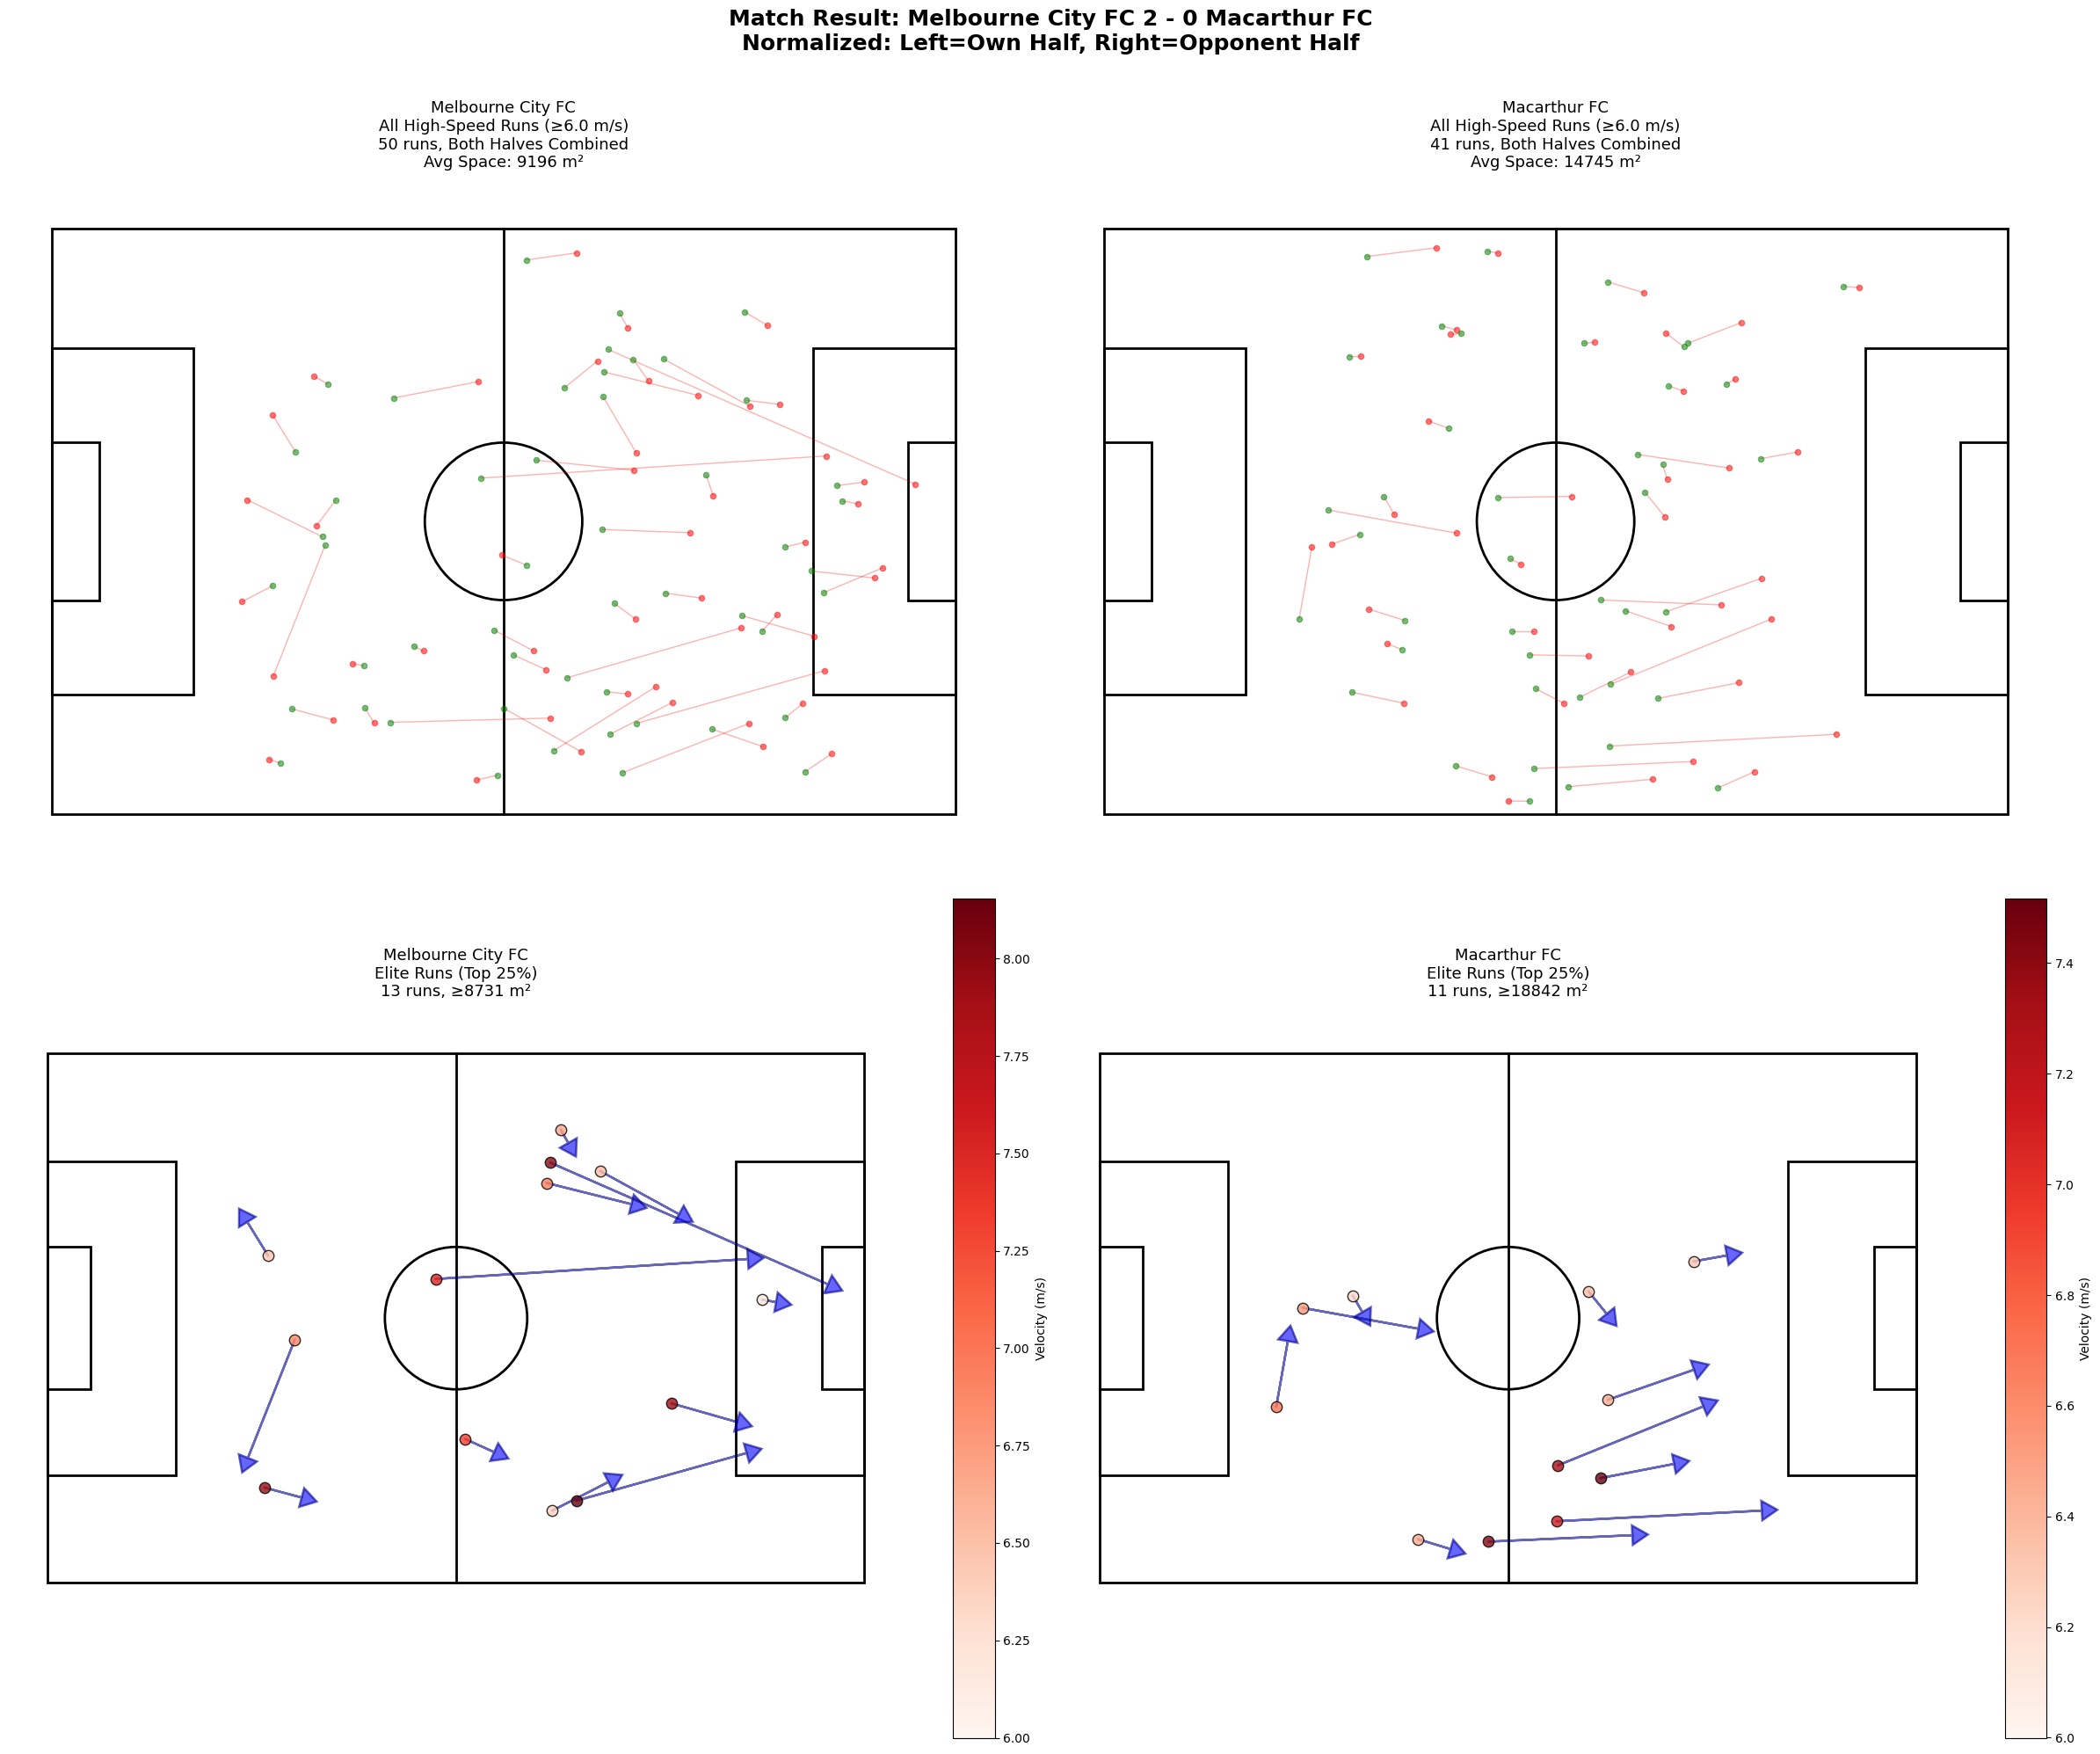

  ✓ Plotted

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,851 Tracking Frames geladen
✓ Events aus Cache
✓ 3,966 Events geladen
✓ Phases aus Cache
✓ 429 Phases geladen
Match 2011166: Wellington Phoenix FC 2 - 3 Melbourne Victory Football Club
  Home: 92 runs
  Away: 64 runs


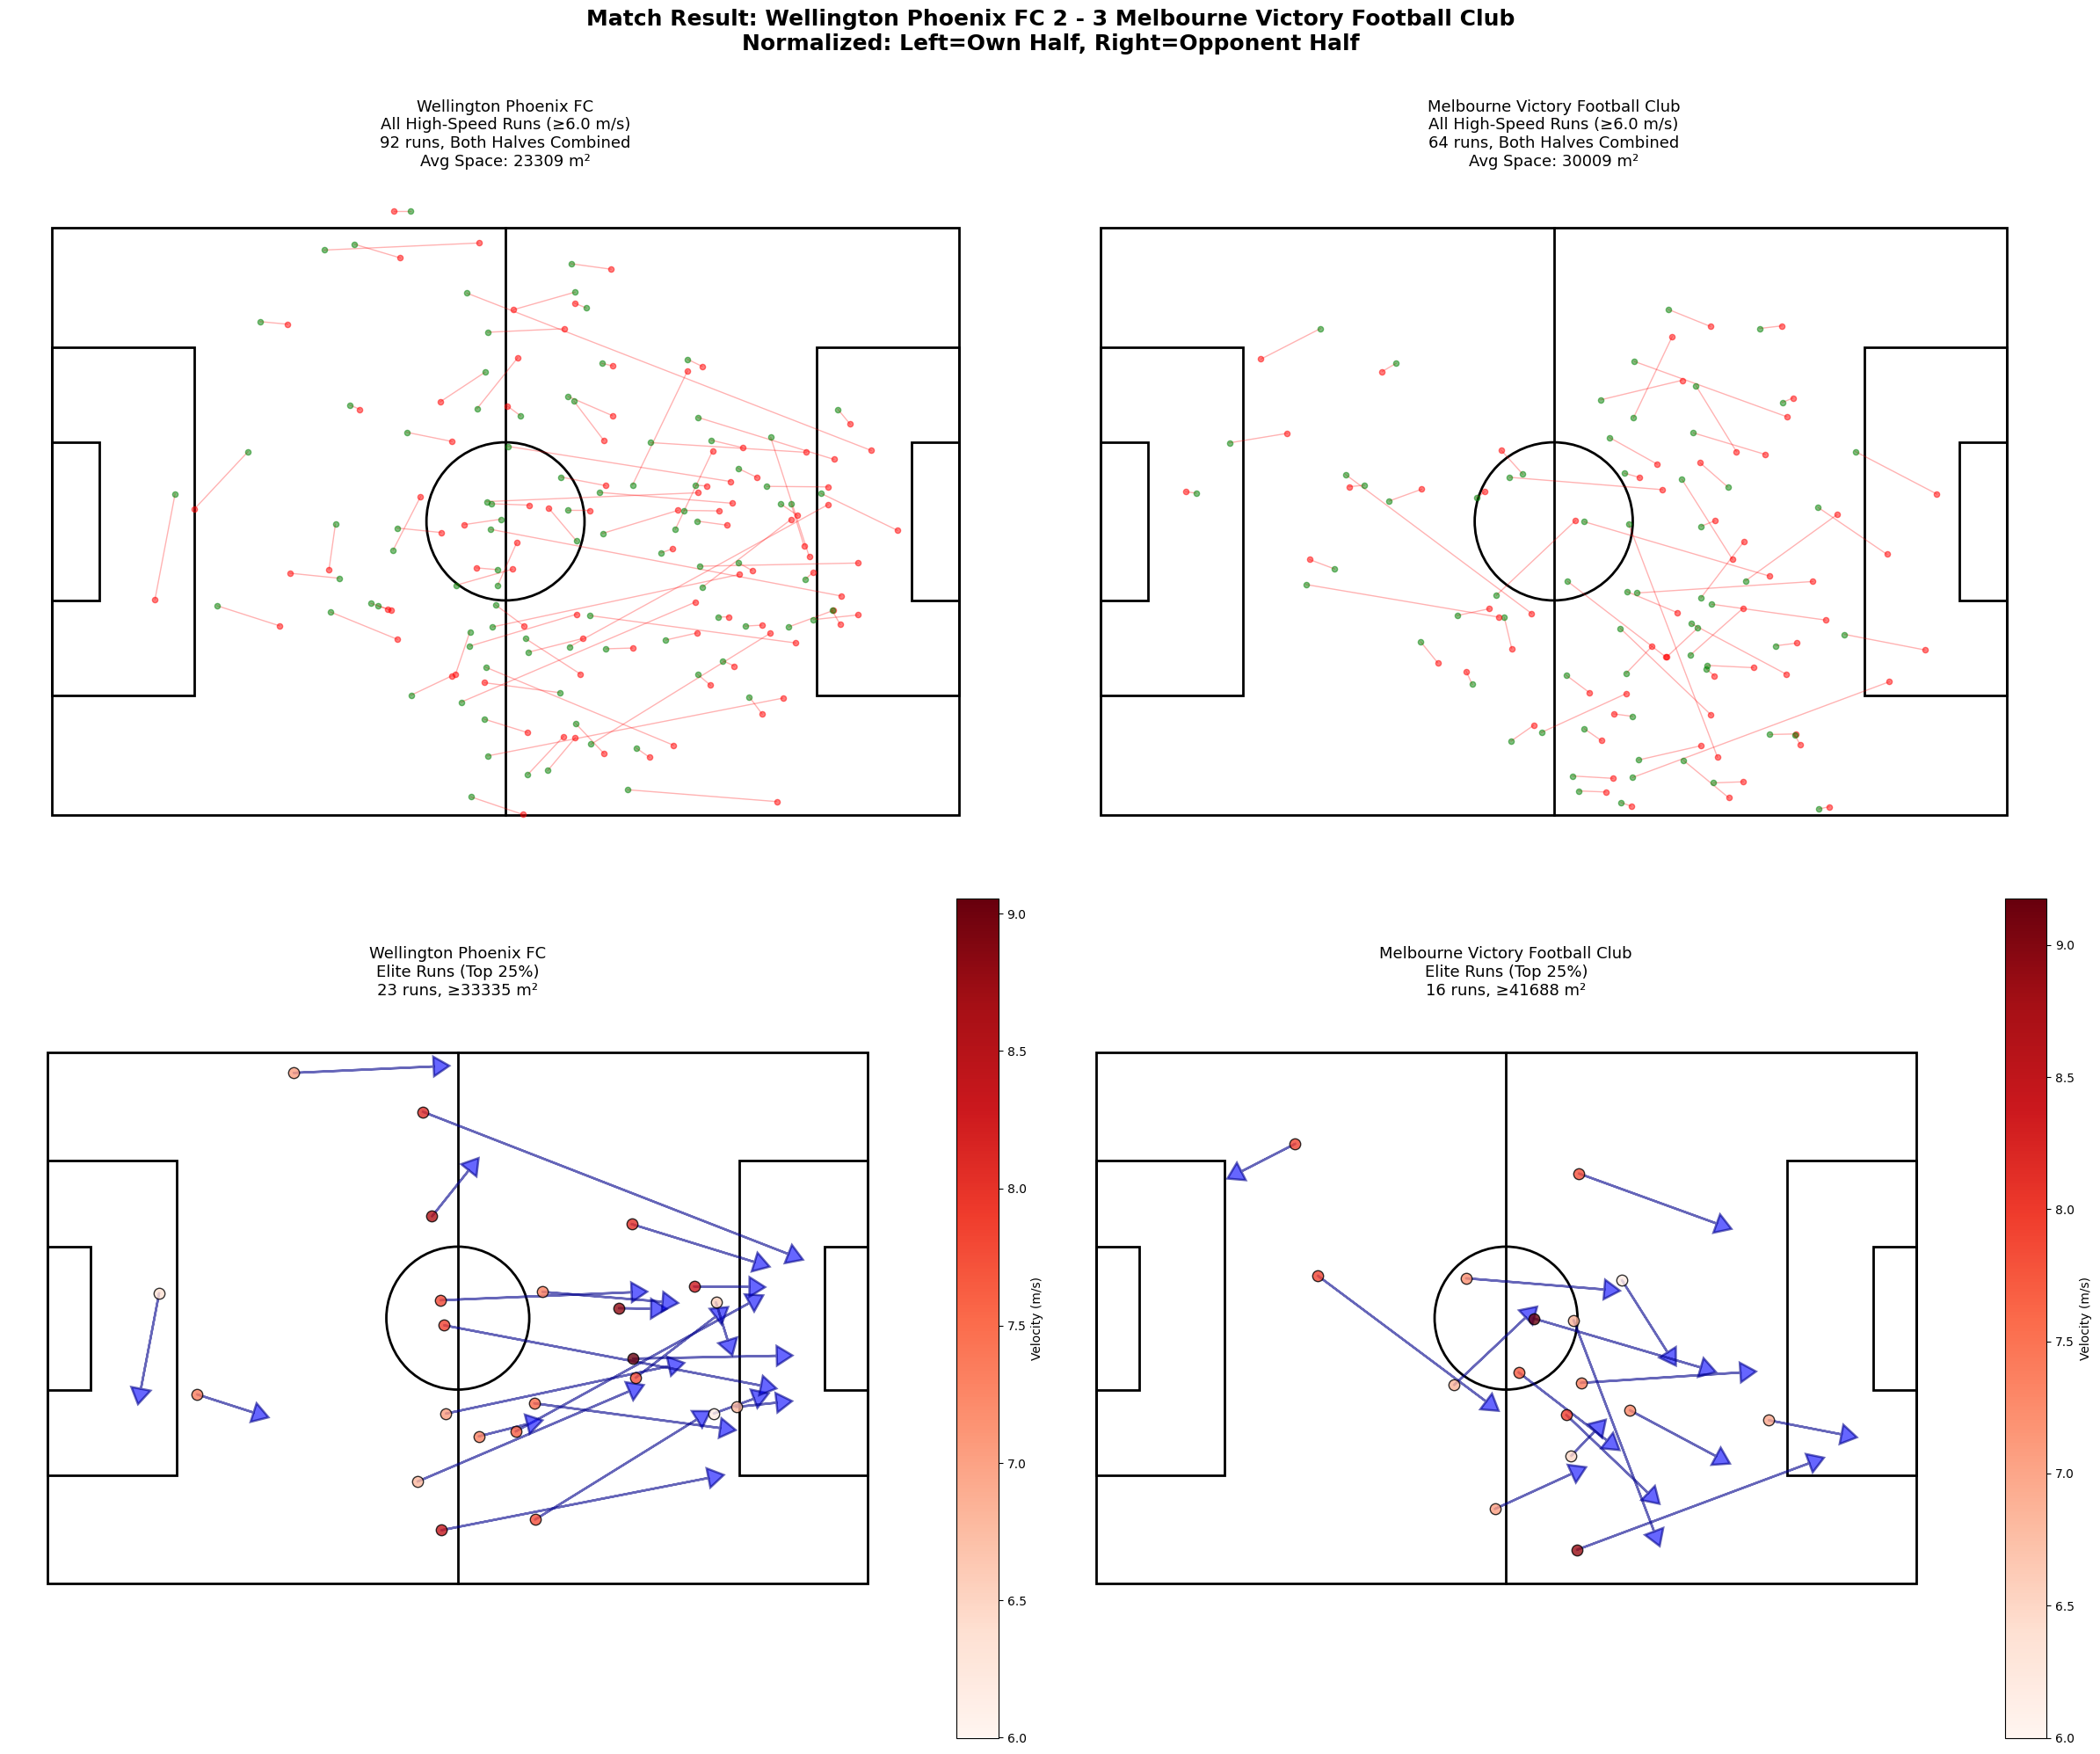

  ✓ Plotted

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 70,251 Tracking Frames geladen
✓ Events aus Cache
✓ 4,999 Events geladen
✓ Phases aus Cache
✓ 486 Phases geladen
Match 2013725: Western United 1 - 0 Sydney Football Club
  Home: 84 runs
  Away: 54 runs


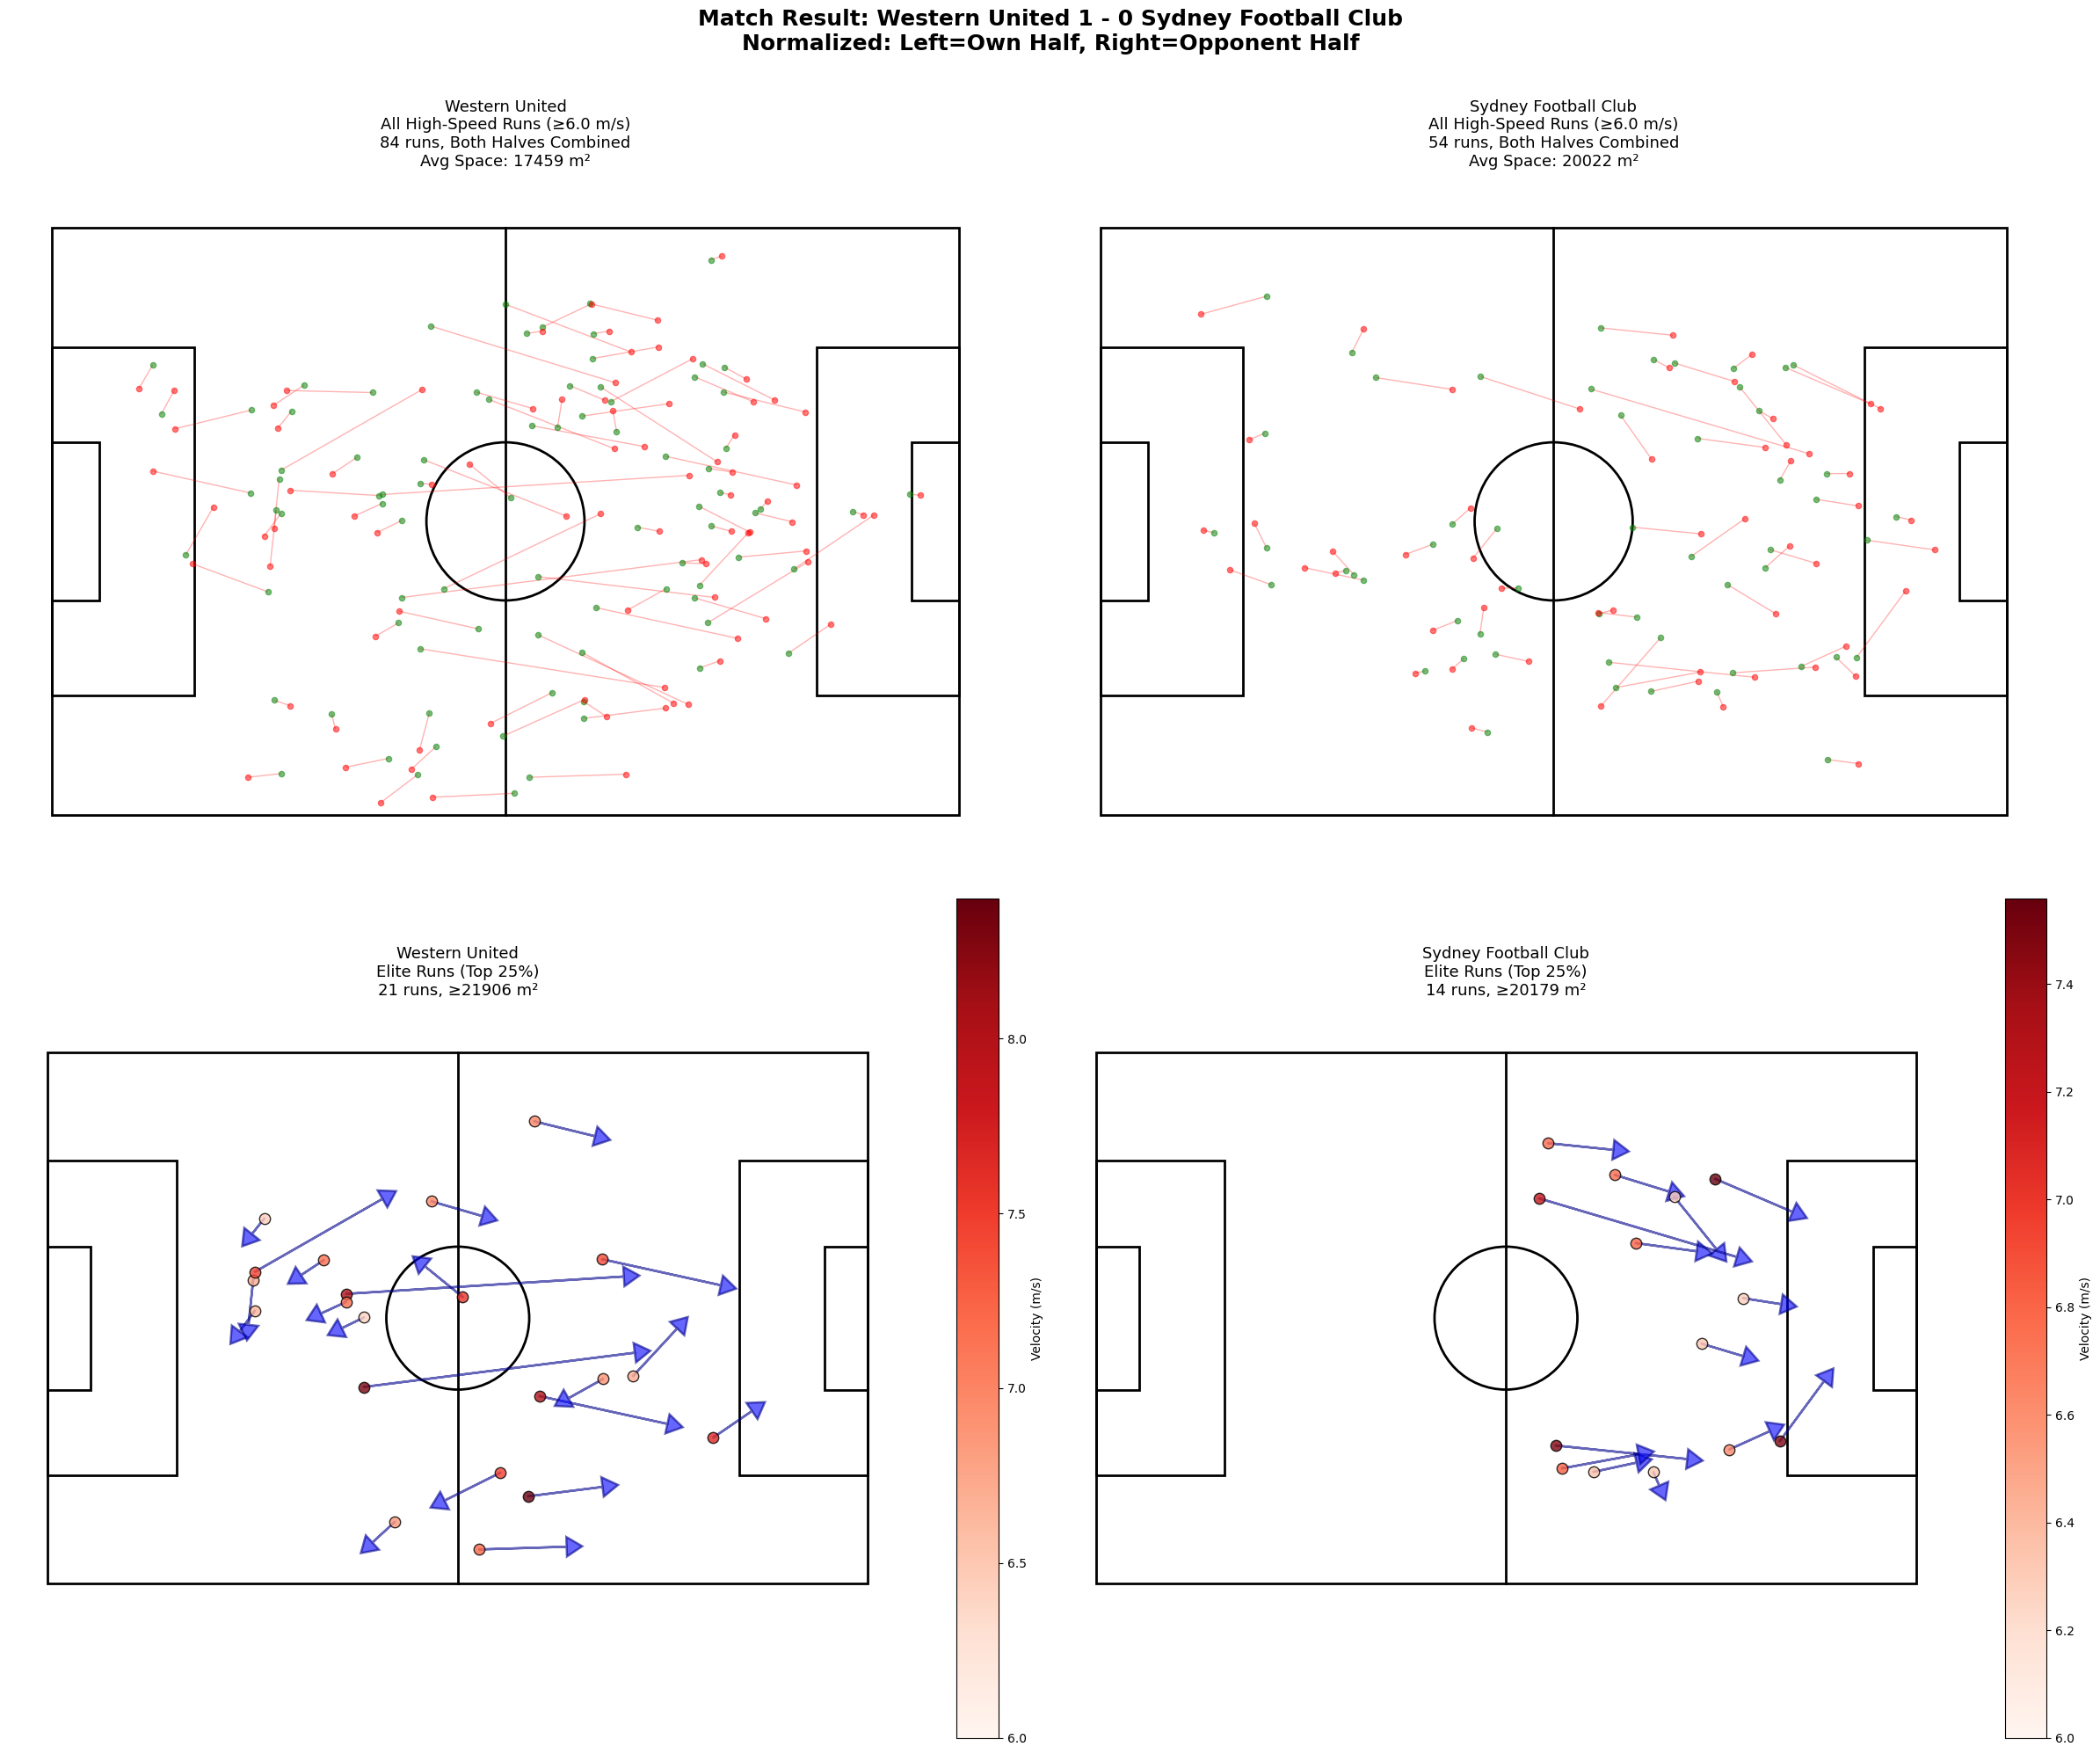

  ✓ Plotted

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 72,101 Tracking Frames geladen
✓ Events aus Cache
✓ 4,582 Events geladen
✓ Phases aus Cache
✓ 506 Phases geladen
Match 2015213: Western United 4 - 2 Auckland FC
  Home: 74 runs
  Away: 59 runs


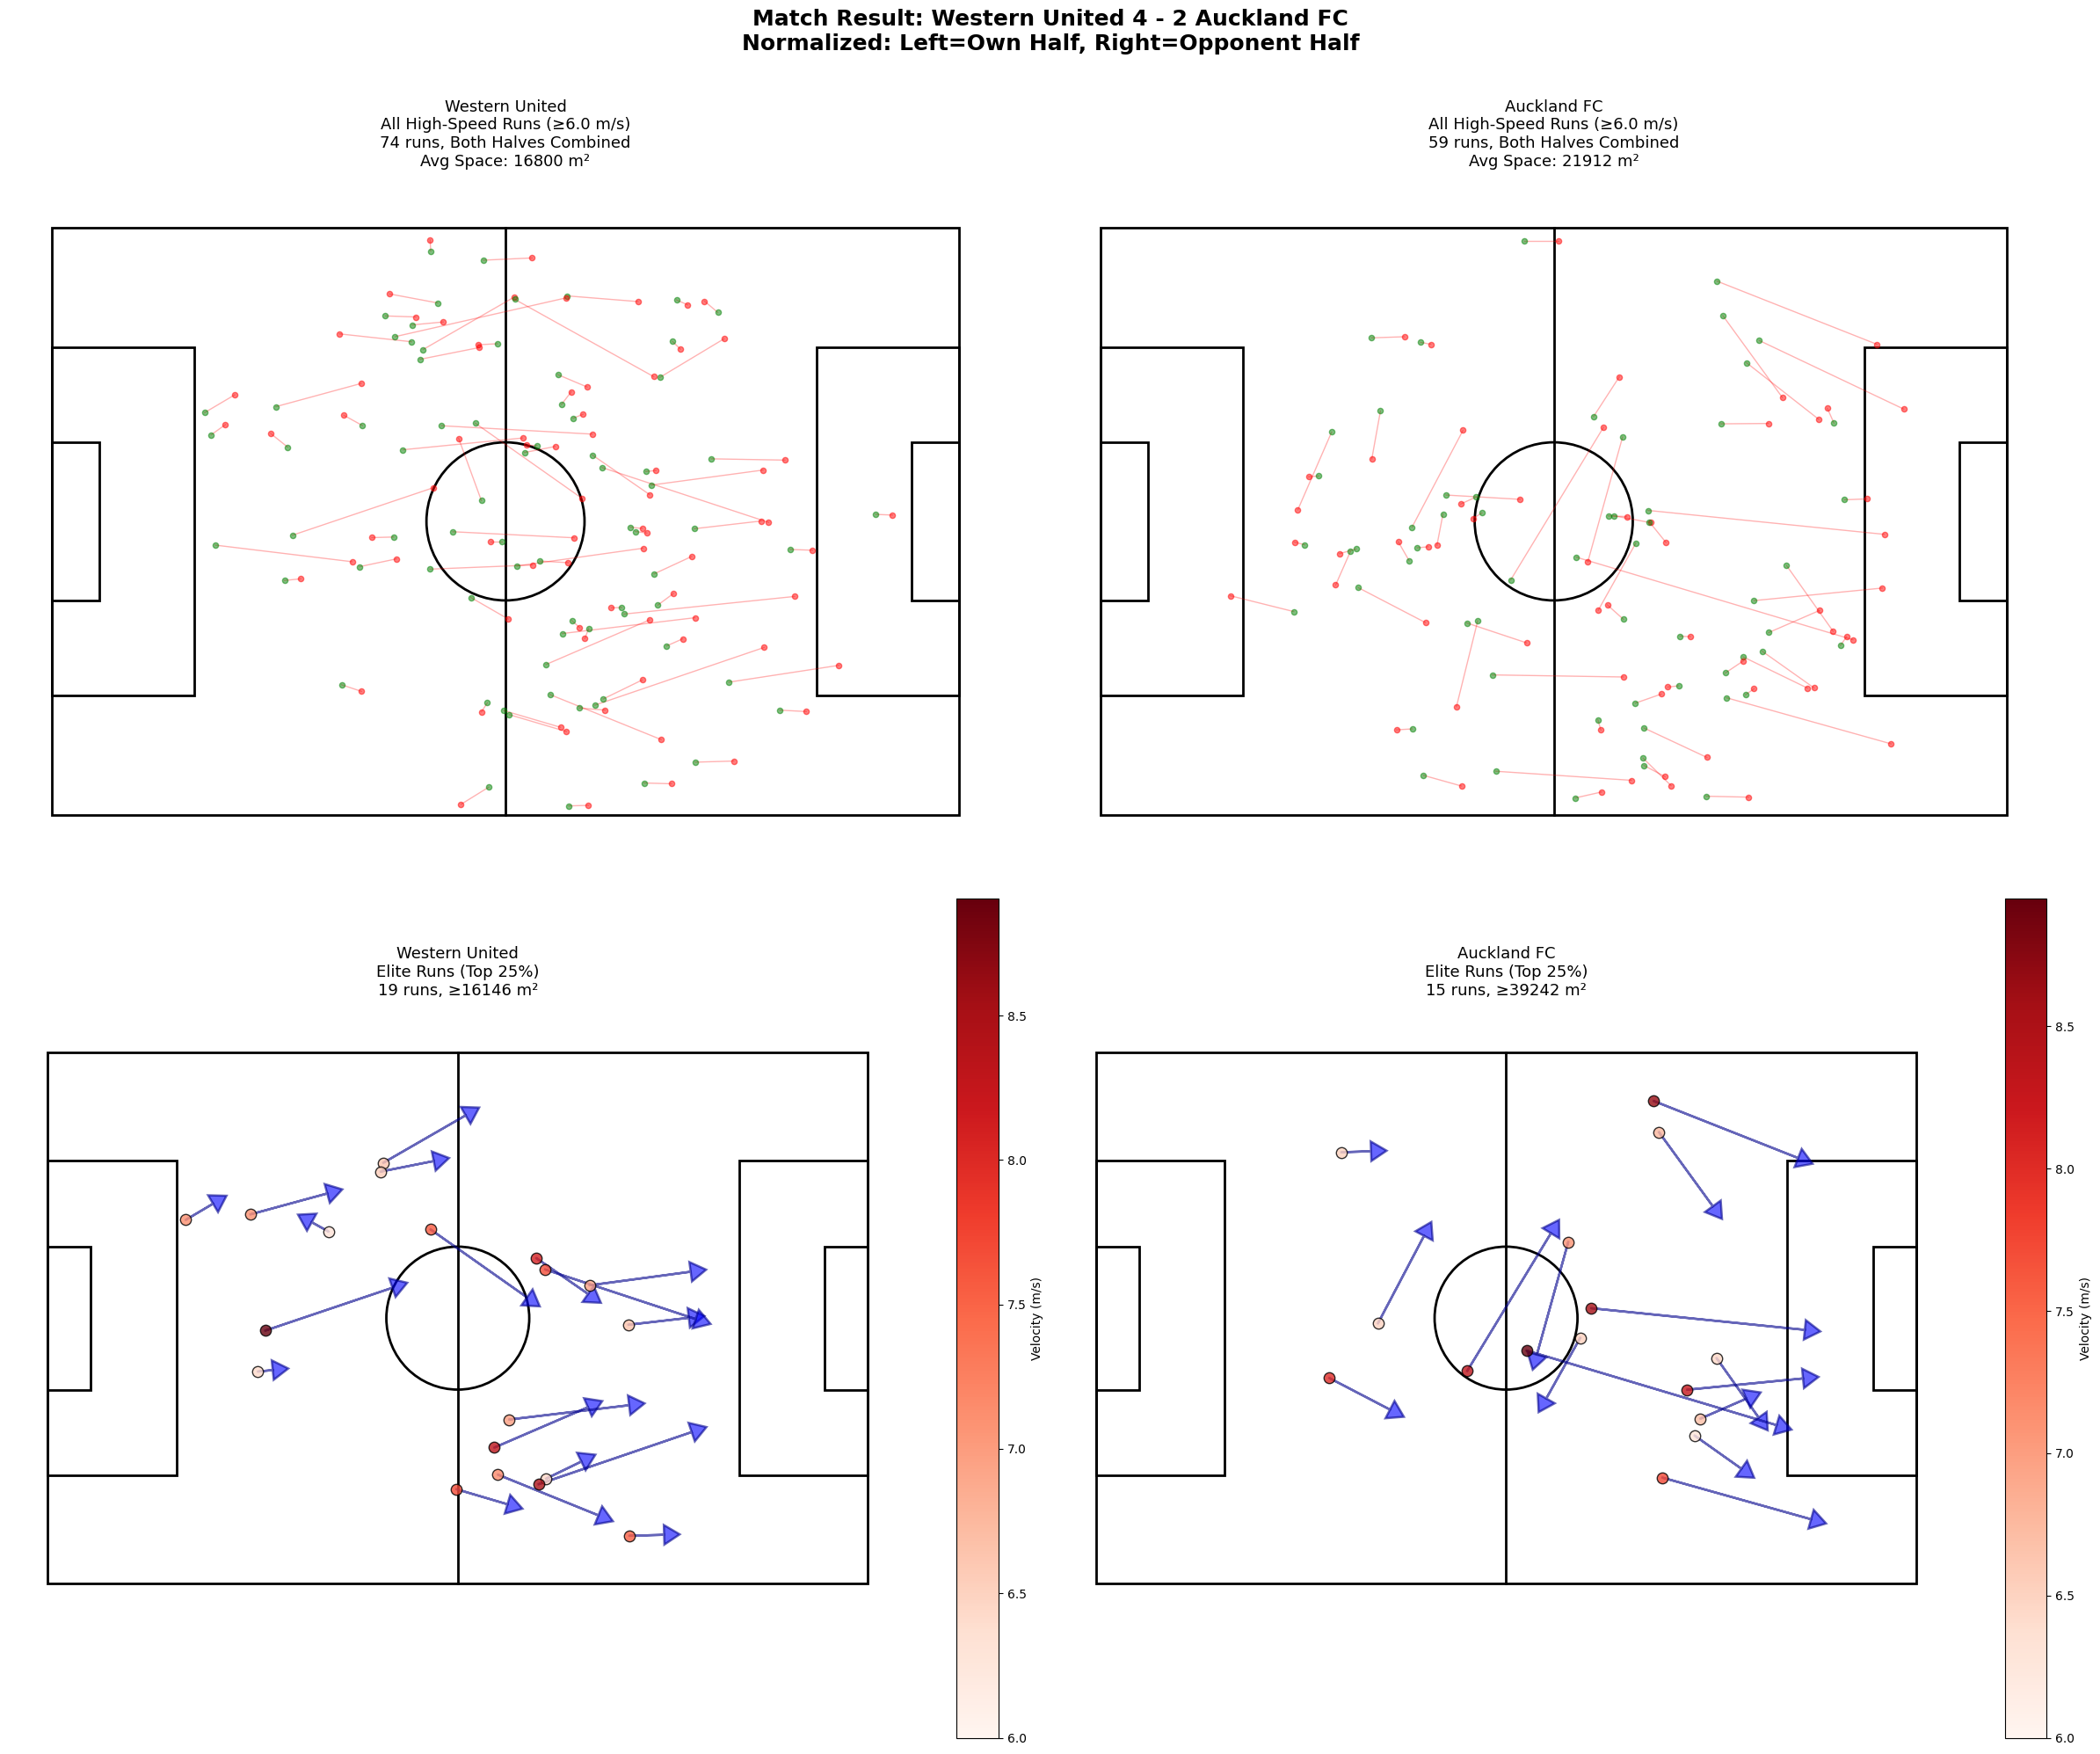

  ✓ Plotted


✓✓✓ ALL MATCHES VISUALIZED!


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from src.data_loader import load_matches_info, load_match_data
from src.space_analysis import analyze_all_matches_normalized
from src.visualization import draw_pitch

# Load all matches
matches = load_matches_info()

print(f"Analyzing {len(matches)} matches...")

# Analyze all with 6.0 m/s threshold
all_traj = analyze_all_matches_normalized(matches, load_match_data, velocity_threshold=6.0)

if len(all_traj) == 0:
    print("No runs found at 6.0 m/s!")
else:
    print(f"\n=== CREATING TEAM-SPECIFIC PLOTS ===")
    
    # Get unique match_ids
    unique_matches = all_traj['match_id'].unique()
    
    print(f"Processing {len(unique_matches)} matches...\n")
    
    # Process each match
    for match_id in unique_matches:
        # Filter for this match
        match_traj = all_traj[all_traj['match_id'] == match_id]
        
        # Get team names and score from metadata
        data = load_match_data(match_id)
        home_team_name = data['metadata']['home_team']['name']
        away_team_name = data['metadata']['away_team']['name']
        home_score = data['metadata']['home_team_score']
        away_score = data['metadata']['away_team_score']
        
        # Split by team
        home_runs = match_traj[match_traj['team'] == 'home']
        away_runs = match_traj[match_traj['team'] == 'away']
        
        if len(home_runs) == 0 and len(away_runs) == 0:
            print(f"Skipping match {match_id} - no runs")
            continue
        
        print(f"Match {match_id}: {home_team_name} {home_score} - {away_score} {away_team_name}")
        print(f"  Home: {len(home_runs)} runs")
        print(f"  Away: {len(away_runs)} runs")
        
        # Get Top 25% for each team
        if len(home_runs) > 0:
            home_top25 = home_runs[home_runs['total_space_created'] >= home_runs['total_space_created'].quantile(0.75)]
        else:
            home_top25 = pd.DataFrame()
        
        if len(away_runs) > 0:
            away_top25 = away_runs[away_runs['total_space_created'] >= away_runs['total_space_created'].quantile(0.75)]
        else:
            away_top25 = pd.DataFrame()
        
        # Plot: 2 rows x 2 columns
        fig, axes = plt.subplots(2, 2, figsize=(24, 20))
        
        # === ROW 1: ALL RUNS ===
        
        # Panel 1: Home Team - All runs
        draw_pitch(axes[0, 0], color='white')
        if len(home_runs) > 0:
            for _, traj in home_runs.iterrows():
                axes[0, 0].plot([traj['start_x'], traj['end_x']], 
                               [traj['start_y'], traj['end_y']], 
                               color='red', alpha=0.3, linewidth=1)
                axes[0, 0].scatter(traj['start_x'], traj['start_y'], 
                                  c='green', s=20, alpha=0.5, zorder=5)
                axes[0, 0].scatter(traj['end_x'], traj['end_y'], 
                                  c='red', s=20, alpha=0.5, zorder=5)
        
        axes[0, 0].set_title(
            f'{home_team_name}\nAll High-Speed Runs (≥6.0 m/s)\n'
            f'{len(home_runs)} runs, Both Halves Combined\n'
            f'Avg Space: {home_runs["total_space_created"].mean():.0f} m²' if len(home_runs) > 0 else f'{home_team_name}\nNo runs ≥6.0 m/s',
            fontsize=13, pad=15
        )
        
        # Panel 2: Away Team - All runs
        draw_pitch(axes[0, 1], color='white')
        if len(away_runs) > 0:
            for _, traj in away_runs.iterrows():
                axes[0, 1].plot([traj['start_x'], traj['end_x']], 
                               [traj['start_y'], traj['end_y']], 
                               color='red', alpha=0.3, linewidth=1)
                axes[0, 1].scatter(traj['start_x'], traj['start_y'], 
                                  c='green', s=20, alpha=0.5, zorder=5)
                axes[0, 1].scatter(traj['end_x'], traj['end_y'], 
                                  c='red', s=20, alpha=0.5, zorder=5)
        
        axes[0, 1].set_title(
            f'{away_team_name}\nAll High-Speed Runs (≥6.0 m/s)\n'
            f'{len(away_runs)} runs, Both Halves Combined\n'
            f'Avg Space: {away_runs["total_space_created"].mean():.0f} m²' if len(away_runs) > 0 else f'{away_team_name}\nNo runs ≥6.0 m/s',
            fontsize=13, pad=15
        )
        
        # === ROW 2: TOP 25% ===
        
        # Panel 3: Home Team - Top 25%
        draw_pitch(axes[1, 0], color='white')
        if len(home_top25) > 0:
            for _, traj in home_top25.iterrows():
                dx = traj['end_x'] - traj['start_x']
                dy = traj['end_y'] - traj['start_y']
                
                axes[1, 0].arrow(traj['start_x'], traj['start_y'], dx, dy,
                                head_width=2.5, head_length=2, fc='blue', ec='darkblue', 
                                alpha=0.6, linewidth=1.8, zorder=5)
                
                axes[1, 0].scatter(traj['start_x'], traj['start_y'], 
                                  c=traj['max_velocity'], cmap='Reds', 
                                  s=80, edgecolors='black', linewidths=1, 
                                  vmin=6.0, vmax=home_top25['max_velocity'].max() if len(home_top25) > 0 else 10,
                                  zorder=10, alpha=0.8)
            
            sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=6.0, vmax=home_top25['max_velocity'].max()))
            sm.set_array([])
            plt.colorbar(sm, ax=axes[1, 0], fraction=0.046, label='Velocity (m/s)')
        
        axes[1, 0].set_title(
            f'{home_team_name}\nElite Runs (Top 25%)\n'
            f'{len(home_top25)} runs, ≥{home_runs["total_space_created"].quantile(0.75):.0f} m²' if len(home_top25) > 0 else f'{home_team_name}\nTop 25%',
            fontsize=13, pad=15
        )
        
        # Panel 4: Away Team - Top 25%
        draw_pitch(axes[1, 1], color='white')
        if len(away_top25) > 0:
            for _, traj in away_top25.iterrows():
                dx = traj['end_x'] - traj['start_x']
                dy = traj['end_y'] - traj['start_y']
                
                axes[1, 1].arrow(traj['start_x'], traj['start_y'], dx, dy,
                                head_width=2.5, head_length=2, fc='blue', ec='darkblue', 
                                alpha=0.6, linewidth=1.8, zorder=5)
                
                axes[1, 1].scatter(traj['start_x'], traj['start_y'], 
                                  c=traj['max_velocity'], cmap='Reds', 
                                  s=80, edgecolors='black', linewidths=1, 
                                  vmin=6.0, vmax=away_top25['max_velocity'].max() if len(away_top25) > 0 else 10,
                                  zorder=10, alpha=0.8)
            
            sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=6.0, vmax=away_top25['max_velocity'].max()))
            sm.set_array([])
            plt.colorbar(sm, ax=axes[1, 1], fraction=0.046, label='Velocity (m/s)')
        
        axes[1, 1].set_title(
            f'{away_team_name}\nElite Runs (Top 25%)\n'
            f'{len(away_top25)} runs, ≥{away_runs["total_space_created"].quantile(0.75):.0f} m²' if len(away_top25) > 0 else f'{away_team_name}\nTop 25%',
            fontsize=13, pad=15
        )
        
        # Overall title with score
        fig.suptitle(
            f'Match Result: {home_team_name} {home_score} - {away_score} {away_team_name}\n'
            f'Normalized: Left=Own Half, Right=Opponent Half', 
            fontsize=18, y=0.995, weight='bold'
        )
        
        plt.tight_layout()
        plt.show()
        
        print(f"  ✓ Plotted\n")
    
    print("\n✓✓✓ ALL MATCHES VISUALIZED!")

In [1]:
from src.data_loader import load_matches_info, load_match_data, get_tracking_dataframe

# Test 1: Matches laden
matches = load_matches_info()
print(f"✓ Matches: {len(matches)}")

# Test 2: Ein Match laden (wird jetzt neu heruntergeladen)
print("\nLade Match (wird in Temp-Cache gespeichert)...")
data = load_match_data(matches[0]['id'])

print(f"✓ Metadata geladen")
print(f"✓ Tracking: {len(data['tracking']):,} frames")
print(f"✓ Events: {len(data['events']):,} rows")

# Test 3: DataFrame erstellen
df = get_tracking_dataframe(data['tracking'], period=1)
print(f"✓ Tracking DataFrame: {df.shape}")

# Test 4: Prüfe Cache-Location
import tempfile
from pathlib import Path
cache_dir = Path(tempfile.gettempdir()) / "analytics_cup_cache"
print(f"\n✓ Cache-Location: {cache_dir}")
print(f"✓ Cache existiert: {cache_dir.exists()}")
if cache_dir.exists():
    files = list(cache_dir.glob("*"))
    print(f"✓ Cached files: {len(files)}")

✓ Matches: 10

Lade Match (wird in Temp-Cache gespeichert)...
Lade Metadata für Match 2017461...
✓ Metadata gespeichert
Lade Tracking Data für Match 2017461...
  Download: 89,543,442 bytes
✓ Tracking gespeichert
✓ 71,451 Tracking Frames geladen
Lade Events für Match 2017461...
✓ Events gespeichert
✓ 4,188 Events geladen
Lade Phases für Match 2017461...


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:100: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Phases gespeichert
✓ 437 Phases geladen
✓ Metadata geladen
✓ Tracking: 71,451 frames
✓ Events: 4,188 rows
✓ Tracking DataFrame: (457094, 7)

✓ Cache-Location: C:\Users\Ivo_S\AppData\Local\Temp\analytics_cup_cache
✓ Cache existiert: True
✓ Cached files: 4


In [20]:
import pandas as pd
from src.data_loader import load_matches_info, load_match_data
from src.space_analysis import analyze_all_matches_normalized

# ========== CONFIGURATION ==========
VELOCITY_THRESHOLD = 6.0   # Minimum velocity for runs (m/s)
NUM_MATCHES = 10            # Number of matches to analyze (1-10)
# ===================================

# Load matches
all_matches = load_matches_info()
matches = all_matches[:NUM_MATCHES]

print(f"Analyzing {NUM_MATCHES} matches with velocity threshold ≥{VELOCITY_THRESHOLD} m/s\n")

# Load all trajectories (progress bars will show)
all_traj = analyze_all_matches_normalized(matches, load_match_data, velocity_threshold=VELOCITY_THRESHOLD)
all_traj['dx'] = all_traj['end_x'] - all_traj['start_x']

print("\n" + "="*100)
print("MATCH ANALYSIS SUMMARY")
print("="*100)

# Analyze each match
for match_id in all_traj['match_id'].unique():
    # Load match metadata
    data = load_match_data(match_id)
    home_name = data['metadata']['home_team']['name']
    away_name = data['metadata']['away_team']['name']
    home_score = data['metadata']['home_team_score']
    away_score = data['metadata']['away_team_score']
    
    # Create player ID to name mapping
    player_names = {}
    for p in data['metadata']['players']:
        player_id = p['id']
        first = p.get('first_name', '')
        last = p.get('last_name', '')
        player_names[player_id] = f"{first} {last}".strip()
    
    # Filter trajectories for this match
    match_traj = all_traj[all_traj['match_id'] == match_id]
    home_traj = match_traj[match_traj['team'] == 'home']
    away_traj = match_traj[match_traj['team'] == 'away']
    
    print(f"\n{'='*100}")
    print(f"MATCH: {home_name} vs {away_name} | Result: {home_score}:{away_score}")
    print(f"{'='*100}")
    
    # === TEAM STATISTICS ===
    print(f"\n--- TEAM STATISTICS ---")
    print(f"Anzahl Runs {home_name}: {len(home_traj)}")
    print(f"Anzahl Runs {away_name}: {len(away_traj)}")
    
    print(f"\nMenge Raumgewinn {home_name}: {home_traj['total_space_created'].sum():,.0f} m²")
    print(f"Menge Raumgewinn {away_name}: {away_traj['total_space_created'].sum():,.0f} m²")
    
    print(f"\nRaumgewinn je Run {home_name}: {home_traj['total_space_created'].mean():,.0f} m²/run" if len(home_traj) > 0 else f"\nRaumgewinn je Run {home_name}: N/A")
    print(f"Raumgewinn je Run {away_name}: {away_traj['total_space_created'].mean():,.0f} m²/run" if len(away_traj) > 0 else f"Raumgewinn je Run {away_name}: N/A")
    
    # === HOME TEAM TOP PLAYERS ===
    print(f"\n--- {home_name.upper()} TOP PLAYERS ---")
    
    if len(home_traj) > 0:
        home_player_stats = home_traj.groupby('player_id').agg({
            'total_space_created': ['count', 'sum', 'mean']
        }).reset_index()
        home_player_stats.columns = ['player_id', 'num_runs', 'total_space', 'avg_space_per_run']
        
        # Top by runs
        top_runs = home_player_stats.nlargest(1, 'num_runs').iloc[0]
        pid = int(top_runs['player_id'])
        pname = player_names.get(pid, f"Player {pid}")
        print(f"Meiste Runs: {pname} | {int(top_runs['num_runs'])} runs")
        
        # Top by total space
        top_space = home_player_stats.nlargest(1, 'total_space').iloc[0]
        pid = int(top_space['player_id'])
        pname = player_names.get(pid, f"Player {pid}")
        print(f"Meister Raumgewinn: {pname} | {top_space['total_space']:,.0f} m²")
        
        # Top by efficiency (min 3 runs)
        home_player_stats_eff = home_player_stats[home_player_stats['num_runs'] >= 3]
        if len(home_player_stats_eff) > 0:
            top_eff = home_player_stats_eff.nlargest(1, 'avg_space_per_run').iloc[0]
            pid = int(top_eff['player_id'])
            pname = player_names.get(pid, f"Player {pid}")
            print(f"Effizientester: {pname} | {top_eff['avg_space_per_run']:,.0f} m²/run")
    else:
        print("Keine Runs")
    
    # === AWAY TEAM TOP PLAYERS ===
    print(f"\n--- {away_name.upper()} TOP PLAYERS ---")
    
    if len(away_traj) > 0:
        away_player_stats = away_traj.groupby('player_id').agg({
            'total_space_created': ['count', 'sum', 'mean']
        }).reset_index()
        away_player_stats.columns = ['player_id', 'num_runs', 'total_space', 'avg_space_per_run']
        
        # Top by runs
        top_runs = away_player_stats.nlargest(1, 'num_runs').iloc[0]
        pid = int(top_runs['player_id'])
        pname = player_names.get(pid, f"Player {pid}")
        print(f"Meiste Runs: {pname} | {int(top_runs['num_runs'])} runs")
        
        # Top by total space
        top_space = away_player_stats.nlargest(1, 'total_space').iloc[0]
        pid = int(top_space['player_id'])
        pname = player_names.get(pid, f"Player {pid}")
        print(f"Meister Raumgewinn: {pname} | {top_space['total_space']:,.0f} m²")
        
        # Top by efficiency (min 3 runs)
        away_player_stats_eff = away_player_stats[away_player_stats['num_runs'] >= 3]
        if len(away_player_stats_eff) > 0:
            top_eff = away_player_stats_eff.nlargest(1, 'avg_space_per_run').iloc[0]
            pid = int(top_eff['player_id'])
            pname = player_names.get(pid, f"Player {pid}")
            print(f"Effizientester: {pname} | {top_eff['avg_space_per_run']:,.0f} m²/run")
    else:
        print("Keine Runs")

# === OVERALL SUMMARY ===
print(f"\n{'='*100}")
print("OVERALL SUMMARY")
print(f"{'='*100}")

print(f"\nTotal matches: {all_traj['match_id'].nunique()}")
print(f"Total runs: {len(all_traj):,}")
print(f"Total space: {all_traj['total_space_created'].sum():,.0f} m²")
print(f"Avg space/run: {all_traj['total_space_created'].mean():,.0f} m²")

# === TOP PLAYERS ACROSS ALL MATCHES ===
print(f"\n{'='*100}")
print("TOP PLAYERS ACROSS ALL MATCHES")
print(f"{'='*100}")

all_player_stats = all_traj.groupby('player_id').agg({
    'total_space_created': ['count', 'sum', 'mean'],
    'match_id': 'nunique'
}).reset_index()
all_player_stats.columns = ['player_id', 'num_runs', 'total_space', 'avg_space_per_run', 'matches_played']
all_player_stats['runs_per_match'] = all_player_stats['num_runs'] / all_player_stats['matches_played']
all_player_stats['space_per_match'] = all_player_stats['total_space'] / all_player_stats['matches_played']

all_player_names = {}
for match_id in all_traj['match_id'].unique():
    data = load_match_data(match_id)
    for p in data['metadata']['players']:
        player_id = p['id']
        first = p.get('first_name', '')
        last = p.get('last_name', '')
        team_id = p['team_id']
        home_id = data['metadata']['home_team']['id']
        team_name = data['metadata']['home_team']['name'] if team_id == home_id else data['metadata']['away_team']['name']
        all_player_names[player_id] = {'name': f"{first} {last}".strip(), 'team': team_name}

# Top 3 categories
top_runs = all_player_stats.nlargest(1, 'runs_per_match').iloc[0]
pid = int(top_runs['player_id'])
pinfo = all_player_names.get(pid, {'name': f'Player {pid}', 'team': 'Unknown'})
print(f"\n1. MEISTE RUNS/MATCH: {pinfo['name']} ({pinfo['team']})")
print(f"   {top_runs['runs_per_match']:.1f} runs/match ({int(top_runs['num_runs'])} runs in {int(top_runs['matches_played'])} matches) | {top_runs['space_per_match']:,.0f} m²/match | {top_runs['avg_space_per_run']:,.0f} m²/run")

top_space = all_player_stats.nlargest(1, 'space_per_match').iloc[0]
pid = int(top_space['player_id'])
pinfo = all_player_names.get(pid, {'name': f'Player {pid}', 'team': 'Unknown'})
print(f"\n2. MEISTER RAUMGEWINN/MATCH: {pinfo['name']} ({pinfo['team']})")
print(f"   {top_space['space_per_match']:,.0f} m²/match ({top_space['total_space']:,.0f} m² in {int(top_space['matches_played'])} matches) | {top_space['runs_per_match']:.1f} runs/match | {top_space['avg_space_per_run']:,.0f} m²/run")

all_player_stats_eff = all_player_stats[all_player_stats['num_runs'] >= 5]
if len(all_player_stats_eff) > 0:
    top_eff = all_player_stats_eff.nlargest(1, 'avg_space_per_run').iloc[0]
    pid = int(top_eff['player_id'])
    pinfo = all_player_names.get(pid, {'name': f'Player {pid}', 'team': 'Unknown'})
    print(f"\n3. EFFIZIENTESTER (min 5 runs): {pinfo['name']} ({pinfo['team']})")
    print(f"   {top_eff['avg_space_per_run']:,.0f} m²/run ({int(top_eff['num_runs'])} runs in {int(top_eff['matches_played'])} matches) | {top_eff['runs_per_match']:.1f} runs/match | {top_eff['space_per_match']:,.0f} m²/match")

Analyzing 10 matches with velocity threshold ≥6.0 m/s


=== ANALYZING ALL MATCHES (threshold: 6.0 m/s) ===



Processing matches:   0%|          | 0/10 [00:00<?, ?it/s]

✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:100: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Detected 9,131 frames with velocity >= 6.0 m/s
✓ From 20 unique players

Analyzing 9,131 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 9131/9131 [00:05<00:00, 1790.59it/s]


✓ Analyzed 948 off-ball runs (own team possession only)
✓ Detected 8,580 frames with velocity >= 6.0 m/s
✓ From 32 unique players

Analyzing 8,580 run frames (team possession filter)...


Processing matches:  10%|█         | 1/10 [00:15<02:17, 15.24s/it]

✓ Analyzed 888 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 57,621 Tracking Frames geladen
✓ Events aus Cache
✓ 5,292 Events geladen
✓ Phases aus Cache
✓ 448 Phases geladen
✓ Detected 7,998 frames with velocity >= 6.0 m/s
✓ From 21 unique players

Analyzing 7,998 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 7998/7998 [00:04<00:00, 1791.17it/s]


✓ Analyzed 896 off-ball runs (own team possession only)
✓ Detected 7,969 frames with velocity >= 6.0 m/s
✓ From 30 unique players

Analyzing 7,969 run frames (team possession filter)...


Processing matches:  20%|██        | 2/10 [00:29<01:58, 14.83s/it]

✓ Analyzed 641 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 59,061 Tracking Frames geladen
✓ Events aus Cache
✓ 5,079 Events geladen
✓ Phases aus Cache
✓ 454 Phases geladen
✓ Detected 8,316 frames with velocity >= 6.0 m/s
✓ From 21 unique players

Analyzing 8,316 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 8316/8316 [00:05<00:00, 1564.24it/s]


✓ Analyzed 1047 off-ball runs (own team possession only)
✓ Detected 8,168 frames with velocity >= 6.0 m/s
✓ From 28 unique players

Analyzing 8,168 run frames (team possession filter)...


Processing matches:  30%|███       | 3/10 [00:44<01:44, 14.94s/it]

✓ Analyzed 667 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 60,530 Tracking Frames geladen
✓ Events aus Cache
✓ 4,713 Events geladen
✓ Phases aus Cache
✓ 460 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:100: DtypeWarning: Columns (276) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Detected 7,240 frames with velocity >= 6.0 m/s
✓ From 22 unique players

Analyzing 7,240 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 7240/7240 [00:03<00:00, 2351.84it/s]


✓ Analyzed 496 off-ball runs (own team possession only)
✓ Detected 8,567 frames with velocity >= 6.0 m/s
✓ From 27 unique players

Analyzing 8,567 run frames (team possession filter)...


Processing matches:  40%|████      | 4/10 [00:58<01:26, 14.39s/it]

✓ Analyzed 767 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 61,301 Tracking Frames geladen
✓ Events aus Cache
✓ 5,220 Events geladen
✓ Phases aus Cache
✓ 492 Phases geladen
✓ Detected 6,187 frames with velocity >= 6.0 m/s
✓ From 23 unique players

Analyzing 6,187 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 6187/6187 [00:03<00:00, 1919.05it/s]


✓ Analyzed 571 off-ball runs (own team possession only)
✓ Detected 4,486 frames with velocity >= 6.0 m/s
✓ From 30 unique players

Analyzing 4,486 run frames (team possession filter)...


Processing matches:  50%|█████     | 5/10 [01:11<01:09, 13.85s/it]

✓ Analyzed 477 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 59,250 Tracking Frames geladen
✓ Events aus Cache
✓ 4,823 Events geladen
✓ Phases aus Cache
✓ 431 Phases geladen
✓ Detected 5,473 frames with velocity >= 6.0 m/s
✓ From 23 unique players

Analyzing 5,473 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 5473/5473 [00:02<00:00, 2287.26it/s]


✓ Analyzed 393 off-ball runs (own team possession only)
✓ Detected 6,432 frames with velocity >= 6.0 m/s
✓ From 28 unique players

Analyzing 6,432 run frames (team possession filter)...


Processing matches:  60%|██████    | 6/10 [01:22<00:51, 12.83s/it]

✓ Analyzed 400 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 59,270 Tracking Frames geladen
✓ Events aus Cache
✓ 4,991 Events geladen
✓ Phases aus Cache
✓ 438 Phases geladen
✓ Detected 5,980 frames with velocity >= 6.0 m/s
✓ From 21 unique players

Analyzing 5,980 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 5980/5980 [00:03<00:00, 1922.95it/s]


✓ Analyzed 616 off-ball runs (own team possession only)
✓ Detected 6,319 frames with velocity >= 6.0 m/s
✓ From 29 unique players

Analyzing 6,319 run frames (team possession filter)...


Processing matches:  70%|███████   | 7/10 [01:33<00:37, 12.49s/it]

✓ Analyzed 444 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,851 Tracking Frames geladen
✓ Events aus Cache
✓ 3,966 Events geladen
✓ Phases aus Cache
✓ 429 Phases geladen
✓ Detected 9,910 frames with velocity >= 6.0 m/s
✓ From 20 unique players

Analyzing 9,910 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 9910/9910 [00:05<00:00, 1764.12it/s]


✓ Analyzed 1070 off-ball runs (own team possession only)
✓ Detected 10,207 frames with velocity >= 6.0 m/s
✓ From 32 unique players

Analyzing 10,207 run frames (team possession filter)...


Processing matches:  80%|████████  | 8/10 [01:50<00:27, 13.79s/it]

✓ Analyzed 1016 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 70,251 Tracking Frames geladen
✓ Events aus Cache
✓ 4,999 Events geladen
✓ Phases aus Cache
✓ 486 Phases geladen
✓ Detected 9,030 frames with velocity >= 6.0 m/s
✓ From 21 unique players

Analyzing 9,030 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 9030/9030 [00:04<00:00, 2086.40it/s]


✓ Analyzed 775 off-ball runs (own team possession only)
✓ Detected 10,919 frames with velocity >= 6.0 m/s
✓ From 30 unique players

Analyzing 10,919 run frames (team possession filter)...


Processing matches:  90%|█████████ | 9/10 [02:06<00:14, 14.47s/it]

✓ Analyzed 872 off-ball runs (own team possession only)
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 72,101 Tracking Frames geladen
✓ Events aus Cache
✓ 4,582 Events geladen
✓ Phases aus Cache
✓ 506 Phases geladen
✓ Detected 10,257 frames with velocity >= 6.0 m/s
✓ From 22 unique players

Analyzing 10,257 run frames (team possession filter)...


Analyzing runs: 100%|██████████| 10257/10257 [00:03<00:00, 2588.70it/s]


✓ Analyzed 586 off-ball runs (own team possession only)
✓ Detected 10,847 frames with velocity >= 6.0 m/s
✓ From 28 unique players

Analyzing 10,847 run frames (team possession filter)...


Processing matches: 100%|██████████| 10/10 [02:23<00:00, 14.31s/it]


✓ Analyzed 925 off-ball runs (own team possession only)

✓ Total runs across all matches: 1215
✓ Avg velocity: 6.99 m/s
✓ Avg space created: 18810 m²

MATCH ANALYSIS SUMMARY
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,451 Tracking Frames geladen
✓ Events aus Cache
✓ 4,188 Events geladen
✓ Phases aus Cache
✓ 437 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:100: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)



MATCH: Melbourne Victory Football Club vs Auckland FC | Result: 0:1

--- TEAM STATISTICS ---
Anzahl Runs Melbourne Victory Football Club: 59
Anzahl Runs Auckland FC: 70

Menge Raumgewinn Melbourne Victory Football Club: 1,079,658 m²
Menge Raumgewinn Auckland FC: 2,175,494 m²

Raumgewinn je Run Melbourne Victory Football Club: 18,299 m²/run
Raumgewinn je Run Auckland FC: 31,078 m²/run

--- MELBOURNE VICTORY FOOTBALL CLUB TOP PLAYERS ---
Meiste Runs: Daniel Arzani | 9 runs
Meister Raumgewinn: Joshua Inserra | 192,147 m²
Effizientester: Kasey Bos | 24,006 m²/run

--- AUCKLAND FC TOP PLAYERS ---
Meiste Runs: Francis De Vries | 11 runs
Meister Raumgewinn: Guillermo Luis May Bartesaghi | 418,934 m²
Effizientester: Logan Rogerson | 56,904 m²/run
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 57,621 Tracking Frames geladen
✓ Events aus Cache
✓ 5,292 Events geladen
✓ Phases aus Cache
✓ 448 Phases geladen

MATCH: Sydney Football Club vs Adelaide United Football Club | Result: 4:1

--- TEAM STATIST

c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:100: DtypeWarning: Columns (276) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)



MATCH: Auckland FC vs Wellington Phoenix FC | Result: 2:1

--- TEAM STATISTICS ---
Anzahl Runs Auckland FC: 49
Anzahl Runs Wellington Phoenix FC: 66

Menge Raumgewinn Auckland FC: 470,911 m²
Menge Raumgewinn Wellington Phoenix FC: 1,049,293 m²

Raumgewinn je Run Auckland FC: 9,610 m²/run
Raumgewinn je Run Wellington Phoenix FC: 15,898 m²/run

--- AUCKLAND FC TOP PLAYERS ---
Meiste Runs: Luis Felipe Gallegos Leiva | 8 runs
Meister Raumgewinn: Guillermo Luis May Bartesaghi | 122,228 m²
Effizientester: Guillermo Luis May Bartesaghi | 20,371 m²/run

--- WELLINGTON PHOENIX FC TOP PLAYERS ---
Meiste Runs: Matthew Sheridan | 11 runs
Meister Raumgewinn: Kosta Barbarouses | 307,637 m²
Effizientester: Kosta Barbarouses | 43,948 m²/run
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 61,301 Tracking Frames geladen
✓ Events aus Cache
✓ 5,220 Events geladen
✓ Phases aus Cache
✓ 492 Phases geladen

MATCH: Brisbane Roar FC vs Perth Glory Football Club | Result: 0:1

--- TEAM STATISTICS ---
Anzahl Runs Br

c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:100: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 57,621 Tracking Frames geladen
✓ Events aus Cache
✓ 5,292 Events geladen
✓ Phases aus Cache
✓ 448 Phases geladen
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 59,061 Tracking Frames geladen
✓ Events aus Cache
✓ 5,079 Events geladen
✓ Phases aus Cache
✓ 454 Phases geladen
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 60,530 Tracking Frames geladen
✓ Events aus Cache
✓ 4,713 Events geladen
✓ Phases aus Cache
✓ 460 Phases geladen


c:\Users\Ivo_S\Documents\Repositories\analytics_cup_research\src\data_loader.py:100: DtypeWarning: Columns (276) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv(events_file)


✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 61,301 Tracking Frames geladen
✓ Events aus Cache
✓ 5,220 Events geladen
✓ Phases aus Cache
✓ 492 Phases geladen
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 59,250 Tracking Frames geladen
✓ Events aus Cache
✓ 4,823 Events geladen
✓ Phases aus Cache
✓ 431 Phases geladen
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 59,270 Tracking Frames geladen
✓ Events aus Cache
✓ 4,991 Events geladen
✓ Phases aus Cache
✓ 438 Phases geladen
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 71,851 Tracking Frames geladen
✓ Events aus Cache
✓ 3,966 Events geladen
✓ Phases aus Cache
✓ 429 Phases geladen
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 70,251 Tracking Frames geladen
✓ Events aus Cache
✓ 4,999 Events geladen
✓ Phases aus Cache
✓ 486 Phases geladen
✓ Metadata aus Cache
✓ Tracking aus Cache
✓ 72,101 Tracking Frames geladen
✓ Events aus Cache
✓ 4,582 Events geladen
✓ Phases aus Cache
✓ 506 Phases geladen

1. MEISTE RUNS/MATCH: Thomas Aquilina (Newcastle United J